<font color='purple'><center><h1>Start: Answering "Which type of vehicle has created more traffic volume each year from Jan 2019 – Dec 2022 & generated more revenue each year from July 2019 – Dec 2022"</h1></center></font>

<font color='blue'><center><h2>Importing Libraries</h2></center></font>

In [2]:
%%time
#Importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

Wall time: 821 ms


<font color='blue'><center><h2>Get the toll charges from July 2019 to March 2023</h2></center></font>

In [3]:
%%time
#Reading the input file having the toll charges
df_charge = pd.read_csv("C:/Users/USER/Documents/Toll/Input Charge File - ED/Input Charge File.csv")

Wall time: 6 ms


In [4]:
%%time
print("Below are the toll charge data per vehicle:")
#Create a copy of raw charge data
df_charge2 = df_charge.copy()
df_charge2

Below are the toll charge data per vehicle:
Wall time: 0 ns


AssetID TollPointID Cars Charge Trucks Charge  Month  Year
0       ED          AB       $7.69        $15.37      7  2019
1       ED           C       $7.69        $15.37      7  2019
2       ED          AB       $7.69        $15.37      8  2019
3       ED           C       $7.69        $15.37      8  2019
4       ED          AB       $7.69        $15.37      9  2019
..     ...         ...         ...           ...    ...   ...
85      ED           C       $8.94        $17.88      1  2023
86      ED          AB       $8.94        $17.88      2  2023
87      ED           C       $8.94        $17.88      2  2023
88      ED          AB       $8.94        $17.88      3  2023
89      ED           C       $8.94        $17.88      3  2023

[90 rows x 6 columns]

<font color='blue'><center><h2>Toll charges Data Pre-Processing</h2></center></font>

In [5]:
%%time
#Adding 0 in prefix of Month to make it in a format mm
#Combining Year and Month in a single column
#Removing "$" from Cars and Trucks Charge
#Combining AssetID, TollPointID, and Year-Month
df_charge2['Year-Month'] = ""
for x in range(0,len(df_charge2)):
    if (int (df_charge2['Month'].iloc[x]) < 10):
        df_charge2['Month'].iloc[x] = '0' + str( df_charge2['Month'].iloc[x] )
        df_charge2['Year-Month'].iloc[x] = str( df_charge2['Year'].iloc[x] ) + "-" + df_charge2['Month'].iloc[x]
    else:
        df_charge2['Month'].iloc[x] = str( df_charge2['Month'].iloc[x] )
        df_charge2['Year-Month'].iloc[x] = str( df_charge2['Year'].iloc[x] ) + "-" + df_charge2['Month'].iloc[x]

df_charge2['Cars Charge'] = df_charge2['Cars Charge'].str.slice(1, len(df_charge2['Cars Charge']))
df_charge2['Trucks Charge'] = df_charge2['Trucks Charge'].str.slice(1, len(df_charge2['Trucks Charge']))
df_charge2["AssetID-TollPointID-Year-Month"] = df_charge2["AssetID"] + " " + df_charge2["TollPointID"] + " " + df_charge2["Year-Month"]

Wall time: 46.9 ms


<timed exec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
%%time
print("Below are the pre processed toll charge data per vehicle:")
df_charge2

Below are the pre processed toll charge data per vehicle:
Wall time: 0 ns


AssetID TollPointID Cars Charge Trucks Charge Month  Year Year-Month  \
0       ED          AB        7.69         15.37    07  2019    2019-07   
1       ED           C        7.69         15.37    07  2019    2019-07   
2       ED          AB        7.69         15.37    08  2019    2019-08   
3       ED           C        7.69         15.37    08  2019    2019-08   
4       ED          AB        7.69         15.37    09  2019    2019-09   
..     ...         ...         ...           ...   ...   ...        ...   
85      ED           C        8.94         17.88    01  2023    2023-01   
86      ED          AB        8.94         17.88    02  2023    2023-02   
87      ED           C        8.94         17.88    02  2023    2023-02   
88      ED          AB        8.94         17.88    03  2023    2023-03   
89      ED           C        8.94         17.88    03  2023    2023-03   

   AssetID-TollPointID-Year-Month  
0                   ED AB 2019-07  
1                    ED C 2019-07  
2                   ED AB 2019-08  
3                    ED C 2019-08  
4                   ED AB 2019-09  
..                            ...  
85                   ED C 2023-01  
86                  ED AB 2023-02  
87                   ED C 2023-02  
88                  ED AB 2023-03  
89                   ED C 2023-03  

[90 rows x 8 columns]

<font color='blue'><center><h2>Get all the traffic input file names to be read</h2></center></font>

In [7]:
%%time
#Folder path where the input files are kept
directory_path = r'C:\\Users\\USER\\Documents\\Toll\\Input Files - ED'

#Initializing list to store files
resource = []

#Iterate directory and get the list of all individual file names
for path in os.listdir(directory_path):
    # Check if current path is a file
    if os.path.isfile(os.path.join(directory_path, path)):
        resource.append(path)

print("Display each month's file name from the input folder:\n")
print(resource)

Display each month's file name from the input folder:

['ED_trips_2010-01.csv', 'ED_trips_2010-02.csv', 'ED_trips_2010-03.csv', 'ED_trips_2010-04.csv', 'ED_trips_2010-05.csv', 'ED_trips_2010-06.csv', 'ED_trips_2010-07.csv', 'ED_trips_2010-08.csv', 'ED_trips_2010-09.csv', 'ED_trips_2010-10.csv', 'ED_trips_2010-11.csv', 'ED_trips_2010-12.csv', 'ED_trips_2011-01.csv', 'ED_trips_2011-02.csv', 'ED_trips_2011-03.csv', 'ED_trips_2011-04.csv', 'ED_trips_2011-05.csv', 'ED_trips_2011-06.csv', 'ED_trips_2011-07.csv', 'ED_trips_2011-08.csv', 'ED_trips_2011-09.csv', 'ED_trips_2011-10.csv', 'ED_trips_2011-11.csv', 'ED_trips_2011-12.csv', 'ED_trips_2012-01.csv', 'ED_trips_2012-02.csv', 'ED_trips_2012-03.csv', 'ED_trips_2012-04.csv', 'ED_trips_2012-05.csv', 'ED_trips_2012-06.csv', 'ED_trips_2012-07.csv', 'ED_trips_2012-08.csv', 'ED_trips_2012-09.csv', 'ED_trips_2012-10.csv', 'ED_trips_2012-11.csv', 'ED_trips_2012-12.csv', 'ED_trips_2013-01.csv', 'ED_trips_2013-02.csv', 'ED_trips_2013-03.csv', 'ED_trip

<font color='blue'><center><h2>Traffic input Data Pre-Processing</h2></center></font>
<font color='blue'><center><h2>Read all input files and store it in a list</h2></center></font>

In [8]:
%%time
raw_csv_data = ""
raw_csv_data_sum = []
for x in resource:
    raw_csv_data = pd.read_csv("C:/Users/USER/Documents/Toll/Input Files - ED/" + x)
    raw_csv_data_sum.append(raw_csv_data)

Wall time: 3.14 s


In [9]:
%%time
print("Display all input file data array:\n")
print(raw_csv_data_sum)

Display all input file data array:

[     AssetID  FinancialQtrID        Date IntervalStart IntervalEnd  Version  \
0         ED          201003  2010-01-01         00:00       00:59        1   
1         ED          201003  2010-01-01         00:00       00:59        1   
2         ED          201003  2010-01-01         00:00       00:59        1   
3         ED          201003  2010-01-01         00:00       00:59        1   
4         ED          201003  2010-01-01         01:00       01:59        1   
...      ...             ...         ...           ...         ...      ...   
2971      ED          201003  2010-01-31         22:00       22:59        1   
2972      ED          201003  2010-01-31         23:00       23:59        1   
2973      ED          201003  2010-01-31         23:00       23:59        1   
2974      ED          201003  2010-01-31         23:00       23:59        1   
2975      ED          201003  2010-01-31         23:00       23:59        1   

     VehicleCl

In [10]:
%%time
print("Display all input file data array length:")
print( len(raw_csv_data_sum), "months of dataset, which is",len(raw_csv_data_sum) / 12, "years of dataset"  )

Display all input file data array length:
156 months of dataset, which is 13.0 years of dataset
Wall time: 0 ns


<font color='blue'><center><h2>Concatinate and store all input files into a single dataframe</h2></center></font>

In [11]:
%%time
raw_csv_data_concat = pd.concat(raw_csv_data_sum)

Wall time: 275 ms


In [12]:
%%time
print("Display combined input file data:")
raw_csv_data_concat

Display combined input file data:
Wall time: 0 ns


AssetID  FinancialQtrID        Date IntervalStart IntervalEnd  Version  \
0          ED          201003  2010-01-01         00:00       00:59        1   
1          ED          201003  2010-01-01         00:00       00:59        1   
2          ED          201003  2010-01-01         00:00       00:59        1   
3          ED          201003  2010-01-01         00:00       00:59        1   
4          ED          201003  2010-01-01         01:00       01:59        1   
...       ...             ...         ...           ...         ...      ...   
10962      ED          202302  2022-12-31         23:30       23:44        1   
10963      ED          202302  2022-12-31         23:45       23:59        1   
10964      ED          202302  2022-12-31         23:45       23:59        1   
10965      ED          202302  2022-12-31         23:45       23:59        1   
10966      ED          202302  2022-12-31         23:45       23:59        1   

      VehicleClass TollPointID GantryDirection  \
0              Car          AB               N   
1            Truck          AB               N   
2              Car           C               N   
3            Truck           C               N   
4              Car          AB               N   
...            ...         ...             ...   
10962        Truck           C               N   
10963          Car          AB               N   
10964        Truck          AB               N   
10965          Car           C               N   
10966        Truck           C               N   

                             GantryLocation  GantryGPSLatitude  \
0      Woolloomooloo Toll Plaza North-bound         -33.869714   
1      Woolloomooloo Toll Plaza North-bound         -33.869714   
2      William Street North-bound exit ramp         -33.875924   
3      William Street North-bound exit ramp         -33.875924   
4      Woolloomooloo Toll Plaza North-bound         -33.869714   
...                                     ...                ...   
10962  William Street North-bound exit ramp         -33.875924   
10963  Woolloomooloo Toll Plaza North-bound         -33.869714   
10964  Woolloomooloo Toll Plaza North-bound         -33.869714   
10965  William Street North-bound exit ramp         -33.875924   
10966  William Street North-bound exit ramp         -33.875924   

       GantryGPSLongitude       GantryType  TotalVolume  
0              151.218398  Mainline Gantry          319  
1              151.218398  Mainline Gantry            4  
2              151.217253      Ramp Gantry           70  
3              151.217253      Ramp Gantry            2  
4              151.218398  Mainline Gantry          556  
...                   ...              ...          ...  
10962          151.217253      Ramp Gantry            1  
10963          151.218398  Mainline Gantry          130  
10964          151.218398  Mainline Gantry            2  
10965          151.217253      Ramp Gantry           77  
10966          151.217253      Ramp Gantry            1  

[1248110 rows x 14 columns]

In [13]:
%%time
#Create a copy of raw traffic input data
df_inp_data = raw_csv_data_concat.copy()
df_inp_data.to_csv('ED_trips_master.csv')

Wall time: 10.1 s


In [14]:
%%time
#Check null values
df_inp_data.isna().sum()

Wall time: 1.49 s


AssetID               0
FinancialQtrID        0
Date                  0
IntervalStart         0
IntervalEnd           0
Version               0
VehicleClass          0
TollPointID           0
GantryDirection       0
GantryLocation        0
GantryGPSLatitude     0
GantryGPSLongitude    0
GantryType            0
TotalVolume           0
dtype: int64

In [15]:
%%time
#Check unique values of every column
df_inp_data.nunique()

Wall time: 699 ms


AssetID                  1
FinancialQtrID          52
Date                  4748
IntervalStart           96
IntervalEnd             96
Version                  2
VehicleClass             2
TollPointID              2
GantryDirection          1
GantryLocation           2
GantryGPSLatitude        2
GantryGPSLongitude       2
GantryType               2
TotalVolume           3983
dtype: int64

In [16]:
%%time
#Describe dataset datatype
df_inp_data.dtypes

Wall time: 997 µs


AssetID                object
FinancialQtrID          int64
Date                   object
IntervalStart          object
IntervalEnd            object
Version                 int64
VehicleClass           object
TollPointID            object
GantryDirection        object
GantryLocation         object
GantryGPSLatitude     float64
GantryGPSLongitude    float64
GantryType             object
TotalVolume             int64
dtype: object

In [17]:
%%time
#Combining AssetID, TollPointID, and Year-Month
df_inp_data["AssetID-TollPointID-Year-Month"] = df_inp_data["AssetID"] + " " + df_inp_data["TollPointID"] + " " + df_inp_data["Date"].str.slice(0, 7)

Wall time: 859 ms


In [18]:
%%time
print("Below are the pre processed input traffic data:")
df_inp_data

Below are the pre processed input traffic data:
Wall time: 998 µs


AssetID  FinancialQtrID        Date IntervalStart IntervalEnd  Version  \
0          ED          201003  2010-01-01         00:00       00:59        1   
1          ED          201003  2010-01-01         00:00       00:59        1   
2          ED          201003  2010-01-01         00:00       00:59        1   
3          ED          201003  2010-01-01         00:00       00:59        1   
4          ED          201003  2010-01-01         01:00       01:59        1   
...       ...             ...         ...           ...         ...      ...   
10962      ED          202302  2022-12-31         23:30       23:44        1   
10963      ED          202302  2022-12-31         23:45       23:59        1   
10964      ED          202302  2022-12-31         23:45       23:59        1   
10965      ED          202302  2022-12-31         23:45       23:59        1   
10966      ED          202302  2022-12-31         23:45       23:59        1   

      VehicleClass TollPointID GantryDirection  \
0              Car          AB               N   
1            Truck          AB               N   
2              Car           C               N   
3            Truck           C               N   
4              Car          AB               N   
...            ...         ...             ...   
10962        Truck           C               N   
10963          Car          AB               N   
10964        Truck          AB               N   
10965          Car           C               N   
10966        Truck           C               N   

                             GantryLocation  GantryGPSLatitude  \
0      Woolloomooloo Toll Plaza North-bound         -33.869714   
1      Woolloomooloo Toll Plaza North-bound         -33.869714   
2      William Street North-bound exit ramp         -33.875924   
3      William Street North-bound exit ramp         -33.875924   
4      Woolloomooloo Toll Plaza North-bound         -33.869714   
...                                     ...                ...   
10962  William Street North-bound exit ramp         -33.875924   
10963  Woolloomooloo Toll Plaza North-bound         -33.869714   
10964  Woolloomooloo Toll Plaza North-bound         -33.869714   
10965  William Street North-bound exit ramp         -33.875924   
10966  William Street North-bound exit ramp         -33.875924   

       GantryGPSLongitude       GantryType  TotalVolume  \
0              151.218398  Mainline Gantry          319   
1              151.218398  Mainline Gantry            4   
2              151.217253      Ramp Gantry           70   
3              151.217253      Ramp Gantry            2   
4              151.218398  Mainline Gantry          556   
...                   ...              ...          ...   
10962          151.217253      Ramp Gantry            1   
10963          151.218398  Mainline Gantry          130   
10964          151.218398  Mainline Gantry            2   
10965          151.217253      Ramp Gantry           77   
10966          151.217253      Ramp Gantry            1   

      AssetID-TollPointID-Year-Month  
0                      ED AB 2010-01  
1                      ED AB 2010-01  
2                       ED C 2010-01  
3                       ED C 2010-01  
4                      ED AB 2010-01  
...                              ...  
10962                   ED C 2022-12  
10963                  ED AB 2022-12  
10964                  ED AB 2022-12  
10965                   ED C 2022-12  
10966                   ED C 2022-12  

[1248110 rows x 15 columns]

In [19]:
%%time
#Combining traffic input data and its charge into a single dataframe
df_inp_data_charge = pd.merge(left=df_inp_data, right=df_charge2, left_on='AssetID-TollPointID-Year-Month', right_on='AssetID-TollPointID-Year-Month')

Wall time: 516 ms


In [20]:
%%time
#Determining Toll Charge Per Vehicle

df_inp_data_charge2 = df_inp_data_charge[(df_inp_data_charge['VehicleClass'] == 'Car')]
df_inp_data_charge2['TollChargePerVehicle'] = df_inp_data_charge2['Cars Charge']

df_inp_data_charge3 = df_inp_data_charge[(df_inp_data_charge['VehicleClass'] == 'Truck')]
df_inp_data_charge3['TollChargePerVehicle'] = df_inp_data_charge3['Trucks Charge']

df_inp_data_charge4 = df_inp_data_charge2.append(df_inp_data_charge3)

Wall time: 410 ms


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [21]:
%%time
#Drop unnecessary columns
df_inp_data_charge4.drop(['AssetID-TollPointID-Year-Month', 'AssetID_y', 'TollPointID_y', 'Cars Charge', 'Trucks Charge'], axis=1, inplace=True)

Wall time: 95.2 ms


In [22]:
%%time
#Determining Total Toll Charge Per Record
df_inp_data_charge4["TollChargePerVehicle"] = pd.to_numeric( df_inp_data_charge4["TollChargePerVehicle"] )
df_inp_data_charge4["TotalTollCharge"] = df_inp_data_charge4["TotalVolume"] * df_inp_data_charge4["TollChargePerVehicle"]

Wall time: 128 ms


In [23]:
%%time
print("Display traffic data with its total toll charge:")
df_inp_data_charge4

Display traffic data with its total toll charge:
Wall time: 0 ns


AssetID_x  FinancialQtrID        Date IntervalStart IntervalEnd  \
0             ED          202001  2019-07-01         00:00       00:14   
2             ED          202001  2019-07-01         00:15       00:29   
4             ED          202001  2019-07-01         00:30       00:44   
6             ED          202001  2019-07-01         00:45       00:59   
8             ED          202001  2019-07-01         01:00       01:14   
...          ...             ...         ...           ...         ...   
459894        ED          202302  2022-12-31         21:45       21:59   
459896        ED          202302  2022-12-31         22:00       22:14   
459901        ED          202302  2022-12-31         23:00       23:14   
459904        ED          202302  2022-12-31         23:30       23:44   
459906        ED          202302  2022-12-31         23:45       23:59   

        Version VehicleClass TollPointID_x GantryDirection  \
0             2          Car            AB               N   
2             2          Car            AB               N   
4             2          Car            AB               N   
6             2          Car            AB               N   
8             2          Car            AB               N   
...         ...          ...           ...             ...   
459894        1        Truck             C               N   
459896        1        Truck             C               N   
459901        1        Truck             C               N   
459904        1        Truck             C               N   
459906        1        Truck             C               N   

                              GantryLocation  GantryGPSLatitude  \
0       Woolloomooloo Toll Plaza North-bound         -33.869714   
2       Woolloomooloo Toll Plaza North-bound         -33.869714   
4       Woolloomooloo Toll Plaza North-bound         -33.869714   
6       Woolloomooloo Toll Plaza North-bound         -33.869714   
8       Woolloomooloo Toll Plaza North-bound         -33.869714   
...                                      ...                ...   
459894  William Street North-bound exit ramp         -33.875924   
459896  William Street North-bound exit ramp         -33.875924   
459901  William Street North-bound exit ramp         -33.875924   
459904  William Street North-bound exit ramp         -33.875924   
459906  William Street North-bound exit ramp         -33.875924   

        GantryGPSLongitude       GantryType  TotalVolume Month  Year  \
0               151.218398  Mainline Gantry           33    07  2019   
2               151.218398  Mainline Gantry           25    07  2019   
4               151.218398  Mainline Gantry           32    07  2019   
6               151.218398  Mainline Gantry           14    07  2019   
8               151.218398  Mainline Gantry           20    07  2019   
...                    ...              ...          ...   ...   ...   
459894          151.217253      Ramp Gantry            1    12  2022   
459896          151.217253      Ramp Gantry            1    12  2022   
459901          151.217253      Ramp Gantry            1    12  2022   
459904          151.217253      Ramp Gantry            1    12  2022   
459906          151.217253      Ramp Gantry            1    12  2022   

       Year-Month  TollChargePerVehicle  TotalTollCharge  
0         2019-07                  7.69           253.77  
2         2019-07                  7.69           192.25  
4         2019-07                  7.69           246.08  
6         2019-07                  7.69           107.66  
8         2019-07                  7.69           153.80  
...           ...                   ...              ...  
459894    2022-12                 17.69            17.69  
459896    2022-12                 17.69            17.69  
459901    2022-12                 17.69            17.69  
459904    2022-12                 17.69            17.69  
459906    2022-12                 17.69            17.

<font color='blue'><center><h2>Preprocess and show Traffic Volume & Toll Revenue for the years 2019, 2020, 2021 and 2022</h2></center></font>

In [24]:
%%time
year = ['2019', '2020', '2021', '2022']
car_volume = []
truck_volume = []
car_revenue = []
truck_revenue = []

#Find Year of each row and store it in a separate column
df_traffic_vol = df_inp_data.copy()
df_traffic_vol['Date'] = pd.to_datetime(df_traffic_vol['Date'])
df_traffic_vol['Year'] = df_traffic_vol.Date.dt.year

#Group by traffic volume & toll revenue based on vehicle class such as Car and Truck
for x in range (2019,2023):
    df_traffic_vol2 = df_traffic_vol[(df_traffic_vol['Year'] == x)]
    df_traffic_vol3 = df_traffic_vol2.groupby(['VehicleClass'])['TotalVolume'].sum()
    car_volume.append(df_traffic_vol3.iloc[0])
    truck_volume.append(df_traffic_vol3.iloc[1])
    df_inp_data_charge5 = df_inp_data_charge4[(df_inp_data_charge4['Year'] == x)]
    df_inp_data_charge6 = df_inp_data_charge5.groupby(['VehicleClass'])['TotalTollCharge'].sum()
    car_revenue.append( round(df_inp_data_charge6.iloc[0],2) )
    truck_revenue.append( round(df_inp_data_charge6.iloc[1],2) )

Wall time: 927 ms


In [25]:
%%time
car_volume

Wall time: 0 ns


[20856358, 16361208, 15112101, 19187057]

In [26]:
%%time
truck_volume

Wall time: 0 ns


[721479, 640723, 629747, 679088]

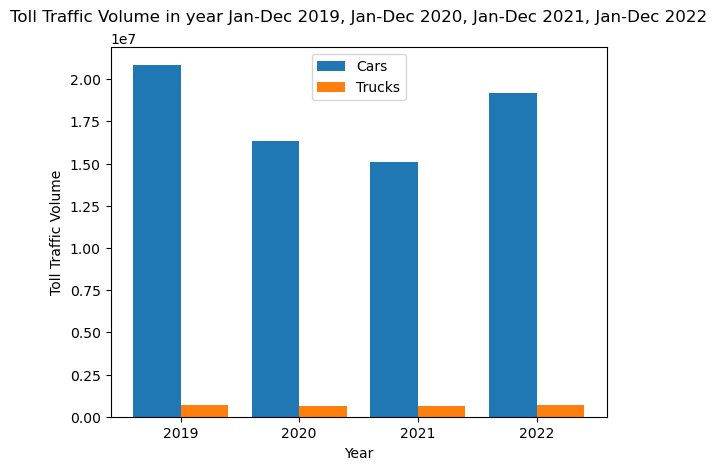

Wall time: 359 ms


In [27]:
%%time
#Bar chart to show Toll Traffic Volume in year Jan-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022
Xaxis = np.arange(len(year))
  
plt.bar(Xaxis - 0.2, car_volume, 0.4, label = 'Cars')
plt.bar(Xaxis + 0.2, truck_volume, 0.4, label = 'Trucks')
  
plt.xticks(Xaxis, year)
plt.xlabel("Year")
plt.ylabel("Toll Traffic Volume")
plt.title("Toll Traffic Volume in year Jan-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022\n")
plt.legend()
plt.show()

<font color='black'><left><h2>Conclusion: <br><br>(i) As per the above descriptive analytics, cars contribute to more traffic in comparison with trucks. So, it is vital for the government to concentrate more on cars traffic management on the toll roads.
<br>(ii) It is evident from the graph that we can see a dip in traffic volume in 2020 and 2021 in comparison with 2019 and 2022, which is due to covid-19 impact and travel restrictions applied by the government.
</h2></left></font>

In [28]:
%%time
car_revenue

Wall time: 0 ns


[81829112.38, 130237201.92, 125871199.76, 166995750.89]

In [29]:
%%time
truck_revenue

Wall time: 0 ns


[5482763.13, 10199473.14, 10500972.18, 11819651.47]

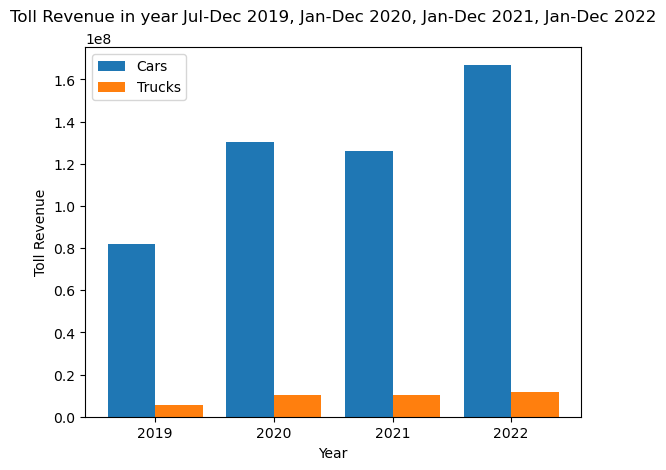

Wall time: 165 ms


In [30]:
%%time
#Bar chart to show Toll Revenue in year Jul-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022
Xaxis = np.arange(len(year))
  
plt.bar(Xaxis - 0.2, car_revenue, 0.4, label = 'Cars')
plt.bar(Xaxis + 0.2, truck_revenue, 0.4, label = 'Trucks')
  
plt.xticks(Xaxis, year)
plt.xlabel("Year")
plt.ylabel("Toll Revenue")
plt.title("Toll Revenue in year Jul-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022\n")
plt.legend()
plt.show()

<font color='black'><left><h2>Conclusion: <br><br>(i) As per the above descriptive analytics, cars generate more revenue in comparison with trucks. So, it is vital for the government to concentrate more on cars traffic management on the toll roads.
<br>(ii) It is evident from the graph that we can see a dip in toll revenue in 2020 and 2021 in comparison with 2022, which is due to covid-19 impact and travel restrictions applied by the government.
</h2></left></font>

<font color='purple'><center><h1>End: Answering "Which type of vehicle has created more traffic volume each year from Jan 2019 – Dec 2022 & generated more revenue each year from July 2019 – Dec 2022"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Impact on traffic volume in March 2020 due to COVID-19 restrictions by comparing March 2019 and March 2022"</h1></center></font>

<font color='blue'><center><h2>COVID-19 impact analysis</h2></center></font>

<font color='blue'><center><h2>Below analysis is done combining all TollPointIDs</h2></center></font>

In [31]:
%%time
#Create a copy of input traffic data
df_inp_data_covid = df_inp_data.copy()

#Convert date column data type from object to date
df_inp_data_covid['Date'] = pd.to_datetime(df_inp_data_covid['Date'])

#Read March 2019, March 2020 and March 2022 toll traffic data
df_covid_19 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2019-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2019-03-31')) ]
df_covid_20 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2020-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2020-03-31')) ]
df_covid_22 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2022-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2022-03-31')) ]

Wall time: 512 ms


<font color='blue'><center><h2>Split the data into seven phase wise COVID impact</h2></center></font>
<center>1. No restrictions applied between 1-14th of March <br>
2. Social gatherings allowed up to 500 people between 15-17th of March <br>
3. Social gatherings allowed up to 100 people between 18-19th of March <br>
4. Borders closed for international between 20-22nd of March <br>
5. Stage 1 shutdown announced between 23-24th of March <br>
6. Stage 2 shutdown announced between 25-28th of March <br>
7. Stage 3 shutdown announced between 29-31st of March <br>

In [32]:
%%time
#Split the data into seven phase wise COVID impact for the below month and year
#March 2019
df_covid_19_phase1 = df_covid_19[( df_covid_19['Date'] < pd.to_datetime('2019-03-15') )]
df_covid_19_phase2 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-14')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-18')) ]
df_covid_19_phase3 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-17')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-20')) ]
df_covid_19_phase4 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-19')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-23')) ]
df_covid_19_phase5 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-22')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-25')) ]
df_covid_19_phase6 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-24')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-29')) ]
df_covid_19_phase7 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-28')) ]

#March 2020
df_covid_20_phase1 = df_covid_20[( df_covid_20['Date'] < pd.to_datetime('2020-03-15') )]
df_covid_20_phase2 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-14')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-18')) ]
df_covid_20_phase3 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-17')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-20')) ]
df_covid_20_phase4 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-19')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-23')) ]
df_covid_20_phase5 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-22')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-25')) ]
df_covid_20_phase6 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-24')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-29')) ]
df_covid_20_phase7 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-28')) ]

#March 2022
df_covid_22_phase1 = df_covid_22[( df_covid_22['Date'] < pd.to_datetime('2022-03-15') )]
df_covid_22_phase2 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-14')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-18')) ]
df_covid_22_phase3 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-17')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-20')) ]
df_covid_22_phase4 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-19')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-23')) ]
df_covid_22_phase5 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-22')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-25')) ]
df_covid_22_phase6 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-24')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-29')) ]
df_covid_22_phase7 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-28')) ]

Wall time: 23.9 ms


In [33]:
%%time
#Prepare data for Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Phase = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6', 'Phase 7']
Traffic_volume_2019 = [df_covid_19_phase1['TotalVolume'].sum(), df_covid_19_phase2['TotalVolume'].sum(), df_covid_19_phase3['TotalVolume'].sum(), df_covid_19_phase4['TotalVolume'].sum(), df_covid_19_phase5['TotalVolume'].sum(), df_covid_19_phase6['TotalVolume'].sum(), df_covid_19_phase7['TotalVolume'].sum()]
Traffic_volume_2020 = [df_covid_20_phase1['TotalVolume'].sum(), df_covid_20_phase2['TotalVolume'].sum(), df_covid_20_phase3['TotalVolume'].sum(), df_covid_20_phase4['TotalVolume'].sum(), df_covid_20_phase5['TotalVolume'].sum(), df_covid_20_phase6['TotalVolume'].sum(), df_covid_20_phase7['TotalVolume'].sum()]
Traffic_volume_2022 = [df_covid_22_phase1['TotalVolume'].sum(), df_covid_22_phase2['TotalVolume'].sum(), df_covid_22_phase3['TotalVolume'].sum(), df_covid_22_phase4['TotalVolume'].sum(), df_covid_22_phase5['TotalVolume'].sum(), df_covid_22_phase6['TotalVolume'].sum(), df_covid_22_phase7['TotalVolume'].sum()]

Wall time: 3 ms


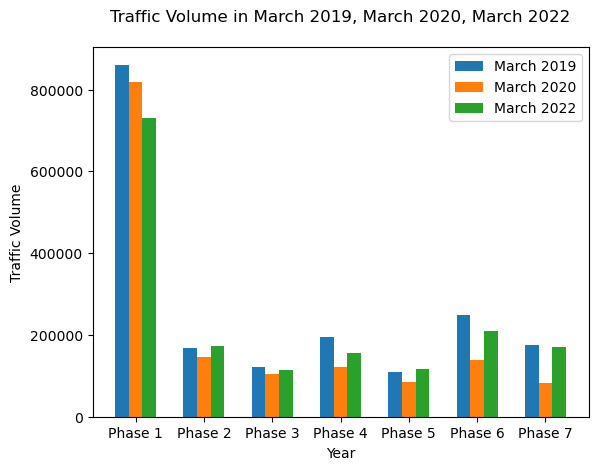

Wall time: 169 ms


In [34]:
%%time
#Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Xaxis = np.arange(len(Phase))
  
plt.bar(Xaxis - 0.2, Traffic_volume_2019, 0.2, label = 'March 2019')
plt.bar(Xaxis + 0.0, Traffic_volume_2020, 0.2, label = 'March 2020')
plt.bar(Xaxis + 0.2, Traffic_volume_2022, 0.2, label = 'March 2022')
  
plt.xticks(Xaxis, Phase)
plt.xlabel("Year")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume in March 2019, March 2020, March 2022\n")
plt.legend()
plt.show()

<font color='blue'><center><h2>Below analysis is done only for TollPointID = AB</h2></center></font>

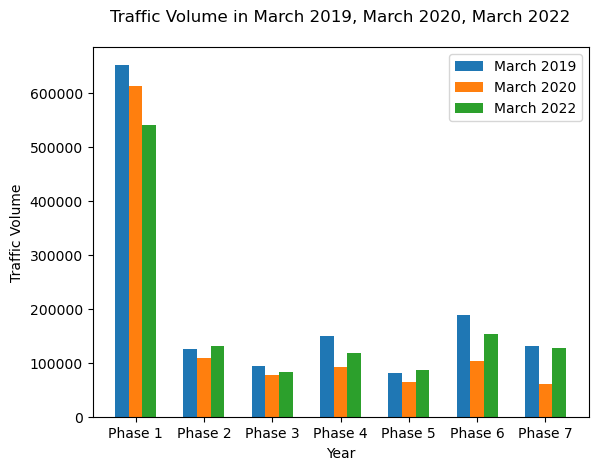

Wall time: 420 ms


In [35]:
%%time
df_inp_data_covid = df_inp_data_covid[( df_inp_data_covid['TollPointID'] == "AB" )]

#Read March 2019, March 2020 and March 2022 toll traffic data
df_covid_19 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2019-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2019-03-31')) ]
df_covid_20 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2020-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2020-03-31')) ]
df_covid_22 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2022-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2022-03-31')) ]

#Split the data into seven phase wise COVID impact for the below month and year
#March 2019
df_covid_19_phase1 = df_covid_19[( df_covid_19['Date'] < pd.to_datetime('2019-03-15') )]
df_covid_19_phase2 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-14')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-18')) ]
df_covid_19_phase3 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-17')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-20')) ]
df_covid_19_phase4 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-19')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-23')) ]
df_covid_19_phase5 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-22')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-25')) ]
df_covid_19_phase6 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-24')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-29')) ]
df_covid_19_phase7 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-28')) ]

#March 2020
df_covid_20_phase1 = df_covid_20[( df_covid_20['Date'] < pd.to_datetime('2020-03-15') )]
df_covid_20_phase2 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-14')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-18')) ]
df_covid_20_phase3 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-17')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-20')) ]
df_covid_20_phase4 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-19')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-23')) ]
df_covid_20_phase5 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-22')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-25')) ]
df_covid_20_phase6 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-24')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-29')) ]
df_covid_20_phase7 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-28')) ]

#March 2022
df_covid_22_phase1 = df_covid_22[( df_covid_22['Date'] < pd.to_datetime('2022-03-15') )]
df_covid_22_phase2 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-14')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-18')) ]
df_covid_22_phase3 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-17')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-20')) ]
df_covid_22_phase4 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-19')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-23')) ]
df_covid_22_phase5 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-22')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-25')) ]
df_covid_22_phase6 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-24')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-29')) ]
df_covid_22_phase7 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-28')) ]

#Prepare data for Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Phase = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6', 'Phase 7']
Traffic_volume_2019 = [df_covid_19_phase1['TotalVolume'].sum(), df_covid_19_phase2['TotalVolume'].sum(), df_covid_19_phase3['TotalVolume'].sum(), df_covid_19_phase4['TotalVolume'].sum(), df_covid_19_phase5['TotalVolume'].sum(), df_covid_19_phase6['TotalVolume'].sum(), df_covid_19_phase7['TotalVolume'].sum()]
Traffic_volume_2020 = [df_covid_20_phase1['TotalVolume'].sum(), df_covid_20_phase2['TotalVolume'].sum(), df_covid_20_phase3['TotalVolume'].sum(), df_covid_20_phase4['TotalVolume'].sum(), df_covid_20_phase5['TotalVolume'].sum(), df_covid_20_phase6['TotalVolume'].sum(), df_covid_20_phase7['TotalVolume'].sum()]
Traffic_volume_2022 = [df_covid_22_phase1['TotalVolume'].sum(), df_covid_22_phase2['TotalVolume'].sum(), df_covid_22_phase3['TotalVolume'].sum(), df_covid_22_phase4['TotalVolume'].sum(), df_covid_22_phase5['TotalVolume'].sum(), df_covid_22_phase6['TotalVolume'].sum(), df_covid_22_phase7['TotalVolume'].sum()]

#Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Xaxis = np.arange(len(Phase))
  
plt.bar(Xaxis - 0.2, Traffic_volume_2019, 0.2, label = 'March 2019')
plt.bar(Xaxis + 0.0, Traffic_volume_2020, 0.2, label = 'March 2020')
plt.bar(Xaxis + 0.2, Traffic_volume_2022, 0.2, label = 'March 2022')
  
plt.xticks(Xaxis, Phase)
plt.xlabel("Year")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume in March 2019, March 2020, March 2022\n")
plt.legend()
plt.show()

<font color='black'><left><h2>Conclusion:<br><br>(i) As per the above exploratory data analysis, with the restrictions announced from phase 2 – 7, we can see a dip in the traffic volume during March 2020 when compared with March 2019 & 2022.<br><br>(ii) Moreover, the stage 2 & 3 restrictions announced in phases 6 & 7 had greater impact to traffic volume during March 2020 in comparison to March 2019 & 2022.
</h2></left></font>

<font color='purple'><center><h1>End: Answering "Impact on traffic volume in March 2020 due to COVID-19 restrictions by comparing March 2019 and March 2022"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Busiest Day of the week"</h1></center></font>

In [36]:
%%time
#Input traffic data set
#Filter and store the data set of October, November and December 2022
df_busy = df_inp_data.copy()
df_busy['Date'] = pd.to_datetime(df_busy['Date'])
df_busy_2 = df_busy[( df_busy['Date'] > pd.to_datetime('2022-10-01') )]

Wall time: 486 ms


<font color='blue'><center><h2>Data Pre-Processing</h2></center></font>

In [37]:
%%time
#Preprocess and capture week and day in each row of the data set
Day = 0
Week = 1
Days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
Date = pd.to_datetime('2022-10-02')
df_busy_4 = df_busy[( df_busy['Date'] == 0 )]

for x in range(0,len( df_busy_2.Date.unique() )):
    df_busy_3 = df_busy_2[( df_busy_2['Date'] == Date )]
    df_busy_3['Week'] = Week
    df_busy_3['Day'] = Days[Day]
    Date = Date + pd.DateOffset(days=1)
    Day = Day + 1
    df_busy_4 = df_busy_4.append(df_busy_3)
    if Day == 7:
        Day = 0
        Week = Week + 1

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Wall time: 424 ms


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [38]:
%%time
#Display Asset ID, Toll Point ID, Week, Day, Date and Traffic volume of the data set
df_busy_4[['AssetID','TollPointID','Week','Day','Date','TotalVolume']]

Wall time: 6.98 ms


AssetID TollPointID  Week       Day       Date  TotalVolume
349        ED          AB   1.0    Sunday 2022-10-02          133
350        ED          AB   1.0    Sunday 2022-10-02            2
351        ED           C   1.0    Sunday 2022-10-02           51
352        ED           C   1.0    Sunday 2022-10-02            1
353        ED          AB   1.0    Sunday 2022-10-02          101
...       ...         ...   ...       ...        ...          ...
10962      ED           C  13.0  Saturday 2022-12-31            1
10963      ED          AB  13.0  Saturday 2022-12-31          130
10964      ED          AB  13.0  Saturday 2022-12-31            2
10965      ED           C  13.0  Saturday 2022-12-31           77
10966      ED           C  13.0  Saturday 2022-12-31            1

[32600 rows x 6 columns]

<font color='blue'><center><h2>Busiest Day of the week - All Directions</h2></center></font>

In [39]:
%%time
#Group by and find busiest day of the week through daily aggregated traffic volume of the toll road cummulative of all directions
for x in range(1,len( df_busy_4.Week.unique() )+1):
    df_busy_5 = df_busy_4[( df_busy_4['Week'] == x )]
    grouped = df_busy_5.groupby(['Week', 'Day'])['TotalVolume'].sum().sort_values(ascending=False)
    print(grouped)

Week  Day      
1.0   Friday       60917
      Thursday     60092
      Wednesday    59127
      Tuesday      58225
      Saturday     52518
      Monday       42350
      Sunday       41077
Name: TotalVolume, dtype: int64
Week  Day      
2.0   Friday       65063
      Thursday     63641
      Wednesday    61346
      Saturday     60791
      Tuesday      59315
      Monday       56522
      Sunday       43327
Name: TotalVolume, dtype: int64
Week  Day      
3.0   Friday       65165
      Thursday     62570
      Wednesday    60877
      Saturday     58998
      Tuesday      58539
      Monday       53885
      Sunday       47444
Name: TotalVolume, dtype: int64
Week  Day      
4.0   Friday       65951
      Thursday     64305
      Wednesday    63473
      Saturday     60675
      Tuesday      59347
      Monday       54064
      Sunday       45943
Name: TotalVolume, dtype: int64
Week  Day      
5.0   Friday       65548
      Thursday     63596
      Wednesday    60030
      Saturday   

<font color='blue'><center><h2>Busiest Day of the week - Direction = AB</h2></center></font>

In [40]:
%%time
#Group by and find busiest day of the week through daily aggregated traffic volume of the toll road in direction = AB
for x in range(1,len( df_busy_4.Week.unique() )+1):
    df_busy_5 = df_busy_4[( df_busy_4['Week'] == x ) & ( df_busy_4['TollPointID'] == 'AB' )]
    grouped = df_busy_5.groupby(['Week', 'Day'])['TotalVolume'].sum().sort_values(ascending=False)
    print(grouped)

Week  Day      
1.0   Thursday     45932
      Friday       45877
      Wednesday    45003
      Tuesday      44326
      Saturday     37584
      Monday       32227
      Sunday       30072
Name: TotalVolume, dtype: int64
Week  Day      
2.0   Friday       48621
      Thursday     48140
      Wednesday    46524
      Tuesday      45000
      Saturday     44007
      Monday       43151
      Sunday       32175
Name: TotalVolume, dtype: int64
Week  Day      
3.0   Friday       48631
      Thursday     47470
      Wednesday    46106
      Tuesday      44523
      Saturday     42892
      Monday       40948
      Sunday       35231
Name: TotalVolume, dtype: int64
Week  Day      
4.0   Thursday     49334
      Friday       49299
      Wednesday    47860
      Tuesday      44787
      Saturday     44130
      Monday       40930
      Sunday       33745
Name: TotalVolume, dtype: int64
Week  Day      
5.0   Friday       49446
      Thursday     48429
      Wednesday    45311
      Saturday   

<h2><center>Conslusion: Friday is mostly the busiest day of the week since the daily aggregated traffic volume count is high on this day for the months October, November and December 2022

<font color='green'><center><h2><u>Friday Traffic Volume Trend in TollPointID AB</u></h2></center></font>

<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [41]:
%%time
df_peak_friday = df_inp_data.copy()
df_peak_friday['Date'] = pd.to_datetime(df_peak_friday['Date'])
df_peak_friday['Year-Month-Day-Time'] = df_peak_friday['Date'].dt.strftime('%Y-%m-%d') + " " + df_peak_friday['IntervalStart'].str.slice(0, 2) + ":00"
df_peak_friday_2 = df_peak_friday[( df_peak_friday['Date'] >= pd.to_datetime('2022-10-01') ) & ( df_peak_friday['TollPointID'] == "AB" )]

Wall time: 9.32 s


In [42]:
%%time
#Creating a dataframe with hour and its total volume
df_peak_friday_2 = df_peak_friday_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_friday_3 = df_peak_friday_2.to_frame()
df_peak_friday_3.to_csv('fri-day.csv')
df_peak_friday_4 = pd.read_csv("C:/Users/USER/Documents/Toll/fri-day.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_peak_friday_4['Time'] = df_peak_friday_4['Year-Month-Day-Time'].str.slice(11, 16)
df_peak_friday_4['Year-Month-Day-Time'] = pd.to_datetime(df_peak_friday_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_peak_friday_4 = df_peak_friday_4.set_index("Year-Month-Day-Time")

Wall time: 46.8 ms


<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [43]:
%%time
def dt_feature_creation_friday(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


<font color='green'><center><h2><u>Add features to dataset</u></h2></center></font>

In [44]:
%%time
df_peak_friday_5 = dt_feature_creation_friday(df_peak_friday_4)

Wall time: 6.02 ms


<font color='green'><center><h2><u>Filter Friday dataset</u></h2></center></font>

In [45]:
%%time
df_peak_friday_6 = df_peak_friday_5[df_peak_friday_5['Day of the week'] == 4]

Wall time: 1.99 ms


<font color='green'><center><h2><u>Plot Friday dataset</u></h2></center></font>

Wall time: 533 ms


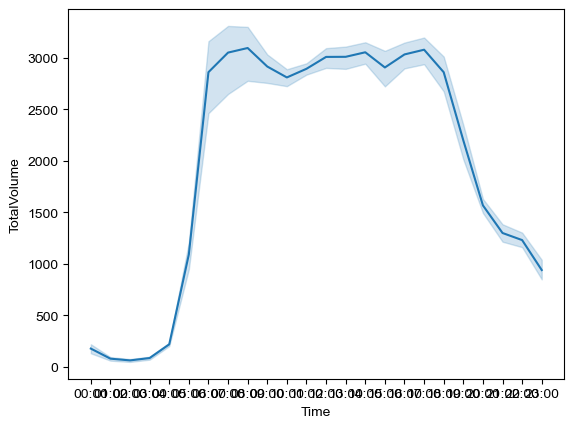

In [46]:
%%time
sns.lineplot(x=df_peak_friday_6["Time"], y=df_peak_friday_6["TotalVolume"], data=df_peak_friday_6)
sns.set(rc={'figure.figsize':(20,8)})

<font color='green'><center><h2><u>Display Friday dataset table</u></h2></center></font>

In [47]:
%%time
df_peak_friday_6

Wall time: 0 ns


TotalVolume   Time  Hour  Day of the week  Quarter  \
Year-Month-Day-Time                                                       
2022-10-07 00:00:00          189  00:00     0                4        4   
2022-10-07 01:00:00           71  01:00     1                4        4   
2022-10-07 02:00:00           66  02:00     2                4        4   
2022-10-07 03:00:00           92  03:00     3                4        4   
2022-10-07 04:00:00          212  04:00     4                4        4   
...                          ...    ...   ...              ...      ...   
2022-12-30 19:00:00         1529  19:00    19                4        4   
2022-12-30 20:00:00         1233  20:00    20                4        4   
2022-12-30 21:00:00         1017  21:00    21                4        4   
2022-12-30 22:00:00          998  22:00    22                4        4   
2022-12-30 23:00:00          651  23:00    23                4        4   

                     Month  Year  Day of the year  
Year-Month-Day-Time                                
2022-10-07 00:00:00     10  2022              280  
2022-10-07 01:00:00     10  2022              280  
2022-10-07 02:00:00     10  2022              280  
2022-10-07 03:00:00     10  2022              280  
2022-10-07 04:00:00     10  2022              280  
...                    ...   ...              ...  
2022-12-30 19:00:00     12  2022              364  
2022-12-30 20:00:00     12  2022              364  
2022-12-30 21:00:00     12  2022              364  
2022-12-30 22:00:00     12  2022              364  
2022-12-30 23:00:00     12  2022              364  

[312 rows x 8 columns]

<h2>Conclusion:</h2>
<h3>
(i) Looking at the above graphs, peak hours during daytime on Friday are 6.00am – 10.00am and 2.00pm – 6.00pm.
<br><br>(ii) The project suggests the government to alert the following services during this time duration.
<br>&emsp;&emsp;Emergency Ambulance Services.
<br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br>&emsp;&emsp;Increase public transport during this day and provide concession on fares, which creates job opportunities <br>&emsp;&emsp;in transport and reduces car accidents & ensures public safety.
<br><br>(iii) These are essential to ensure customer safety.
<br><br>(iv) Government can get revenue from speeding fines.
<br><br>(v) Automobile service companies can benefit from service works.
</h3>

<font color='purple'><center><h1>End: Answering "Busiest Day of the week"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Peak and Off-Peak Traffic Hours"</h1></center></font>

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID AB in October, November and December 2022</h2></center></font>

In [48]:
%%time
#Input traffic data set
#Filter and store the data set of October, November and December 2022 having TollPointID as AB
df_peak = df_inp_data.copy()
df_peak['Date'] = pd.to_datetime(df_peak['Date'])
df_peak['Year-Month-Day-Time'] = df_peak['Date'].dt.strftime('%Y-%m-%d') + " " + df_peak['IntervalStart'].str.slice(0, 2) + ":00"
df_peak_2 = df_peak[( df_peak['Date'] >= pd.to_datetime('2022-10-01') ) & ( df_peak['TollPointID'] == "AB" )]

Wall time: 9.34 s


In [49]:
%%time
#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

Wall time: 13 ms


In [50]:
%%time
#Display the dataframe with hour and its total volume
df_peak_5

Wall time: 0 ns


Year-Month-Day-Time  TotalVolume
0       2022-10-01 00:00          292
1       2022-10-01 01:00          131
2       2022-10-01 02:00           92
3       2022-10-01 03:00           78
4       2022-10-01 04:00          166
...                  ...          ...
2201    2022-12-31 19:00         1168
2202    2022-12-31 20:00          911
2203    2022-12-31 21:00          769
2204    2022-12-31 22:00         1021
2205    2022-12-31 23:00          816

[2206 rows x 2 columns]

In [51]:
%%time
#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)
df_peak_5

Wall time: 2 ms


Year-Month-Day-Time  TotalVolume   Time
0       2022-10-01 00:00          292  00:00
1       2022-10-01 01:00          131  01:00
2       2022-10-01 02:00           92  02:00
3       2022-10-01 03:00           78  03:00
4       2022-10-01 04:00          166  04:00
...                  ...          ...    ...
2201    2022-12-31 19:00         1168  19:00
2202    2022-12-31 20:00          911  20:00
2203    2022-12-31 21:00          769  21:00
2204    2022-12-31 22:00         1021  22:00
2205    2022-12-31 23:00          816  23:00

[2206 rows x 3 columns]

Wall time: 624 ms


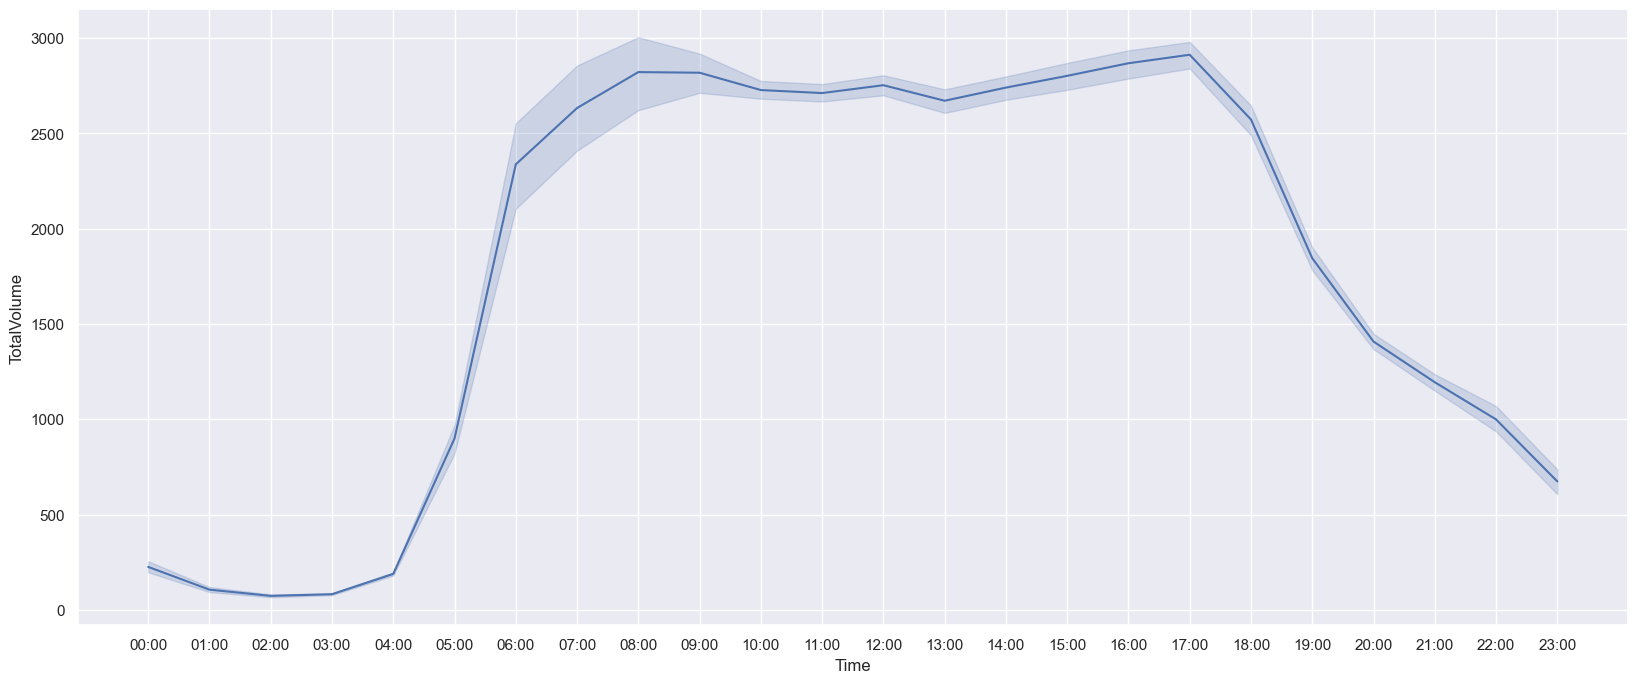

In [52]:
%%time
#Plot hourly traffic volume line graph for October, November and December 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID AB in Jan 2010 - Dec 2022</h2></center></font>

Wall time: 2.02 s


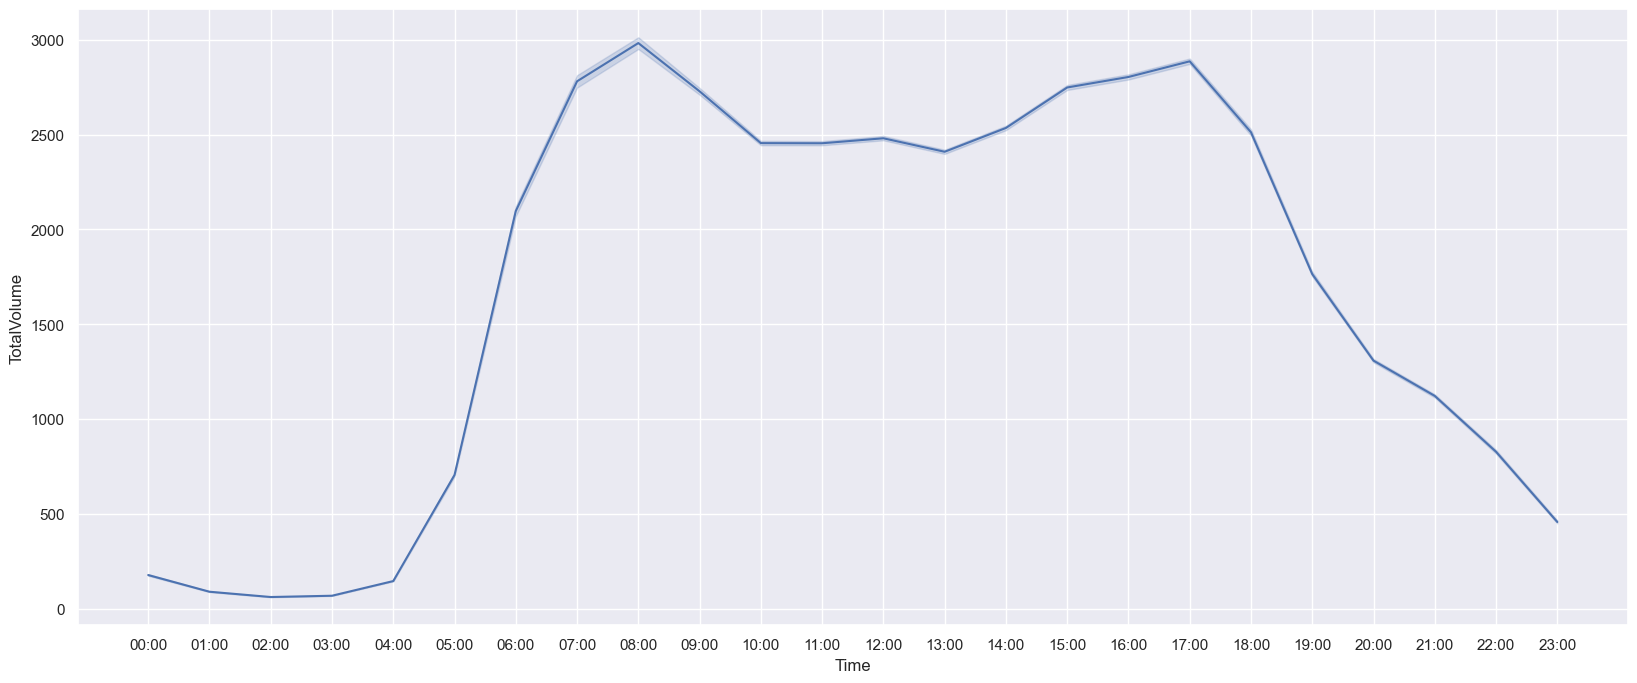

In [53]:
%%time
#Filter TollPointID as AB
df_peak_2 = df_peak[( df_peak['TollPointID'] == "AB" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for Jan 2010 - Dec 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID C in October, November and December 2022</h2></center></font>

Wall time: 652 ms


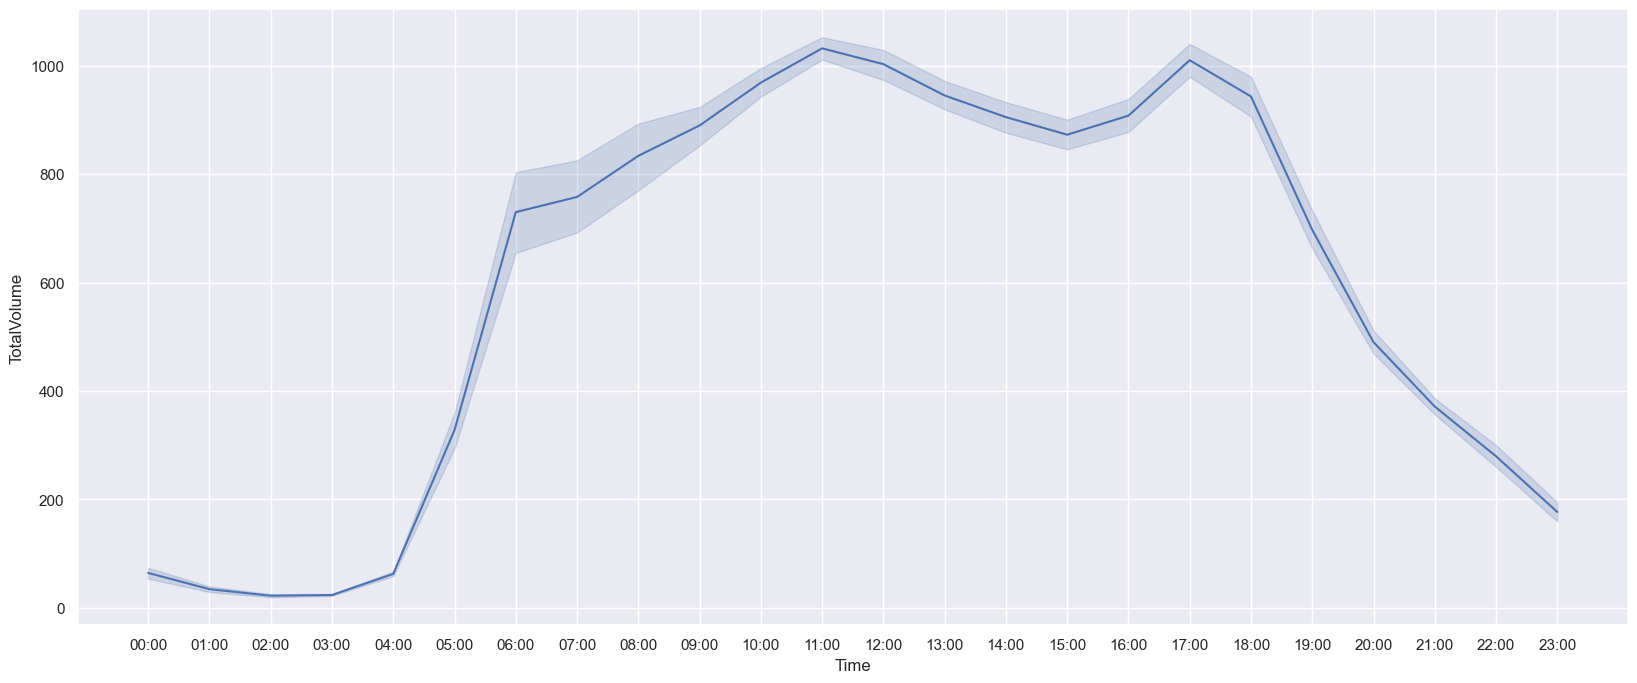

In [54]:
%%time
#Filter and store the data set of July, August and September 2022 having TollPointID as C
df_peak_2 = df_peak[( df_peak['Date'] >= pd.to_datetime('2022-10-01') ) & ( df_peak['TollPointID'] == "C" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for October, November and December 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID C in Jan 2010 - Dec 2022</h2></center></font>

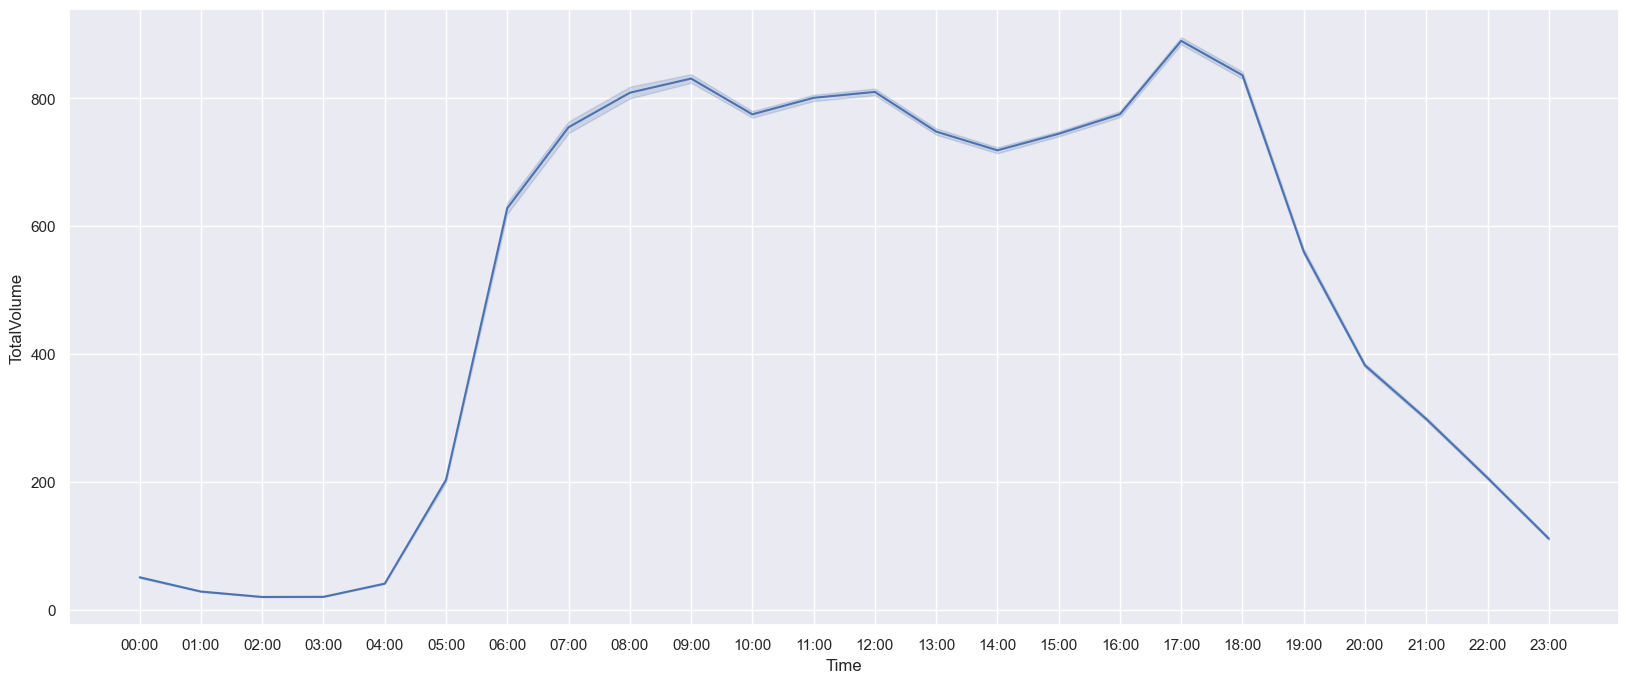

In [55]:
#Filter TollPointID as C
df_peak_2 = df_peak[( df_peak['TollPointID'] == "C" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for Jan 2010 - Dec 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='purple'><center><h1>End: Answering "Peak and Off-Peak Traffic Hours"</h1></center></font>

<font color='blue'><center><h2>NSW Crash Data Analysis</h2></center></font>

<font color='green'><center><h2><u>Read Input Data</u></h2></center></font>

In [56]:
%%time
df_crash_inp = pd.read_excel("C:/Users/USER/Documents/Toll/Crash/NSW_Road_Crash_Data_2017-2021_CRASH.xlsx")

Wall time: 45.3 s


In [57]:
%%time
df_crash = df_crash_inp.copy()
df_crash

Wall time: 16 ms


Crash ID         Degree of crash Degree of crash - detailed  \
0        1122708                   Fatal                      Fatal   
1        1122709                   Fatal                      Fatal   
2        1122710                   Fatal                      Fatal   
3        1123942                   Fatal                      Fatal   
4        1123948                   Fatal                      Fatal   
...          ...                     ...                        ...   
101713   1298478                  Injury         Minor/Other Injury   
101714   1298482                  Injury         Minor/Other Injury   
101715   1299029  Non-casualty (towaway)     Non-casualty (towaway)   
101716   1299030  Non-casualty (towaway)     Non-casualty (towaway)   
101717   1299039                   Fatal                      Fatal   

        Reporting year  Year of crash Month of crash Day of week of crash  \
0                 2017           2017        January               Monday   
1                 2017           2017        January               Monday   
2                 2017           2017        January              Tuesday   
3                 2017           2017        January             Thursday   
4                 2017           2017        January             Saturday   
...                ...            ...            ...                  ...   
101713            2021           2021            May              Tuesday   
101714            2021           2021           July             Saturday   
101715            2021           2021       February              Tuesday   
101716            2021           2021       November               Monday   
101717            2021           2021        October             Saturday   

       Two-hour intervals Street of crash Street type  ...  \
0           18:00 - 19:59       HOLLOWAYS          RD  ...   
1           12:00 - 13:59           PUTTY          RD  ...   
2           14:00 - 15:59      IRRIGATION         WAY  ...   
3           10:00 - 11:59          VARDYS          RD  ...   
4           12:00 - 13:59         PRINCES         HWY  ...   
...                   ...             ...         ...  ...   
101713      10:00 - 11:59      EMPIRE BAY          DR  ...   
101714      12:00 - 13:59    DENHAM COURT          RD  ...   
101715      06:00 - 07:59        MARYLAND          DR  ...   
101716      16:00 - 17:59       MONA VALE          RD  ...   
101717      16:00 - 17:59          MARKET          ST  ...   

                  DCA - description DCA supplement     First impact type  \
0               Off cway right bend           Left              Rollover   
1                     Opp - Head on            NaN               Head-on   
2                 Same - Rear right            NaN              Rear end   
3              Ped - On carriageway            NaN  Vehicle - Pedestrian   
4                     Opp - Head on            NaN               Head-on   
...                             ...            ...                   ...   
101713       Off left bend into obj           Left      Vehicle - Object   
101714             Opp - Right-thru            NaN           Other angle   
101715             Opp - Right-thru            NaN           Other angle   
101716  On path - Previous accident            NaN           Other angle   
101717              On path - Other            NaN      Vehicle - Object   

              Key TU type                   Other TU type  \
0           Station wagon                             NaN   
1              Motorcycle                     Light truck   
2            Artic tanker               Car (sedan/hatch)   
3            Semi-trailer                      Pedestrian   
4       Car (sedan/hatch)                   4 wheel drive   
...                   ...                             ...   
101713  Car (sedan/hatch)                             NaN   
101714  Car (sedan/hatch)               Car (sedan/hatch)   
101715      4 wheel dri

<font color='green'><center><h2><u>Display Day of week of crash in sorted order</u></h2></center></font>

In [58]:
%%time
df_crash_2 = df_crash[( df_crash['Road classification (admin)']  == "State") & (df_crash['Year of crash']  >= 2017) 
                      & (df_crash['Year of crash']  <= 2021)]
df_crash_3 = df_crash_2.groupby(['Day of week of crash'])['No. moderately injured'].sum().sort_values(ascending=False)
df_crash_3

Wall time: 30.9 ms


Day of week of crash
Friday       2804
Thursday     2703
Saturday     2603
Wednesday    2531
Tuesday      2450
Monday       2414
Sunday       2084
Name: No. moderately injured, dtype: int64

<font color='green'><center><h2><u>Display Hourly crash in sorted order</u></h2></center></font>

In [59]:
%%time
df_crash_4 = df_crash_2.groupby(['Two-hour intervals'])['No. moderately injured'].sum().sort_values(ascending=False)
df_crash_4.head(12)

Wall time: 5.95 ms


Two-hour intervals
16:00 - 17:59       2637
14:00 - 15:59       2492
12:00 - 13:59       2095
10:00 - 11:59       1865
08:00 - 09:59       1860
18:00 - 19:59       1722
06:00 - 07:59       1517
20:00 - 21:59       1178
22:00 - Midnight     774
04:00 - 05:59        616
00:01 - 01:59        457
02:00 - 03:59        375
Name: No. moderately injured, dtype: int64

<h2>Conclusion:</h2>
<h3>
(i) To generalize, Peak hours in daytime are: 6.00am - 10.00am and 2.00pm - 6.00pm
<br><br>(ii) Off-Peak hours in daytime are: 10.00am - 2.00pm
<br><br>(iii) A moderately injured crash in NSW above 300 / two hours is between 6.00am and 8:00pm.
<br><br>(iv) It is recommended that the government to alert and provide the following services in particularly during high traffic hours.
<br>&emsp;&emsp;Emergency Ambulance Services.
<br><br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br><br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br><br>&emsp;&emsp;Have rest areas opened in toll roads having more than 20 kilometers distance.
<br><br>&emsp;&emsp;Have coffee shops near rest areas during high traffic hours which will be a potential revenue generator which <br>&emsp;&emsp;is not the case currently on toll roads having more than 20 kilometers distance. In the project, toll road “Hills <br>&emsp;&emsp;M2” is used which is 21.4-kilometer distance motorway.
<br><br>&emsp;&emsp;Recommend offices to follow flexible day working hours so that traffic will not be bombarded during morning <br>&emsp;&emsp;& evening traffic hours instead it will be distributed during daytime.
<br><br>&emsp;&emsp;Increase public transport during high traffic hours to promote people to reduce travel by car, which can create <br>&emsp;&emsp;job opportunities in transport and reduce car accidents & ensure public safety.
<br><br>(v) By doing so, customer safety can be ensured.
<br><br>(vi) Government can get revenue from speeding fines.
<br><br>(vii) Automobile service companies can benefit from service works.
<br><br>(viii) Coffee shops can generate revenue.
</h3>

<font color='purple'><center><h1>Start: Answering "Special events can affect/change the daily seasonal traffic pattern which will be fetched and shown"</h1></center></font>

<font color='green'><center><h2><u>New Year Day</u></h2></center></font>

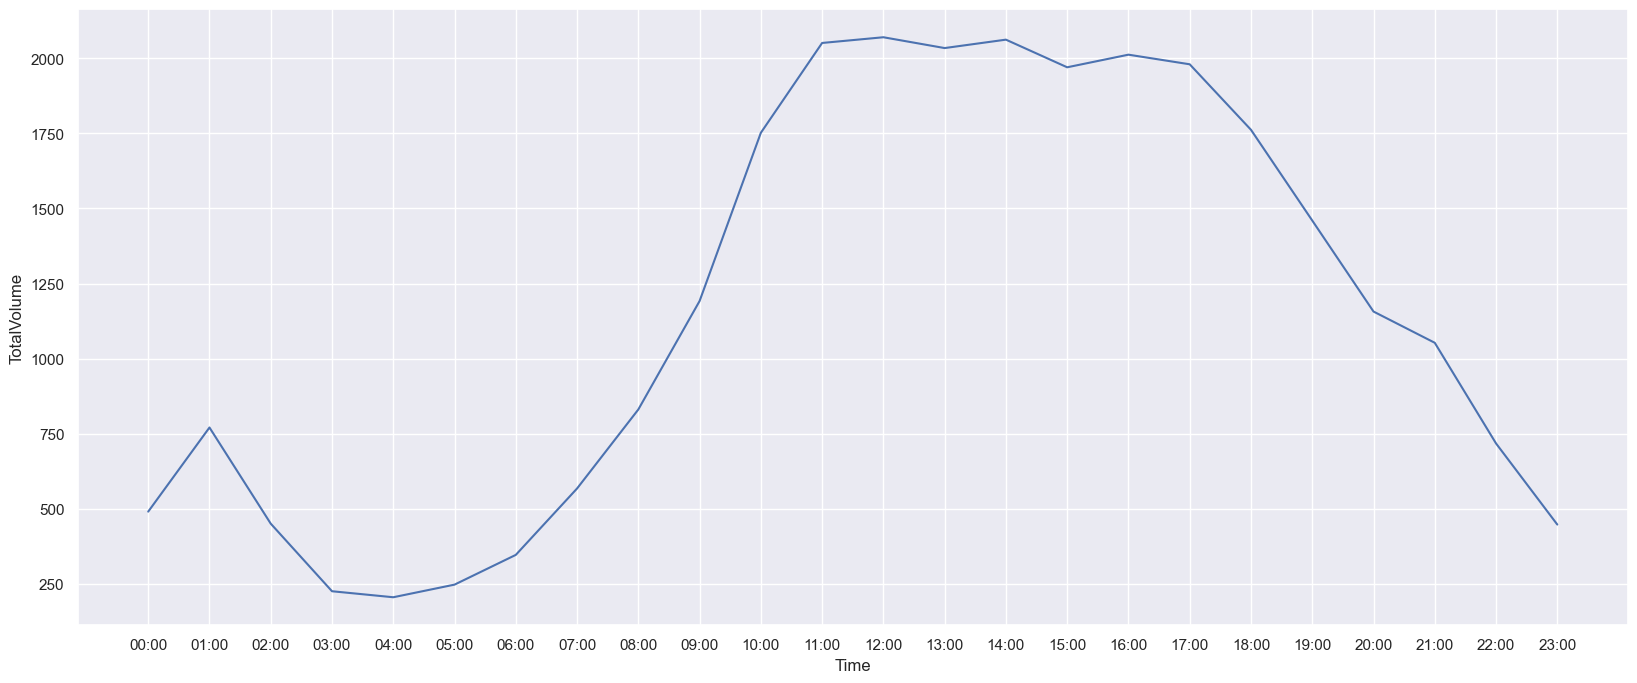

In [60]:
#Filter the dataset 1st Jan 2018 having TollPointID as AB
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2018-01-01') ) & ( df_peak['TollPointID'] == "AB" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

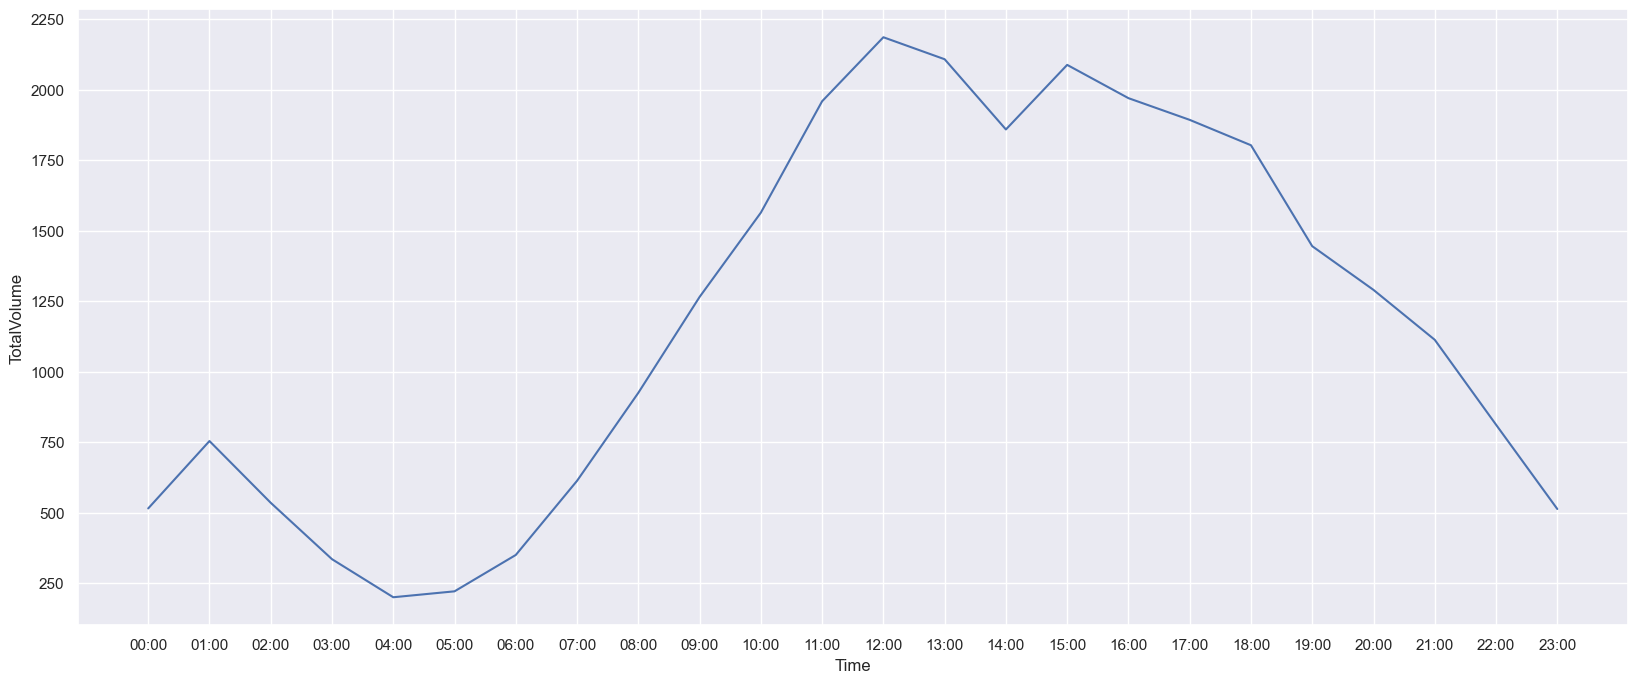

In [61]:
#Filter the dataset 1st Jan 2019 having TollPointID as AB
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2019-01-01') ) & ( df_peak['TollPointID'] == "AB" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

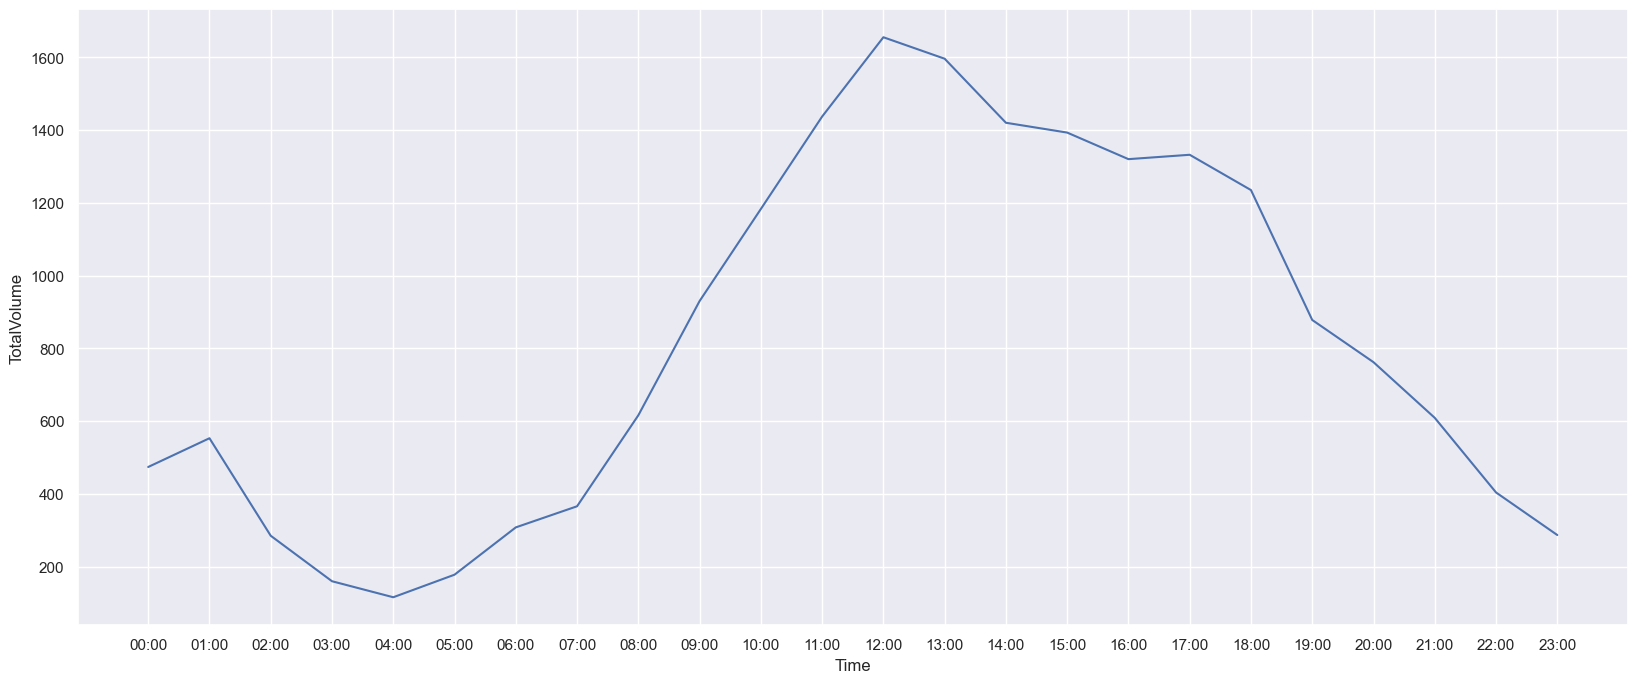

In [62]:
#Filter the dataset 1st Jan 2022 having TollPointID as AB
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2022-01-01') ) & ( df_peak['TollPointID'] == "AB" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<h2>Conclusion:</h2>
<h3>
(i) As per the above descriptive analytics, every year, at the start of the year, 01st Jan 00:30 – 2:30 AM, vehicle traffic was high due to people returning home after celebrating New Year Eve in the city center. This trend can advise people to plan their travel via the toll road.
<br><br>(ii) So, it is recommended for the government to alert following services during this time.
<br><br>&emsp;&emsp;Emergency Ambulance Services.
<br><br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br><br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br><br>&emsp;&emsp;Increasing speeding fine charges.
<br><br>(iii) This will ensure customer safety.
<br><br>(iv) Government can get revenue from speeding fines.
<br><br>(v) Automobile service companies can benefit from service works.
</h3>

<font color='green'><center><h2><u>Christmas Day</u></h2></center></font>

Wall time: 139 ms


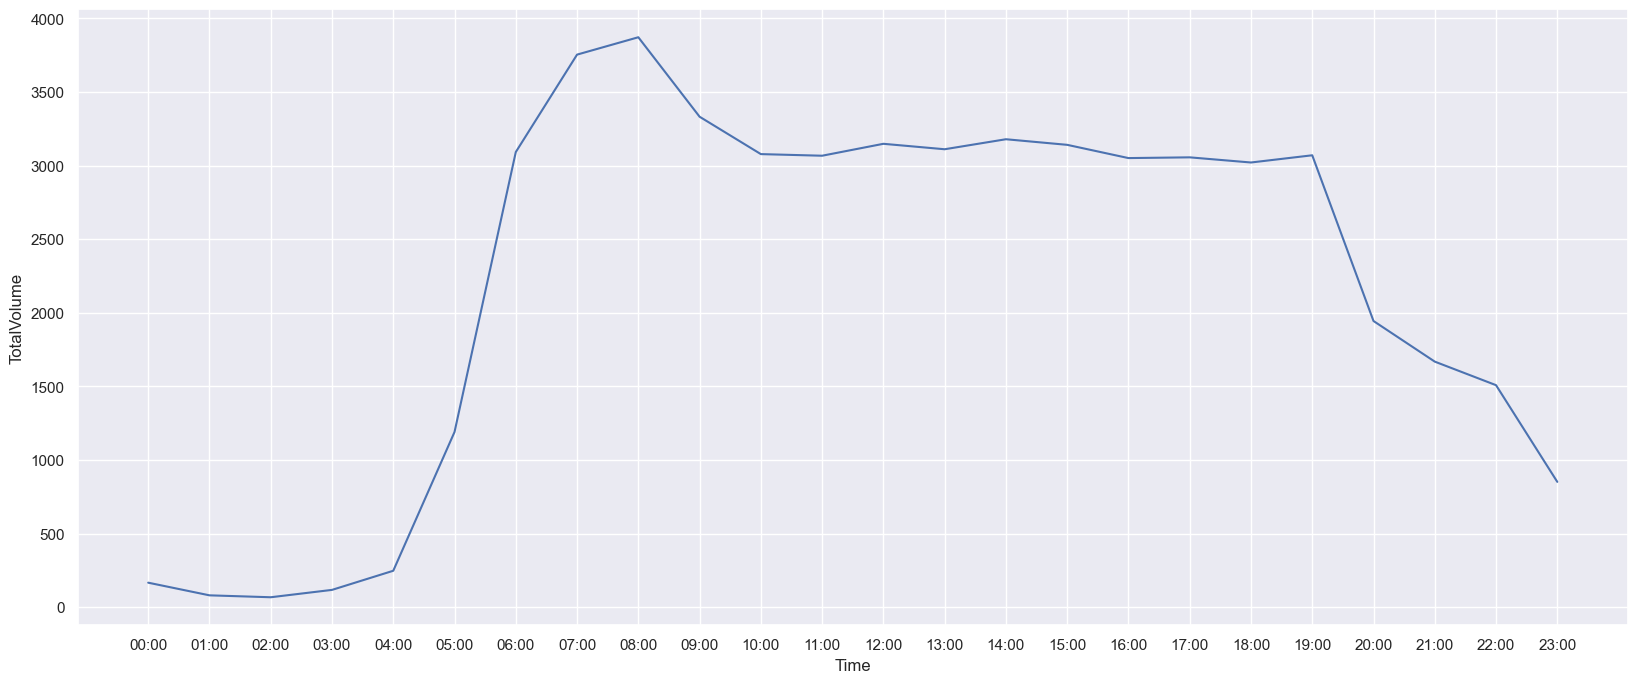

In [63]:
%%time
#Filter the dataset 25th Dec 2018 having TollPointID as AB
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2018-01-25') ) & ( df_peak['TollPointID'] == "AB" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 129 ms


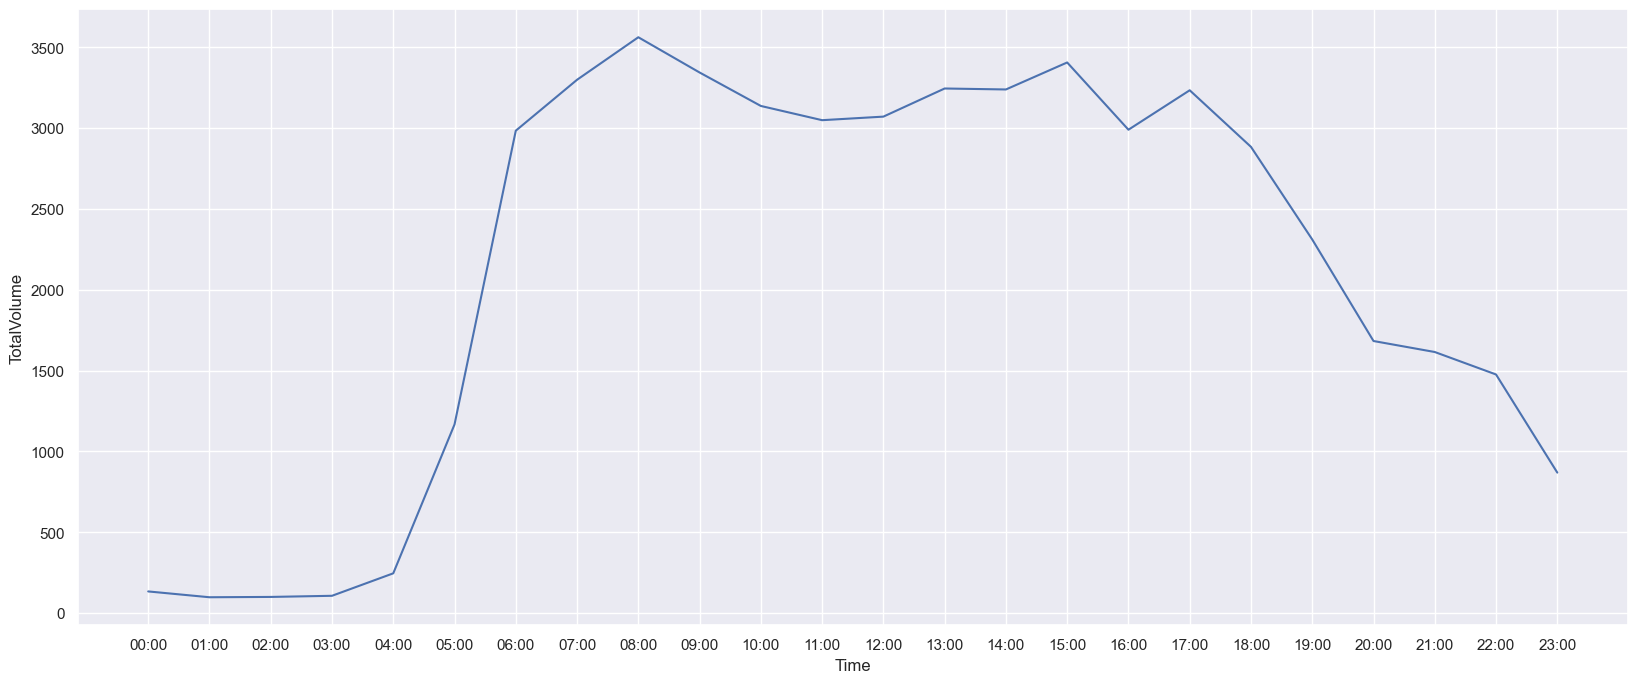

In [64]:
%%time
#Filter the dataset 25th Dec 2019 having TollPointID as AB
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2019-01-25') ) & ( df_peak['TollPointID'] == "AB" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 144 ms


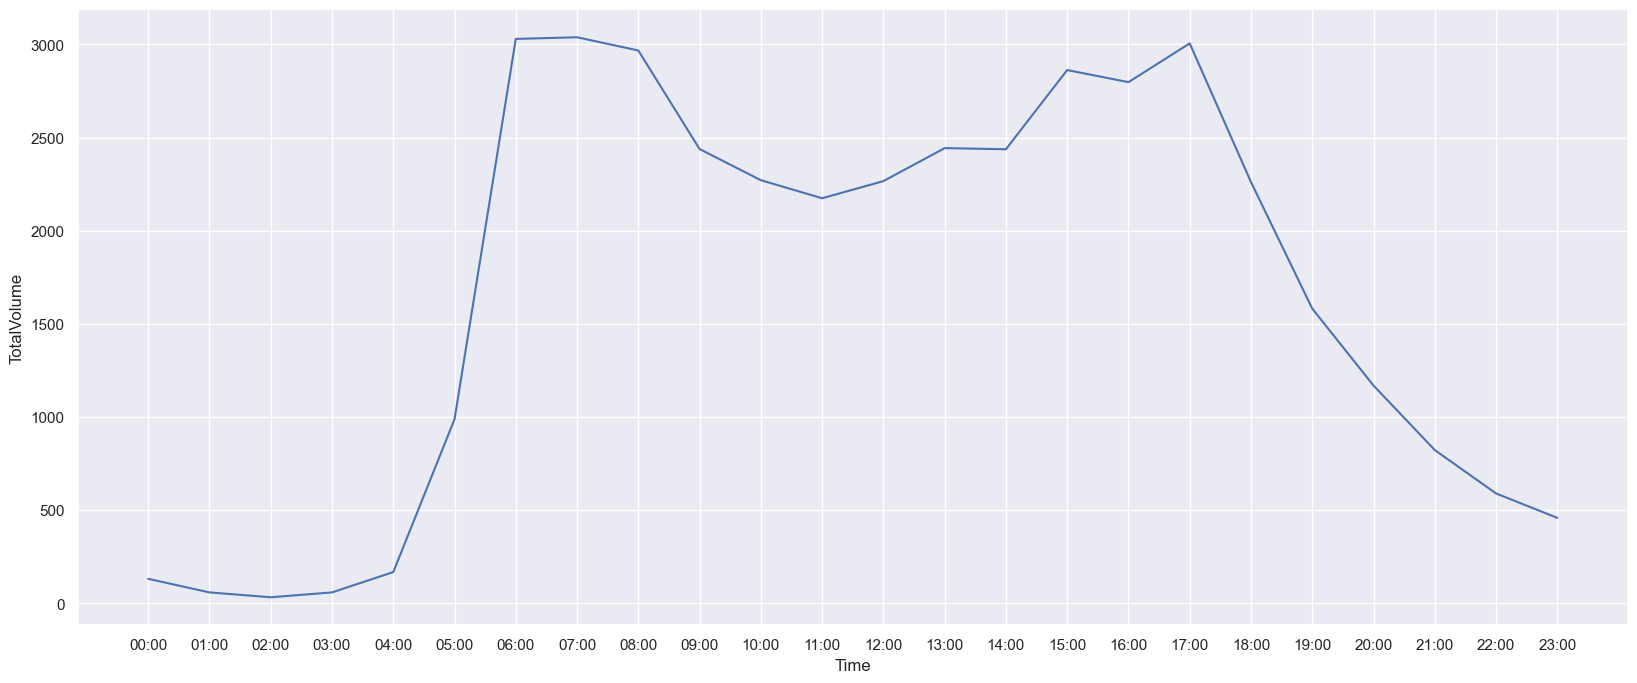

In [65]:
%%time
#Filter the dataset 25th Dec 2022 having TollPointID as AB
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2022-01-25') ) & ( df_peak['TollPointID'] == "AB" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<h2>Conclusion:</h2>
<h3>
(i) Looking at the above graphs, peak hours during daytime on Christmas are 6.00am – 10.00am and 2.00pm – 6.00pm.
<br><br>(ii) The project suggests the government to alert the following services during this time duration.
<br><br>&emsp;&emsp;Emergency Ambulance Services.
<br><br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br><br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br><br>&emsp;&emsp;Increasing speeding fine charges.
<br><br>(iii) These are essential to ensure customer safety.
<br><br>(iv) Government can get revenue from speeding fines.
<br><br>(v) Automobile service companies can benefit from service works.
</h3>

<font color='purple'><center><h1>End: Answering "Special events can affect/change the daily seasonal traffic pattern which will be fetched and shown"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Train and test the hourly traffic volume of cars and trucks in the historical data between 2010 & 2022 and will predict the next hour traffic volume as a short-range prediction" of the dissertation</h1></center></font>

<font color='blue'><center><h2>Model 1: ARIMA</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [70]:
%%time
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#Auto correlation - To know how many previous data we have to take. 
#p,d,q. p - AR Model Lags, d - Differencing / Integration, q - Moving Average Lags
#q is determined from ACF and p from PACF
#In ACF if band is increasing then the error part is increasing
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA is used when the dataset is non seasonal
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

Wall time: 831 ms


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [71]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as AB
df_arima = df_inp_data.copy()
df_arima['Date'] = pd.to_datetime(df_arima['Date'])
df_arima['Year-Month-Day-Time'] = df_arima['Date'].dt.strftime('%Y-%m-%d') + " " + df_arima['IntervalStart'].str.slice(0, 2) + ":00"
df_arima_1 = df_arima[df_arima['TollPointID'] == "AB"]

Wall time: 10.3 s


In [72]:
%%time
#Creating a dataframe with hour and its total volume
df_arima_2 = df_arima_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_arima_3 = df_arima_2.to_frame()
df_arima_3.to_csv('arima.csv')
df_arima_4 = pd.read_csv("C:/Users/USER/Documents/Toll/arima.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_arima_4['Year-Month-Day-Time'] = pd.to_datetime(df_arima_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_arima_4 = df_arima_4.set_index("Year-Month-Day-Time")

Wall time: 414 ms


In [73]:
%%time
#Display the dataframe with hour and its total volume
#df_arima_4 = df_arima_4.loc[df_arima_4.index < '09-01-2019']
df_arima_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00          323
2010-01-01 01:00:00          559
2010-01-01 02:00:00          327
2010-01-01 03:00:00          210
2010-01-01 04:00:00          144
...                          ...
2022-12-31 19:00:00         1168
2022-12-31 20:00:00          911
2022-12-31 21:00:00          769
2022-12-31 22:00:00         1021
2022-12-31 23:00:00          816

[113828 rows x 1 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

Wall time: 3.23 s


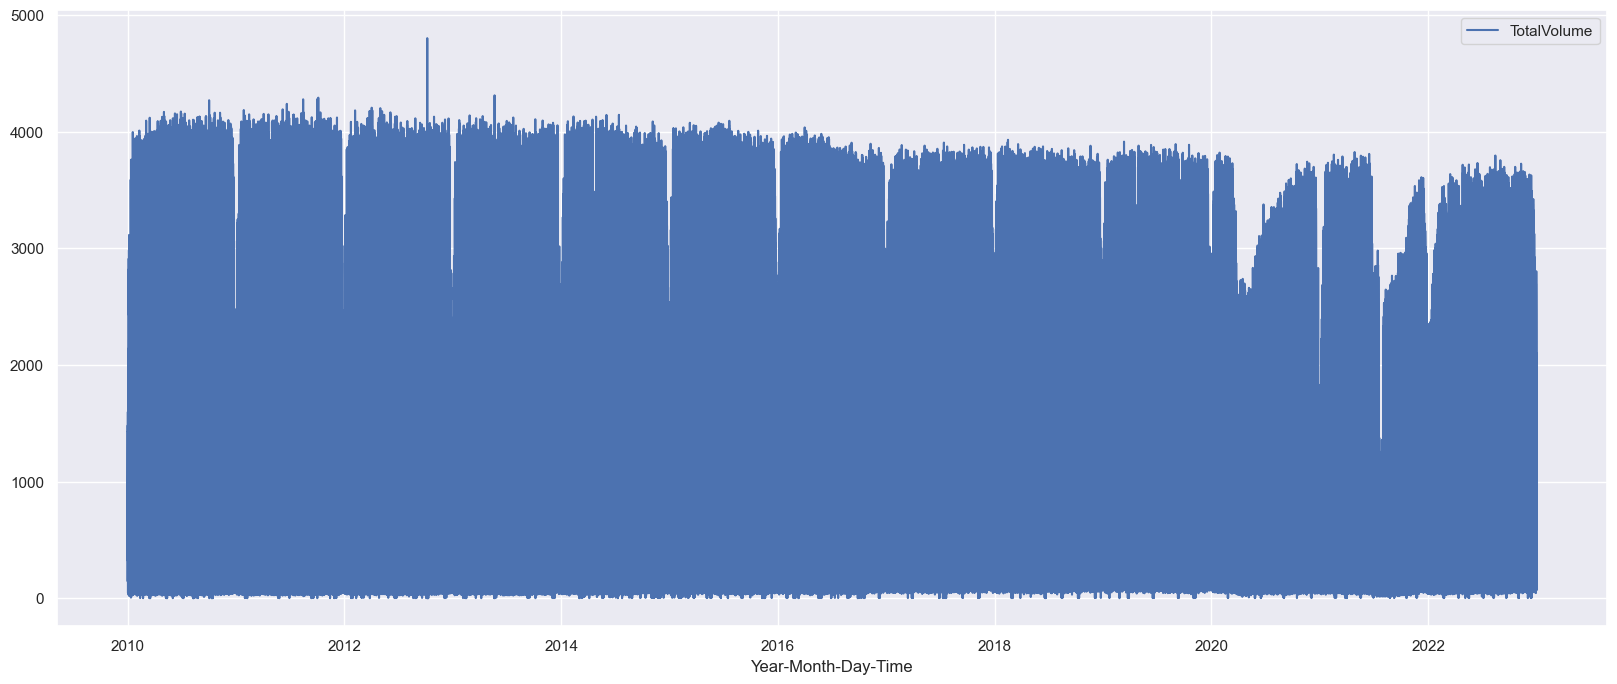

In [74]:
%%time
#Plot hourly traffic volume line graph for the given dataset
sns.lineplot(data=df_arima_4)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 352 ms


<AxesSubplot:xlabel='Year-Month-Day-Time'>

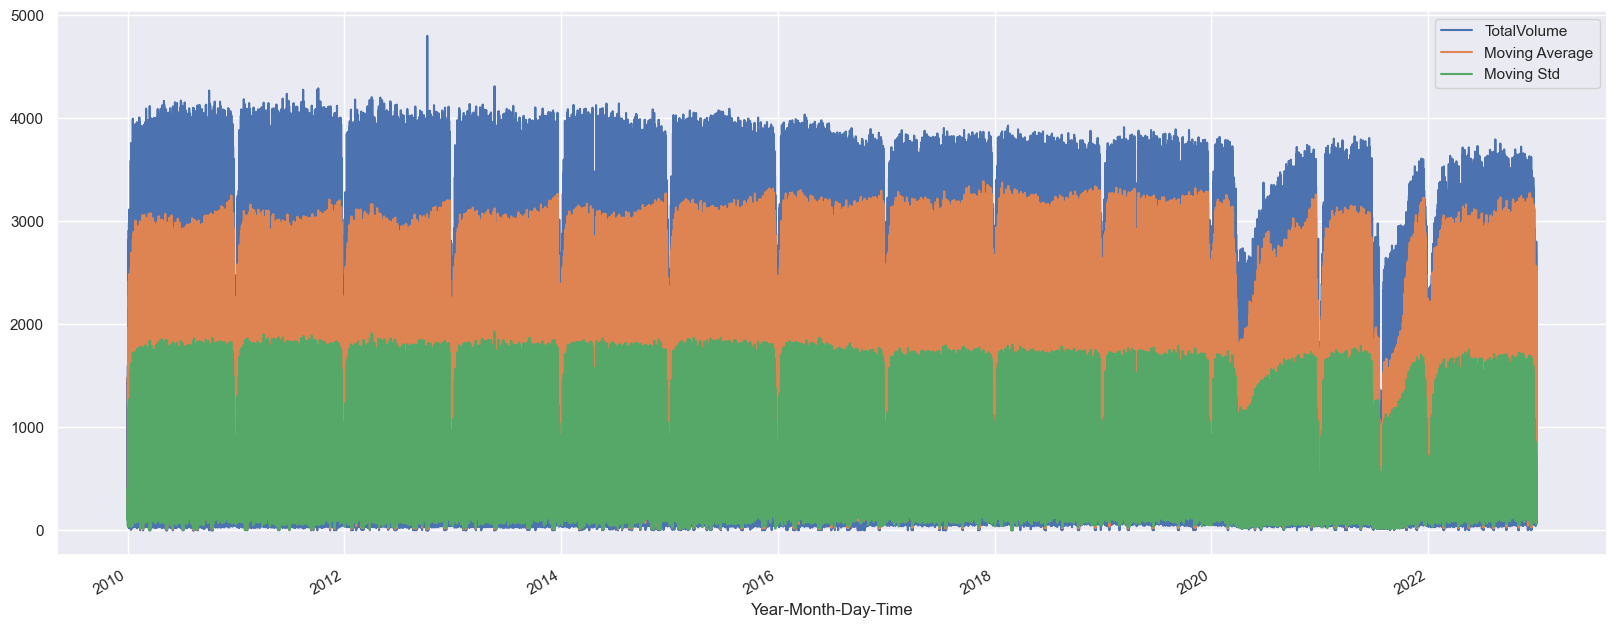

In [75]:
%%time
# Input Data Visualization, Moving average and Moving Standard Deviation
df_arima_4['Moving Average'] = df_arima_4['TotalVolume'].rolling(window=6).mean()
df_arima_4['Moving Std'] = df_arima_4['TotalVolume'].rolling(window=6).std()
df_arima_4.plot.line(y=['TotalVolume','Moving Average','Moving Std'])

<font color='green'><center><h2><u>Stationarity Test: Augmented Dickey-Fuller Test</u></h2></center></font>

In [76]:
%%time
#Ho: It is not stationary
#H1: It is stationary
#This test is for hypothesis testing

def adfuller_test(volume):
    result = adfuller(volume)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    print("Critical values:")
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result[1] <= 0.05:
        print("p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("p-value: Weak evidence against the null hypothesis, time series has a unit root, indicating it is not stationary")
    
    if result[0] < result[4]["5%"]:
        print("t-value: Reject Ho - Time Series is Stationary")
    else:
        print("t-value: Failed to Reject Ho - Time Series is Non-Stationary")

Wall time: 0 ns


In [77]:
%%time
adfuller_test(df_arima_4['TotalVolume'])

ADF Test Statistic : -18.57526092812698
p-value : 2.0805793074634094e-30
#Lags Used : 70
Number of Observations Used : 113757
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 18.9 s


<font color='green'><center><h2><u>Stationarity Test: Kwiatkowski–Phillips–Schmidt–Shin Test</u></h2></center></font>

In [78]:
%%time
stats, p, lags, critical_values = kpss(df_arima_4['TotalVolume'], 'ct')

Wall time: 211 ms


In [79]:
%%time
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.1945752670231461
p-value : 0.018034274866320213
#Lags Used : 8427
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is not stationary
Wall time: 0 ns


<font color='green'><center><h2><u>Differencing to make data as stationary for future prediction</u></h2></center></font>

In [80]:
%%time
df_arima_4['Volume First Difference'] = df_arima_4['TotalVolume'] - df_arima_4['TotalVolume'].shift(1)

Wall time: 1.99 ms


In [81]:
%%time
df_arima_4.head(25)

Wall time: 997 µs


TotalVolume  Moving Average  Moving Std  \
Year-Month-Day-Time                                            
2010-01-01 00:00:00          323             NaN         NaN   
2010-01-01 01:00:00          559             NaN         NaN   
2010-01-01 02:00:00          327             NaN         NaN   
2010-01-01 03:00:00          210             NaN         NaN   
2010-01-01 04:00:00          144             NaN         NaN   
2010-01-01 05:00:00          185      291.333333  150.697932   
2010-01-01 06:00:00          231      276.000000  151.509736   
2010-01-01 07:00:00          408      250.833333   98.296321   
2010-01-01 08:00:00          624      300.333333  182.790226   
2010-01-01 09:00:00          895      414.500000  294.728858   
2010-01-01 10:00:00         1013      559.333333  344.527890   
2010-01-01 11:00:00         1374      757.500000  419.865097   
2010-01-01 12:00:00         1482      966.000000  416.724849   
2010-01-01 13:00:00         1429     1136.166667  345.705896   
2010-01-01 14:00:00         1483     1279.333333  257.899722   
2010-01-01 15:00:00         1464     1374.166667  181.653975   
2010-01-01 16:00:00         1427     1443.166667   41.892322   
2010-01-01 17:00:00         1569     1475.666667   51.937141   
2010-01-01 18:00:00         1597     1494.833333   72.062242   
2010-01-01 19:00:00          976     1419.333333  226.546831   
2010-01-01 20:00:00          830     1310.500000  325.210547   
2010-01-01 21:00:00          815     1202.333333  368.935586   
2010-01-01 22:00:00          643     1071.666667  410.000813   
2010-01-01 23:00:00          403      877.333333  403.406825   
2010-01-02 00:00:00          174      640.166667  300.983333   

                     Volume First Difference  
Year-Month-Day-Time                           
2010-01-01 00:00:00                      NaN  
2010-01-01 01:00:00                    236.0  
2010-01-01 02:00:00                   -232.0  
2010-01-01 03:00:00                   -117.0  
2010-01-01 04:00:00                    -66.0  
2010-01-01 05:00:00                     41.0  
2010-01-01 06:00:00                     46.0  
2010-01-01 07:00:00                    177.0  
2010-01-01 08:00:00                    216.0  
2010-01-01 09:00:00                    271.0  
2010-01-01 10:00:00                    118.0  
2010-01-01 11:00:00                    361.0  
2010-01-01 12:00:00                    108.0  
2010-01-01 13:00:00                    -53.0  
2010-01-01 14:00:00                     54.0  
2010-01-01 15:00:00                    -19.0  
2010-01-01 16:00:00                    -37.0  
2010-01-01 17:00:00                    142.0  
2010-01-01 18:00:00                     28.0  
2010-01-01 19:00:00                   -621.0  
2010-01-01 20:00:00                   -146.0  
2010-01-01 21:00:00                    -15.0  
2010-01-01 22:00:00                   -172.0  
2010-01-01 23:00:00                   -240.0  
2010-01-02 00:00:00                   -229.0

In [82]:
%%time
#Again do adf test
adfuller_test( df_arima_4['Volume First Difference'].dropna() )

ADF Test Statistic : -72.55402999536335
p-value : 0.0
#Lags Used : 69
Number of Observations Used : 113757
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 17.7 s


In [83]:
%%time
#Again do kpss test
stats, p, lags, critical_values = kpss(df_arima_4['Volume First Difference'].dropna(), 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.0036207672984039634
p-value : 0.1
#Lags Used : 603
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is stationary
Wall time: 34.9 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Visualize first order shifted dataset</u></h2></center></font>

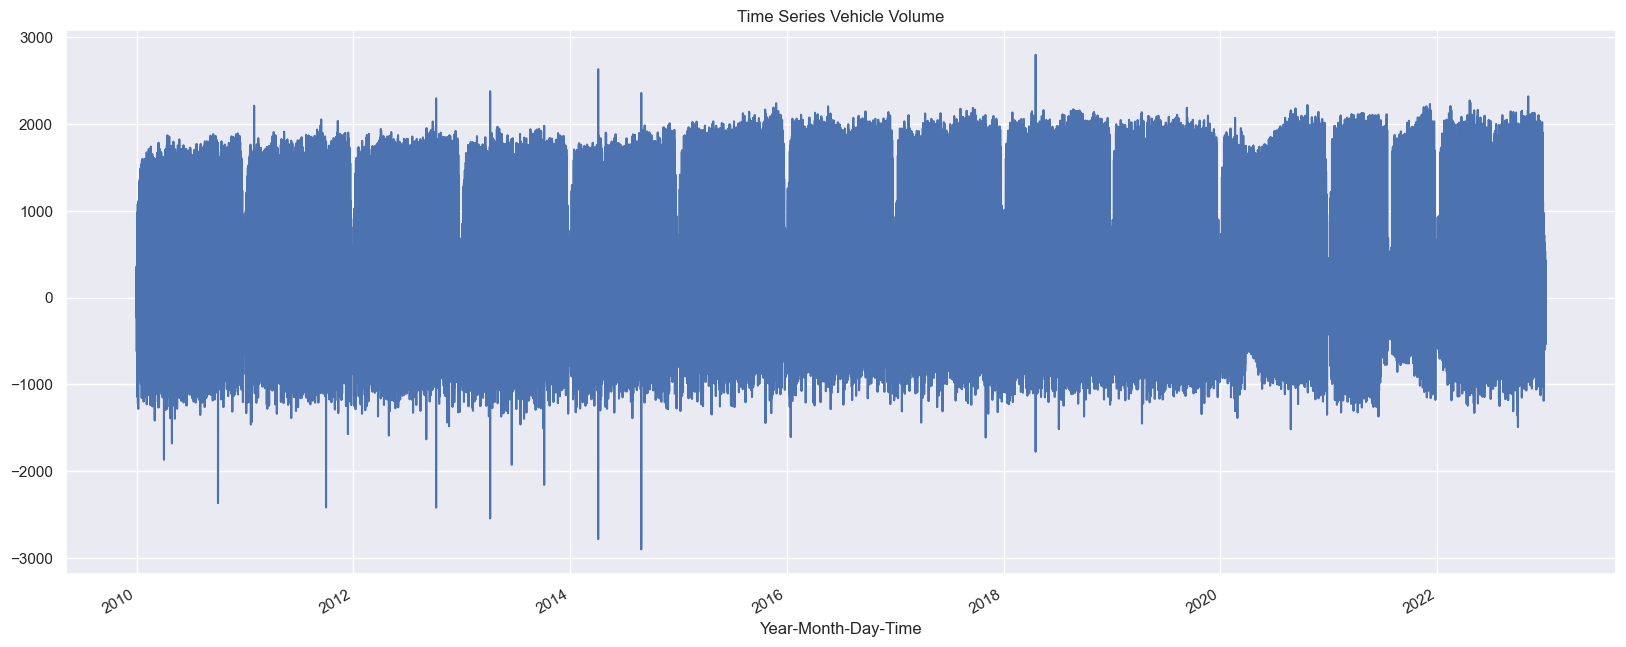

Wall time: 1.16 s


In [84]:
%%time
df_arima_4['Volume First Difference'].plot(figsize=(20,8), title="Time Series Vehicle Volume")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

Wall time: 342 ms


<AxesSubplot:xlabel='Year-Month-Day-Time'>

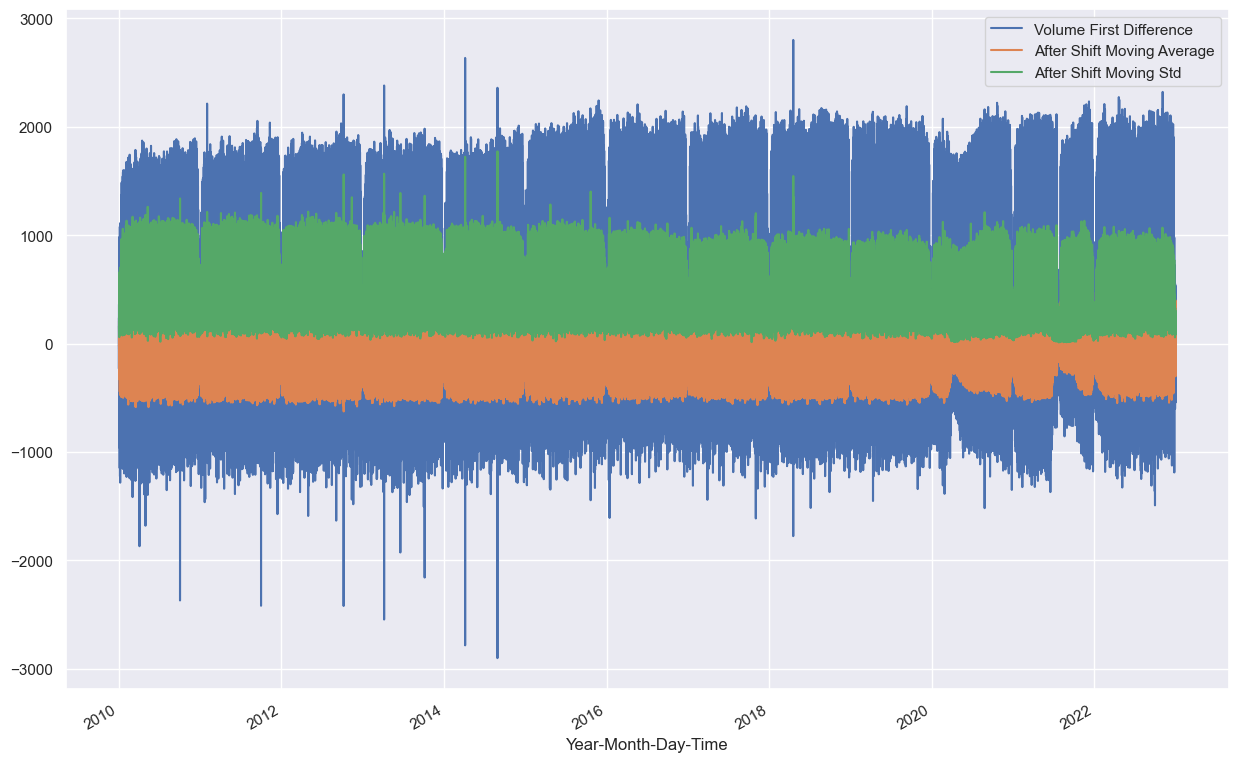

In [85]:
%%time
#Moving average and Moving standard deviation
df_arima_4['After Shift Moving Average'] = df_arima_4['Volume First Difference'].rolling(window=6).mean()
df_arima_4['After Shift Moving Std'] = df_arima_4['Volume First Difference'].rolling(window=6).std()
df_arima_4.plot.line(y=['Volume First Difference','After Shift Moving Average','After Shift Moving Std'])

<font color='green'><center><h2><u>Seasonality Check</u></h2></center></font>

Additive Decomposition:


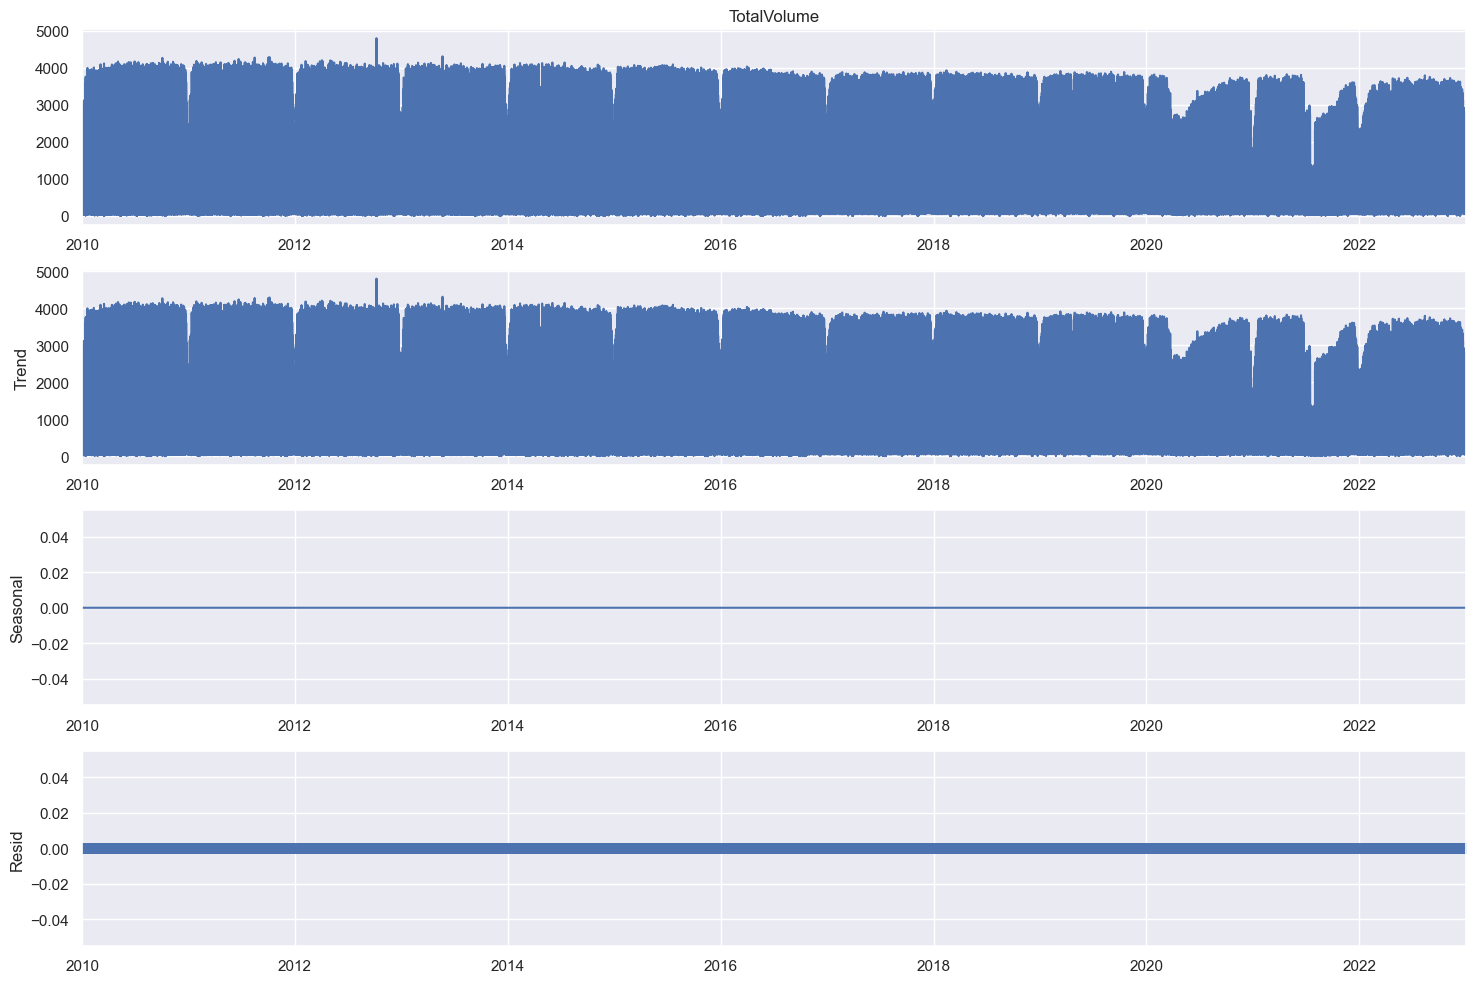

Wall time: 2.17 s


In [86]:
%%time
# Naive decomposition Additive
# observed = Trend + Sesonal + Residual
print("Additive Decomposition:")
result_additive = seasonal_decompose(x=df_arima_4['TotalVolume'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (15,10)})
result_additive.plot().suptitle('', fontsize=20)
plt.show()

In [87]:
%%time
df_arima_4['Seasonal First Difference'] = df_arima_4['TotalVolume'] - df_arima_4['TotalVolume'].shift(24)

Wall time: 3.03 ms


In [88]:
%%time
df_arima_4.head(25)

Wall time: 0 ns


TotalVolume  Moving Average  Moving Std  \
Year-Month-Day-Time                                            
2010-01-01 00:00:00          323             NaN         NaN   
2010-01-01 01:00:00          559             NaN         NaN   
2010-01-01 02:00:00          327             NaN         NaN   
2010-01-01 03:00:00          210             NaN         NaN   
2010-01-01 04:00:00          144             NaN         NaN   
2010-01-01 05:00:00          185      291.333333  150.697932   
2010-01-01 06:00:00          231      276.000000  151.509736   
2010-01-01 07:00:00          408      250.833333   98.296321   
2010-01-01 08:00:00          624      300.333333  182.790226   
2010-01-01 09:00:00          895      414.500000  294.728858   
2010-01-01 10:00:00         1013      559.333333  344.527890   
2010-01-01 11:00:00         1374      757.500000  419.865097   
2010-01-01 12:00:00         1482      966.000000  416.724849   
2010-01-01 13:00:00         1429     1136.166667  345.705896   
2010-01-01 14:00:00         1483     1279.333333  257.899722   
2010-01-01 15:00:00         1464     1374.166667  181.653975   
2010-01-01 16:00:00         1427     1443.166667   41.892322   
2010-01-01 17:00:00         1569     1475.666667   51.937141   
2010-01-01 18:00:00         1597     1494.833333   72.062242   
2010-01-01 19:00:00          976     1419.333333  226.546831   
2010-01-01 20:00:00          830     1310.500000  325.210547   
2010-01-01 21:00:00          815     1202.333333  368.935586   
2010-01-01 22:00:00          643     1071.666667  410.000813   
2010-01-01 23:00:00          403      877.333333  403.406825   
2010-01-02 00:00:00          174      640.166667  300.983333   

                     Volume First Difference  After Shift Moving Average  \
Year-Month-Day-Time                                                        
2010-01-01 00:00:00                      NaN                         NaN   
2010-01-01 01:00:00                    236.0                         NaN   
2010-01-01 02:00:00                   -232.0                         NaN   
2010-01-01 03:00:00                   -117.0                         NaN   
2010-01-01 04:00:00                    -66.0                         NaN   
2010-01-01 05:00:00                     41.0                         NaN   
2010-01-01 06:00:00                     46.0                  -15.333333   
2010-01-01 07:00:00                    177.0                  -25.166667   
2010-01-01 08:00:00                    216.0                   49.500000   
2010-01-01 09:00:00                    271.0                  114.166667   
2010-01-01 10:00:00                    118.0                  144.833333   
2010-01-01 11:00:00                    361.0                  198.166667   
2010-01-01 12:00:00                    108.0                  208.500000   
2010-01-01 13:00:00                    -53.0                  170.166667   
2010-01-01 14:00:00                     54.0                  143.166667   
2010-01-01 15:00:00                    -19.0                   94.833333   
2010-01-01 16:00:00                    -37.0                   69.000000   
2010-01-01 17:00:00                    142.0                   32.500000   
2010-01-01 18:00:00                     28.0                   19.166667   
2010-01-01 19:00:00                   -621.0                  -75.500000   
2010-01-01 20:00:00                   -146.0                 -108.833333   
2010-01-01 21:00:00                    -15.0                 -108.166667   
2010-01-01 22:00:00                   -172.0                 -130.666667   
2010-01-01 23:00:00                   -240.0                 -194.333333   
2010-01-02 00:00:00                   -229.0                 -237.166667   

                     After Shift Moving Std  Seasonal First Difference  
Year-Month-Day-Time                                                     
2010-01-01 00:00:00                     NaN                        NaN  
2010-01-01 01:00:00 

In [89]:
%%time
#Again do adf test
adfuller_test( df_arima_4['Seasonal First Difference'].dropna() )

ADF Test Statistic : -56.721512733182976
p-value : 0.0
#Lags Used : 70
Number of Observations Used : 113733
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 18.6 s


In [90]:
%%time
#Again do kpss test
stats, p, lags, critical_values = kpss(df_arima_4['Seasonal First Difference'].dropna(), 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.001963896370586993
p-value : 0.1
#Lags Used : 130
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is stationary
Wall time: 23.9 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Visualize seasonal order shifted dataset</u></h2></center></font>

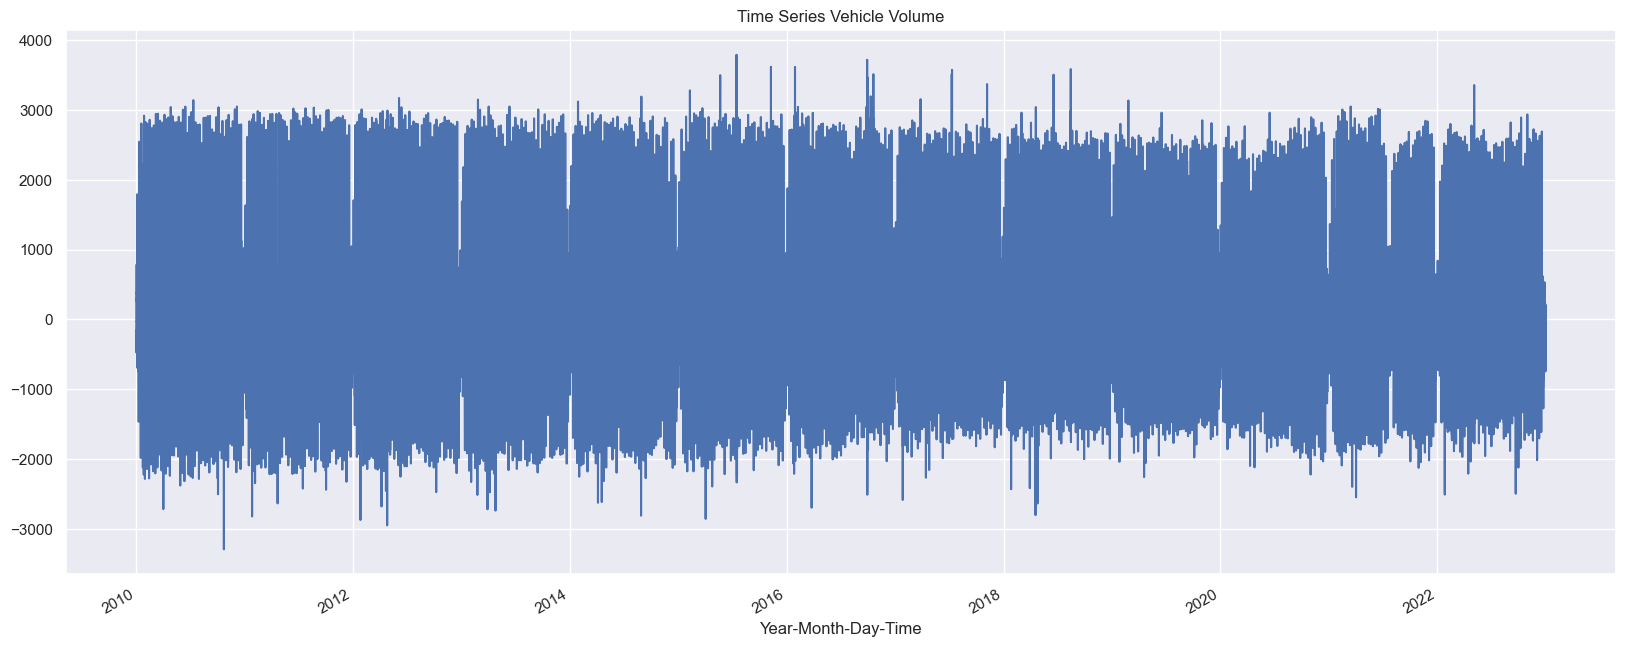

Wall time: 815 ms


In [91]:
%%time
df_arima_4['Seasonal First Difference'].plot(figsize=(20,8), title="Time Series Vehicle Volume")
plt.show()

<font color='green'><center><h2><u>Plot Autocorrelation & Partial Autocorrelation</u></h2></center></font>

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Wall time: 1.55 s


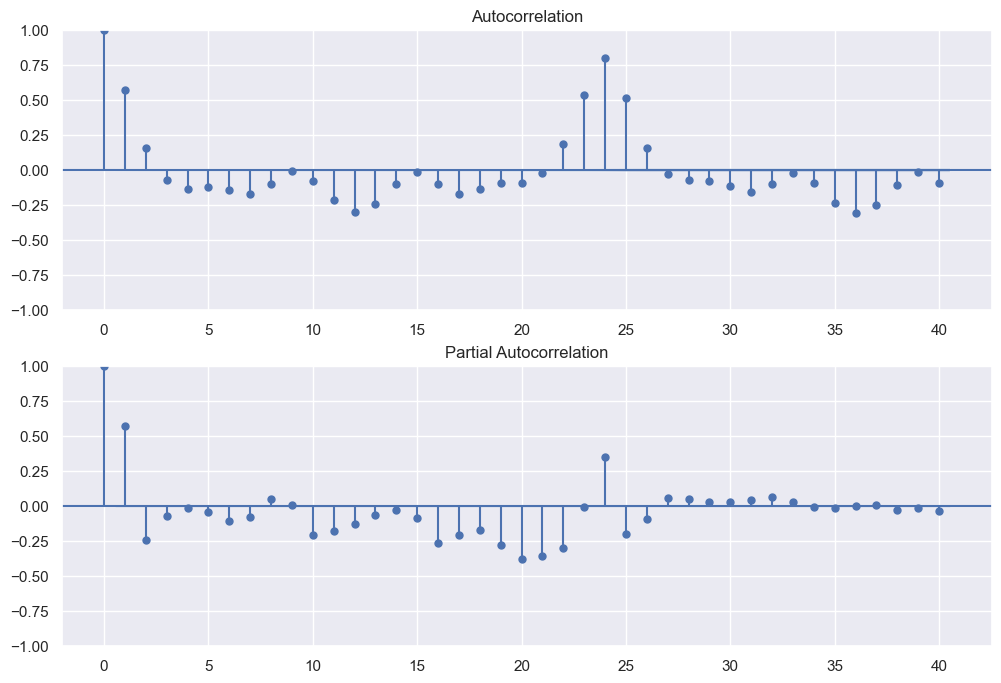

In [92]:
%%time
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima_4['Volume First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima_4['Volume First Difference'].iloc[2:],lags=40,ax=ax2)

In [93]:
%%time
model = sm.tsa.arima.ARIMA(df_arima_4['TotalVolume'], order=(9,1,9))
results = model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

Wall time: 4min 49s


<font color='green'><center><h2><u>Forecast / Predict using ARIMA model</u></h2></center></font>

Wall time: 326 ms


<AxesSubplot:xlabel='Year-Month-Day-Time'>

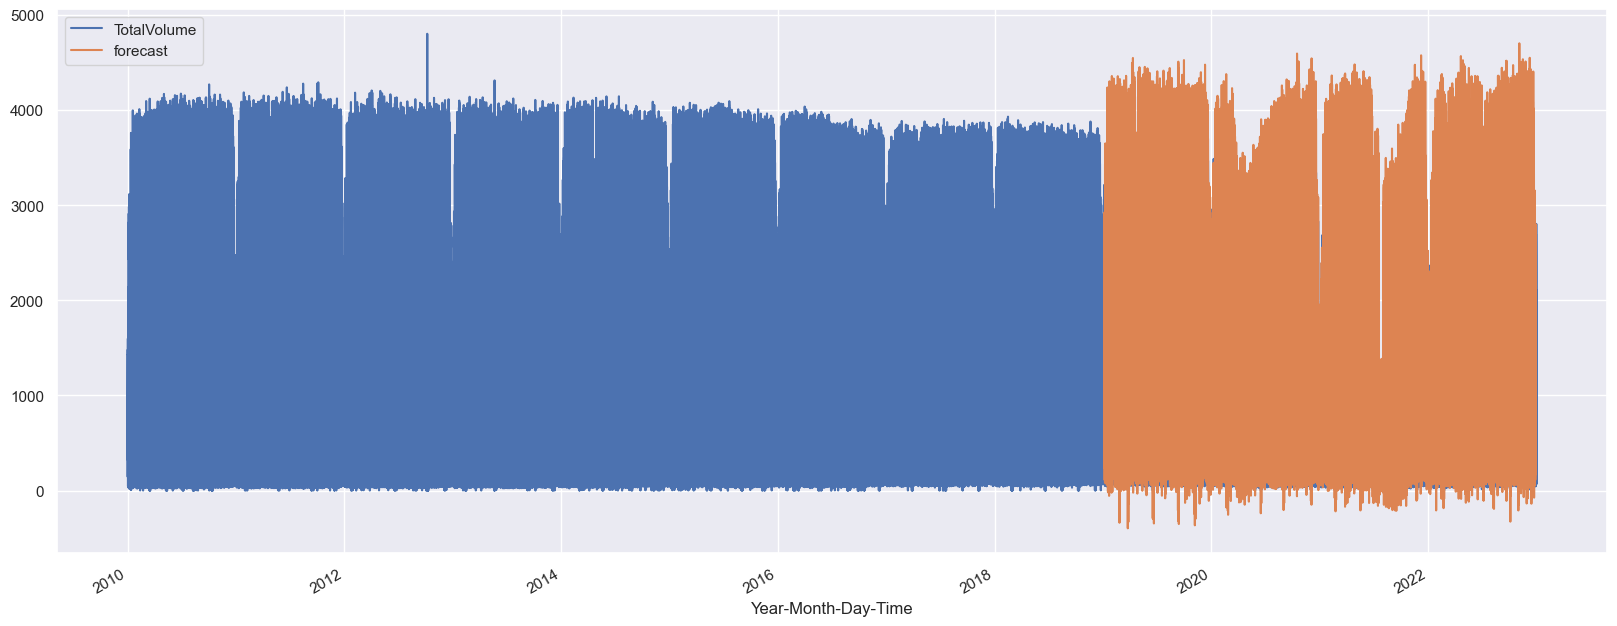

In [94]:
%%time
df_arima_4['forecast'] = results.predict(start=78888, end = 113752, dynamic= False)
df_arima_4[['TotalVolume','forecast']].plot(figsize=(20,8))

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [95]:
%%time
df_arima_5 = df_arima_4.dropna()

Wall time: 4.99 ms


In [96]:
%%time
ErrorValue = np.abs( df_arima_5['TotalVolume'] - df_arima_5['forecast'] )
print('Mean Abosolute Error Score of the predicted Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the predicted Dataset: 234.08
Wall time: 1.98 ms


<font color='blue'><center><h2>Model 2: LSTM</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [121]:
%%time
#Import Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

Wall time: 2.21 s


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [122]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as AB
df_lstm = df_inp_data.copy()
df_lstm['Date'] = pd.to_datetime(df_lstm['Date'])
df_lstm['Year-Month-Day-Time'] = df_lstm['Date'].dt.strftime('%Y-%m-%d') + " " + df_lstm['IntervalStart'].str.slice(0, 2) + ":00"
df_lstm_1 = df_lstm[df_lstm['TollPointID'] == "AB"]

Wall time: 9.17 s


In [123]:
%%time
#Creating a dataframe with hour and its total volume
df_lstm_2 = df_lstm_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_lstm_3 = df_lstm_2.to_frame()
df_lstm_3.to_csv('lstm.csv')
df_lstm_4 = pd.read_csv("C:/Users/USER/Documents/Toll/lstm.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_lstm_4['Year-Month-Day-Time'] = pd.to_datetime(df_lstm_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_lstm_4 = df_lstm_4.set_index("Year-Month-Day-Time")

Wall time: 400 ms


In [124]:
%%time
#Display the dataframe with hour and its total volume
df_lstm_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00          323
2010-01-01 01:00:00          559
2010-01-01 02:00:00          327
2010-01-01 03:00:00          210
2010-01-01 04:00:00          144
...                          ...
2022-12-31 19:00:00         1168
2022-12-31 20:00:00          911
2022-12-31 21:00:00          769
2022-12-31 22:00:00         1021
2022-12-31 23:00:00          816

[113828 rows x 1 columns]

In [125]:
%%time
#Convert total volume to float
df_lstm_5 = df_lstm_4.values
df_lstm_5 = df_lstm_5.astype('float32')

Wall time: 0 ns


In [126]:
%%time
#Display Total Volume as float
df_lstm_5

Wall time: 0 ns


array([[ 323.],
       [ 559.],
       [ 327.],
       ...,
       [ 769.],
       [1021.],
       [ 816.]], dtype=float32)

<font color='green'><center><h2><u>Data Normalization</u></h2></center></font>

In [127]:
%%time
#Normalize the dataset
scaler = MinMaxScaler()
df_lstm_6 = scaler.fit_transform(df_lstm_5)

Wall time: 9.38 ms


<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [117]:
%%time
#Split dataset into train and test
training_size = int(len(df_lstm_6)*0.70)
print ("Training size:",training_size)

testing_size = len(df_lstm_6) - training_size
print ("Testing size:",testing_size)

train, test = df_lstm_6[:training_size], df_lstm_6[training_size:]

Training size: 79679
Testing size: 34149
Wall time: 0 ns


In [118]:
%%time
#Create dataset matrix
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

Wall time: 0 ns


In [119]:
%%time
#Look back 730 values
look_back = 730
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#Reshape training & testing dataset
trainX = np.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1]))

Wall time: 259 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [120]:
%%time
#Create LSTM Model
model = Sequential()
model.add(LSTM(256,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               1010688   
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,010,945
Trainable params: 1,010,945
Non-trainable params: 0
_________________________________________________________________
Wall time: 371 ms


In [121]:
%%time
#fit the model
model.fit(trainX, trainY, batch_size=50, verbose=2, epochs=10)

Epoch 1/10
1579/1579 - 22s - loss: 0.0066 - mse: 0.0066 - 22s/epoch - 14ms/step
Epoch 2/10
1579/1579 - 20s - loss: 0.0023 - mse: 0.0023 - 20s/epoch - 13ms/step
Epoch 3/10
1579/1579 - 19s - loss: 0.0019 - mse: 0.0019 - 19s/epoch - 12ms/step
Epoch 4/10
1579/1579 - 18s - loss: 0.0017 - mse: 0.0017 - 18s/epoch - 12ms/step
Epoch 5/10
1579/1579 - 18s - loss: 0.0016 - mse: 0.0016 - 18s/epoch - 12ms/step
Epoch 6/10
1579/1579 - 18s - loss: 0.0015 - mse: 0.0015 - 18s/epoch - 12ms/step
Epoch 7/10
1579/1579 - 18s - loss: 0.0014 - mse: 0.0014 - 18s/epoch - 12ms/step
Epoch 8/10
1579/1579 - 18s - loss: 0.0014 - mse: 0.0014 - 18s/epoch - 12ms/step
Epoch 9/10
1579/1579 - 18s - loss: 0.0013 - mse: 0.0013 - 18s/epoch - 12ms/step
Epoch 10/10
1579/1579 - 18s - loss: 0.0013 - mse: 0.0013 - 18s/epoch - 12ms/step
Wall time: 3min 9s


<font color='green'><center><h2><u>Predict train & test dataset</u></h2></center></font>

In [122]:
%%time
#Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1045/1045 [==============================] - 3s 3ms/step
Wall time: 12.2 s


In [123]:
%%time
#Inverse Transform Function
trainPredict2 = scaler.inverse_transform(trainPredict)
testPredict2 = scaler.inverse_transform(testPredict)

trainY2 = scaler.inverse_transform([trainY])
testY2 = scaler.inverse_transform([testY])

Wall time: 2.99 ms


<font color='green'><center><h2><u>Visualize Original Vs Predicted Dataset</u></h2></center></font>

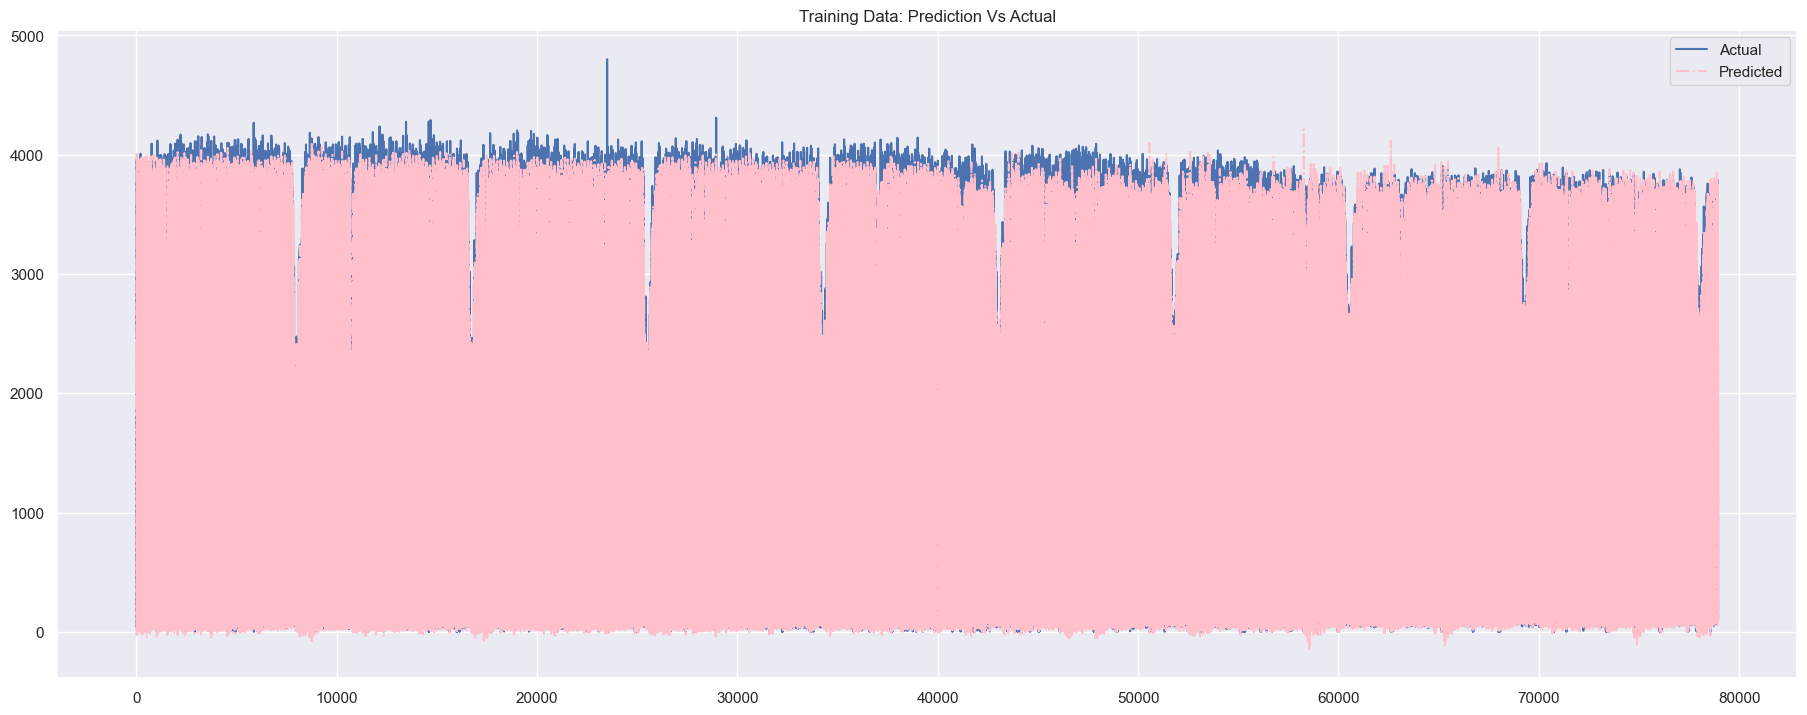

Wall time: 1.61 s


In [124]:
%%time
plt.figure(figsize=(20,8))
plt.plot(trainY2[0].tolist())
plt.plot(trainPredict2.tolist(), color='pink', linestyle='dashdot')
plt.title("Training Data: Prediction Vs Actual")
plt.legend(["Actual", "Predicted"])
plt.show()

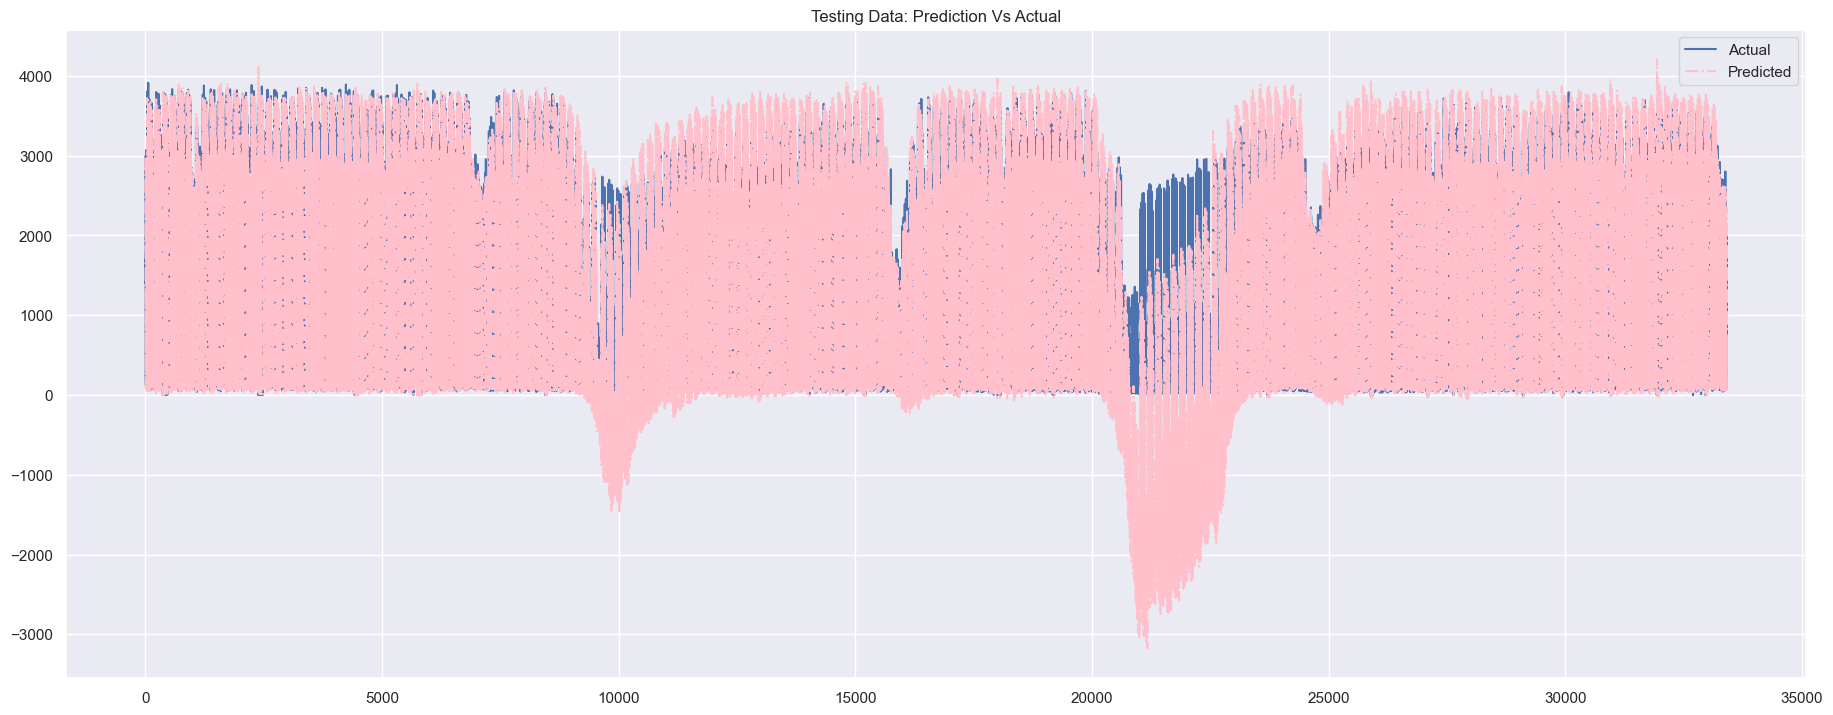

Wall time: 609 ms


In [125]:
%%time
plt.figure(figsize=(20,8))
plt.plot(testY2[0].tolist())
plt.plot(testPredict2.tolist(), color='pink', linestyle='dashdot')
plt.title("Testing Data: Prediction Vs Actual")
plt.legend(["Actual", "Predicted"])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [126]:
%%time
# Calculate Mean Absolute Error
ErrorValue = np.abs( trainY2[0] - trainPredict2[:,0] )
print('Mean Abosolute Error Score of the Training Dataset:', round(ErrorValue.mean(),2) )

ErrorValue = np.abs( testY2[0] - testPredict2[:,0] )
print('Mean Abosolute Error Score of the Testing Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the Training Dataset: 102.16
Mean Abosolute Error Score of the Testing Dataset: 254.46
Wall time: 2.01 ms


<font color='blue'><center><h2>Model 3: DecisionTreeRegressor</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [127]:
%%time
#Import Libraries
from sklearn.tree import DecisionTreeRegressor

Wall time: 208 ms


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [128]:
%%time
#Input traffic data set
#Filter and store the dataset having TollPointID as AB
df_dtregressor = df_inp_data.copy()
df_dtregressor['Date'] = pd.to_datetime(df_dtregressor['Date'])
df_dtregressor['Year-Month-Day-Time'] = df_dtregressor['Date'].dt.strftime('%Y-%m-%d') + " " + df_dtregressor['IntervalStart'].str.slice(0, 2) + ":00"
df_dtregressor_1 = df_dtregressor[df_dtregressor['TollPointID'] == "AB"]

Wall time: 10.5 s


In [129]:
%%time
#Creating a dataframe with hour and its total volume
df_dtregressor_2 = df_dtregressor_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_dtregressor_3 = df_dtregressor_2.to_frame()
df_dtregressor_3.to_csv('dt.csv')
df_dtregressor_4 = pd.read_csv("C:/Users/USER/Documents/Toll/dt.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_dtregressor_4['Year-Month-Day-Time'] = pd.to_datetime(df_dtregressor_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_dtregressor_4 = df_dtregressor_4.set_index("Year-Month-Day-Time")

Wall time: 452 ms


In [130]:
%%time
#Display the dataframe with hour and its total volume
df_dtregressor_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00          323
2010-01-01 01:00:00          559
2010-01-01 02:00:00          327
2010-01-01 03:00:00          210
2010-01-01 04:00:00          144
...                          ...
2022-12-31 19:00:00         1168
2022-12-31 20:00:00          911
2022-12-31 21:00:00          769
2022-12-31 22:00:00         1021
2022-12-31 23:00:00          816

[113828 rows x 1 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

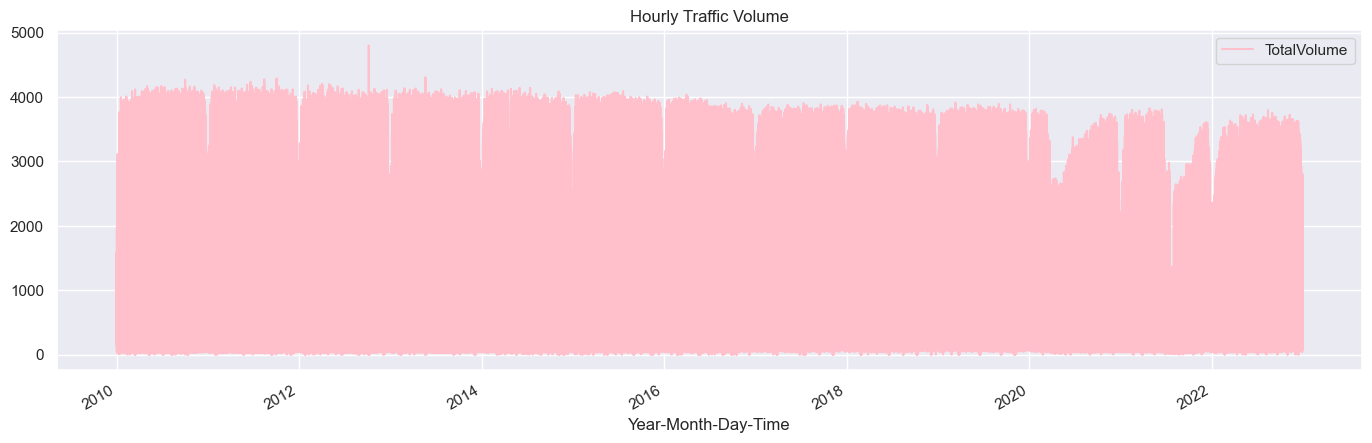

Wall time: 1.9 s


In [131]:
%%time
#Plot hourly traffic volume line graph for the given dataset
df_dtregressor_4.plot(style='-', figsize=(15,5), color='pink', title='Hourly Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [132]:
%%time
#Split train and test dataset for as a time series
training_df = df_dtregressor_4.loc[df_dtregressor_4.index < '01-01-2019']
testing_df = df_dtregressor_4.loc[ (df_dtregressor_4.index >= '01-01-2019') ]

Wall time: 16 ms


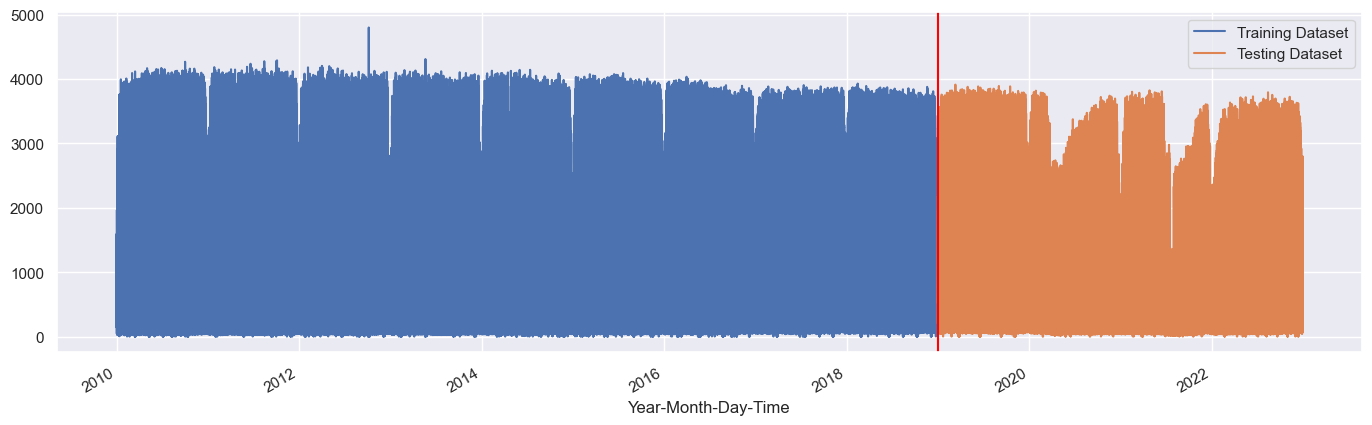

Wall time: 946 ms


In [133]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2019', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [134]:
%%time
#Below is the feature creation created as a function
def dt_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [135]:
%%time
#Diplay features
df = dt_feature_creation(df_dtregressor_4)
df

Wall time: 66.9 ms


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2010-01-01 00:00:00          323     0                4        1      1  2010   
2010-01-01 01:00:00          559     1                4        1      1  2010   
2010-01-01 02:00:00          327     2                4        1      1  2010   
2010-01-01 03:00:00          210     3                4        1      1  2010   
2010-01-01 04:00:00          144     4                4        1      1  2010   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00         1168    19                5        4     12  2022   
2022-12-31 20:00:00          911    20                5        4     12  2022   
2022-12-31 21:00:00          769    21                5        4     12  2022   
2022-12-31 22:00:00         1021    22                5        4     12  2022   
2022-12-31 23:00:00          816    23                5        4     12  2022   

                     Day of the year  
Year-Month-Day-Time                   
2010-01-01 00:00:00                1  
2010-01-01 01:00:00                1  
2010-01-01 02:00:00                1  
2010-01-01 03:00:00                1  
2010-01-01 04:00:00                1  
...                              ...  
2022-12-31 19:00:00              365  
2022-12-31 20:00:00              365  
2022-12-31 21:00:00              365  
2022-12-31 22:00:00              365  
2022-12-31 23:00:00              365  

[113828 rows x 7 columns]

In [136]:
%%time
#Adding features to train and test dataset
training_df = dt_feature_creation(training_df)
testing_df = dt_feature_creation(testing_df)
COLUMN_FEATURES = ['Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
COLUMN_TARGET = ['TotalVolume']

Wall time: 72.8 ms


In [137]:
%%time
X_train = training_df[COLUMN_FEATURES]
y_train = training_df[COLUMN_TARGET]

X_test = testing_df[COLUMN_FEATURES]
y_test = testing_df[COLUMN_TARGET]

Wall time: 22.9 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [138]:
%%time
#Create the model
#dtRegressor = DecisionTreeRegressor(max_depth=48, min_samples_leaf=0.1)
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train
       )

Wall time: 324 ms


DecisionTreeRegressor()

<font color='green'><center><h2><u>Predict test dataset</u></h2></center></font>

In [139]:
%%time
testing_df['PredictedVolume'] = dtRegressor.predict(X_test)

Wall time: 13 ms


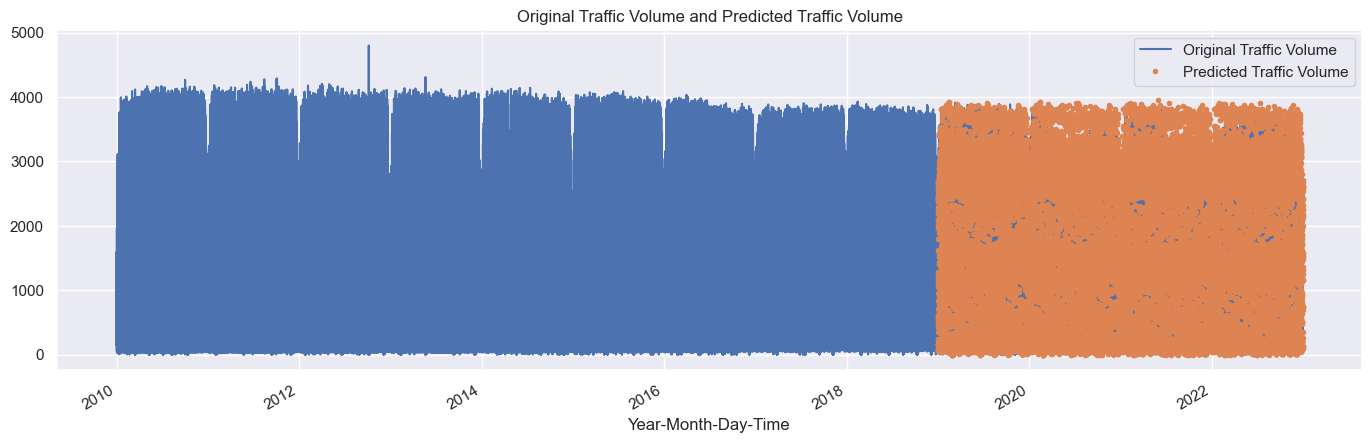

Wall time: 1.5 s


In [140]:
%%time
df = df.merge(testing_df['PredictedVolume'], how='left', left_index = True, right_index = True)
ax = df['TotalVolume'].plot(figsize=(15,5))
df['PredictedVolume'].plot(ax=ax, style='.')
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
ax.set_title('Original Traffic Volume and Predicted Traffic Volume')
plt.show()

In [141]:
%%time
#Display test data with predicted traffic volume
testing_df

Wall time: 0 ns


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2019-01-01 00:00:00          515     0                1        1      1  2019   
2019-01-01 01:00:00          754     1                1        1      1  2019   
2019-01-01 02:00:00          535     2                1        1      1  2019   
2019-01-01 03:00:00          335     3                1        1      1  2019   
2019-01-01 04:00:00          200     4                1        1      1  2019   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00         1168    19                5        4     12  2022   
2022-12-31 20:00:00          911    20                5        4     12  2022   
2022-12-31 21:00:00          769    21                5        4     12  2022   
2022-12-31 22:00:00         1021    22                5        4     12  2022   
2022-12-31 23:00:00          816    23                5        4     12  2022   

                     Day of the year  PredictedVolume  
Year-Month-Day-Time                                    
2019-01-01 00:00:00                1            491.0  
2019-01-01 01:00:00                1            595.0  
2019-01-01 02:00:00                1            451.0  
2019-01-01 03:00:00                1            226.0  
2019-01-01 04:00:00                1            206.0  
...                              ...              ...  
2022-12-31 19:00:00              365           1166.0  
2022-12-31 20:00:00              365           1363.0  
2022-12-31 21:00:00              365            693.0  
2022-12-31 22:00:00              365           1579.0  
2022-12-31 23:00:00              365            736.0  

[35040 rows x 8 columns]

<font color='green'><center><h2><u>Plot Predicted Next Hour Traffic Volume of test dataset</u></h2></center></font>

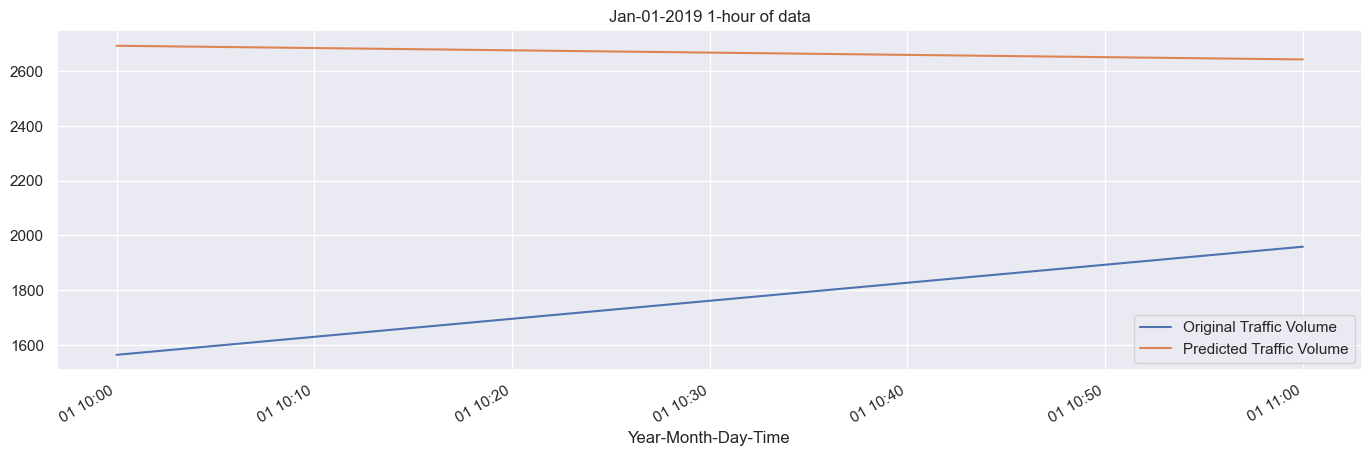

Wall time: 264 ms


In [142]:
%%time
#Hourly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan-01-2019 1-hour of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next one week Traffic Volume of test dataset for understanding</u></h2></center></font>

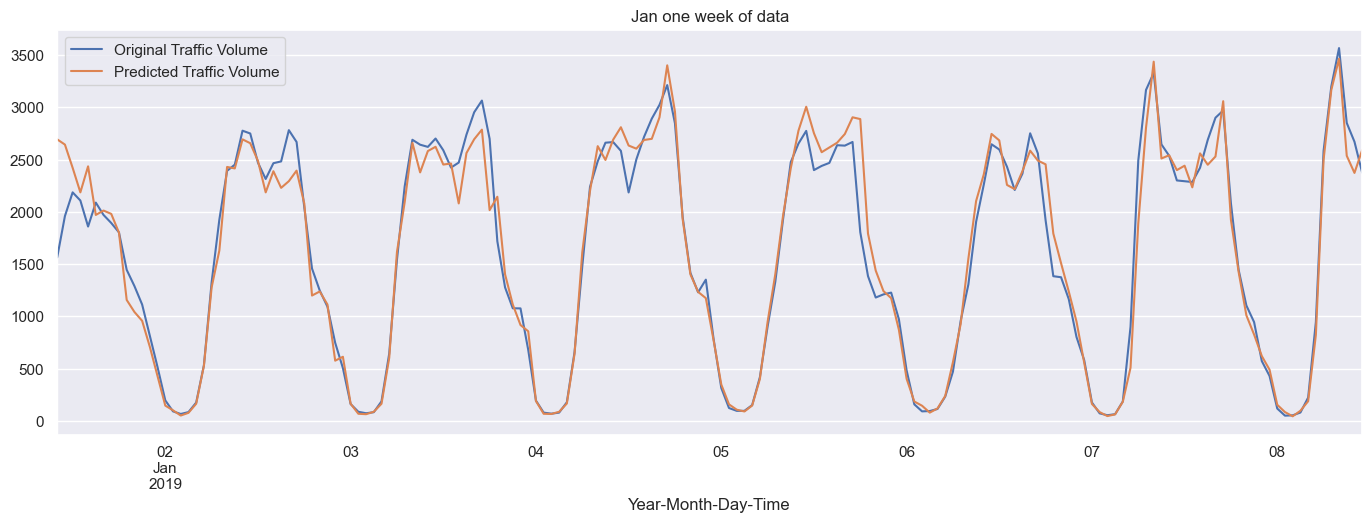

Wall time: 248 ms


In [143]:
%%time
#Weekly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan one week of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [144]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 338.34
Wall time: 2.99 ms


<font color='blue'><center><h2>Model 4: XGBoostRegressor - Part 1</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [65]:
%%time
#Importing Libraries Required
import xgboost as xgb
from sklearn.metrics import mean_squared_error
colour_palette = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import TimeSeriesSplit

Wall time: 676 ms


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [66]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as AB
df_xgboost = df_inp_data.copy()
df_xgboost['Date'] = pd.to_datetime(df_xgboost['Date'])
df_xgboost['Year-Month-Day-Time'] = df_xgboost['Date'].dt.strftime('%Y-%m-%d') + " " + df_xgboost['IntervalStart'].str.slice(0, 2) + ":00"
df_xgboost_1 = df_xgboost[df_xgboost['TollPointID'] == "AB"]

Wall time: 17.6 s


In [67]:
%%time
#Creating a dataframe with hour and its total volume
df_xgboost_2 = df_xgboost_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_xgboost_3 = df_xgboost_2.to_frame()
df_xgboost_3.to_csv('boost.csv')
df_xgboost_4 = pd.read_csv("C:/Users/USER/Documents/Toll/boost.csv")

Wall time: 579 ms


In [68]:
%%time
#Display the dataframe with hour and its total volume
df_xgboost_4

Wall time: 0 ns


Year-Month-Day-Time  TotalVolume
0         2010-01-01 00:00          323
1         2010-01-01 01:00          559
2         2010-01-01 02:00          327
3         2010-01-01 03:00          210
4         2010-01-01 04:00          144
...                    ...          ...
113823    2022-12-31 19:00         1168
113824    2022-12-31 20:00          911
113825    2022-12-31 21:00          769
113826    2022-12-31 22:00         1021
113827    2022-12-31 23:00          816

[113828 rows x 2 columns]

In [69]:
%%time
#Convert the column: Year-Month-Day-Time into datetime data type
df_xgboost_4['Year-Month-Day-Time'] = pd.to_datetime(df_xgboost_4['Year-Month-Day-Time'])

Wall time: 73.4 ms


In [70]:
%%time
#Display the dataframe with hour and its total volume
df_xgboost_4

Wall time: 0 ns


Year-Month-Day-Time  TotalVolume
0      2010-01-01 00:00:00          323
1      2010-01-01 01:00:00          559
2      2010-01-01 02:00:00          327
3      2010-01-01 03:00:00          210
4      2010-01-01 04:00:00          144
...                    ...          ...
113823 2022-12-31 19:00:00         1168
113824 2022-12-31 20:00:00          911
113825 2022-12-31 21:00:00          769
113826 2022-12-31 22:00:00         1021
113827 2022-12-31 23:00:00          816

[113828 rows x 2 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

Wall time: 4.27 s


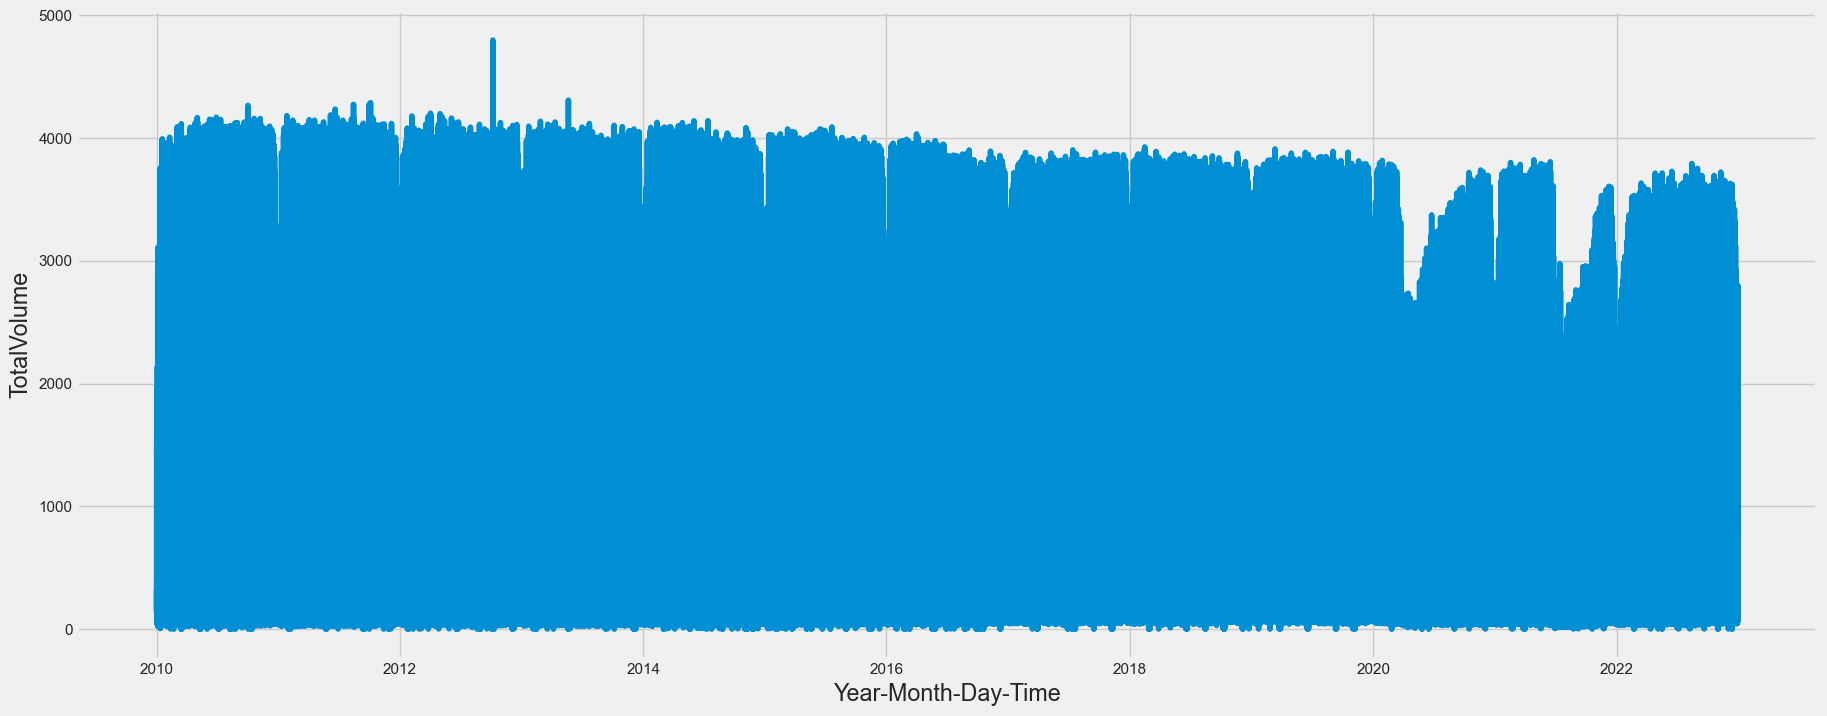

In [71]:
%%time
#Plot hourly traffic volume line graph for the given dataset
sns.lineplot(x=df_xgboost_4["Year-Month-Day-Time"], y=df_xgboost_4["TotalVolume"], data=df_xgboost_4)
sns.set(rc={'figure.figsize':(20,8)})

In [72]:
%%time
#Index the column: Year-Month-Day-Time
df_xgboost_4 = df_xgboost_4.set_index("Year-Month-Day-Time")

Wall time: 998 µs


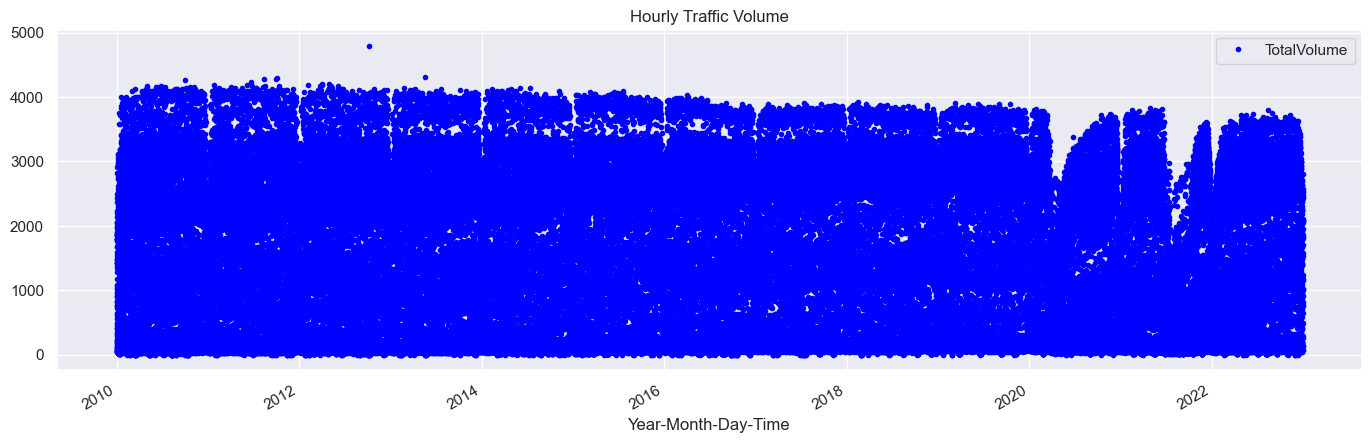

Wall time: 1.15 s


In [73]:
%%time
df_xgboost_4.plot(style='.', figsize=(15,5), color='blue', title='Hourly Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [74]:
%%time
#Split train and test dataset for as a time series
training_df = df_xgboost_4.loc[df_xgboost_4.index < '01-01-2019']
testing_df = df_xgboost_4.loc[df_xgboost_4.index >= '01-01-2019']

Wall time: 5.88 ms


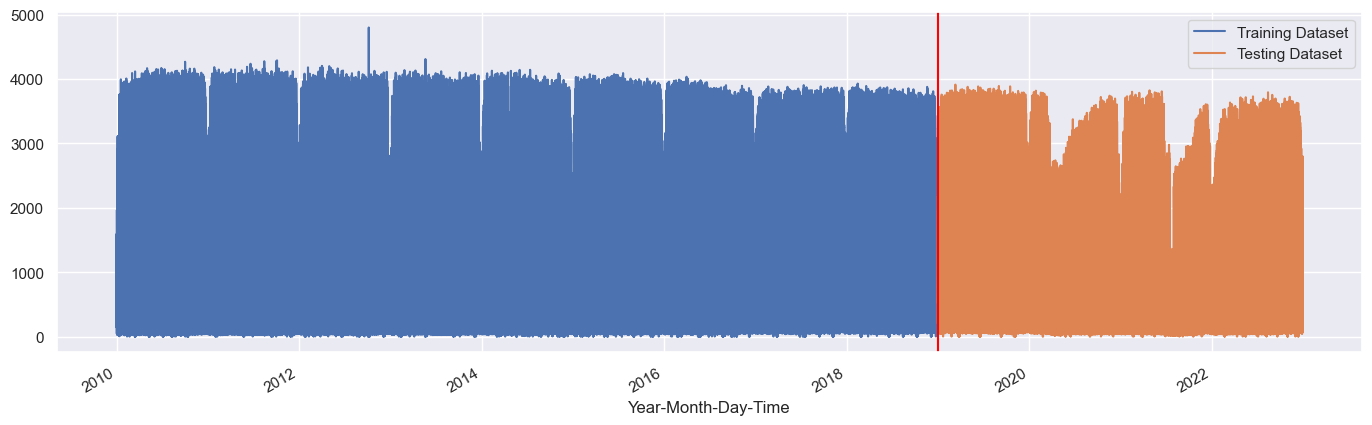

Wall time: 1.87 s


In [75]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2019', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [76]:
%%time
#Below is the feature creation created as a function
def feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [77]:
%%time
#Diplay features
df = feature_creation(df_xgboost_4)
df

Wall time: 74.8 ms


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2010-01-01 00:00:00          323     0                4        1      1  2010   
2010-01-01 01:00:00          559     1                4        1      1  2010   
2010-01-01 02:00:00          327     2                4        1      1  2010   
2010-01-01 03:00:00          210     3                4        1      1  2010   
2010-01-01 04:00:00          144     4                4        1      1  2010   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00         1168    19                5        4     12  2022   
2022-12-31 20:00:00          911    20                5        4     12  2022   
2022-12-31 21:00:00          769    21                5        4     12  2022   
2022-12-31 22:00:00         1021    22                5        4     12  2022   
2022-12-31 23:00:00          816    23                5        4     12  2022   

                     Day of the year  
Year-Month-Day-Time                   
2010-01-01 00:00:00                1  
2010-01-01 01:00:00                1  
2010-01-01 02:00:00                1  
2010-01-01 03:00:00                1  
2010-01-01 04:00:00                1  
...                              ...  
2022-12-31 19:00:00              365  
2022-12-31 20:00:00              365  
2022-12-31 21:00:00              365  
2022-12-31 22:00:00              365  
2022-12-31 23:00:00              365  

[113828 rows x 7 columns]

Wall time: 256 ms


Text(0.5, 1.0, 'Hourly Traffic Volume')

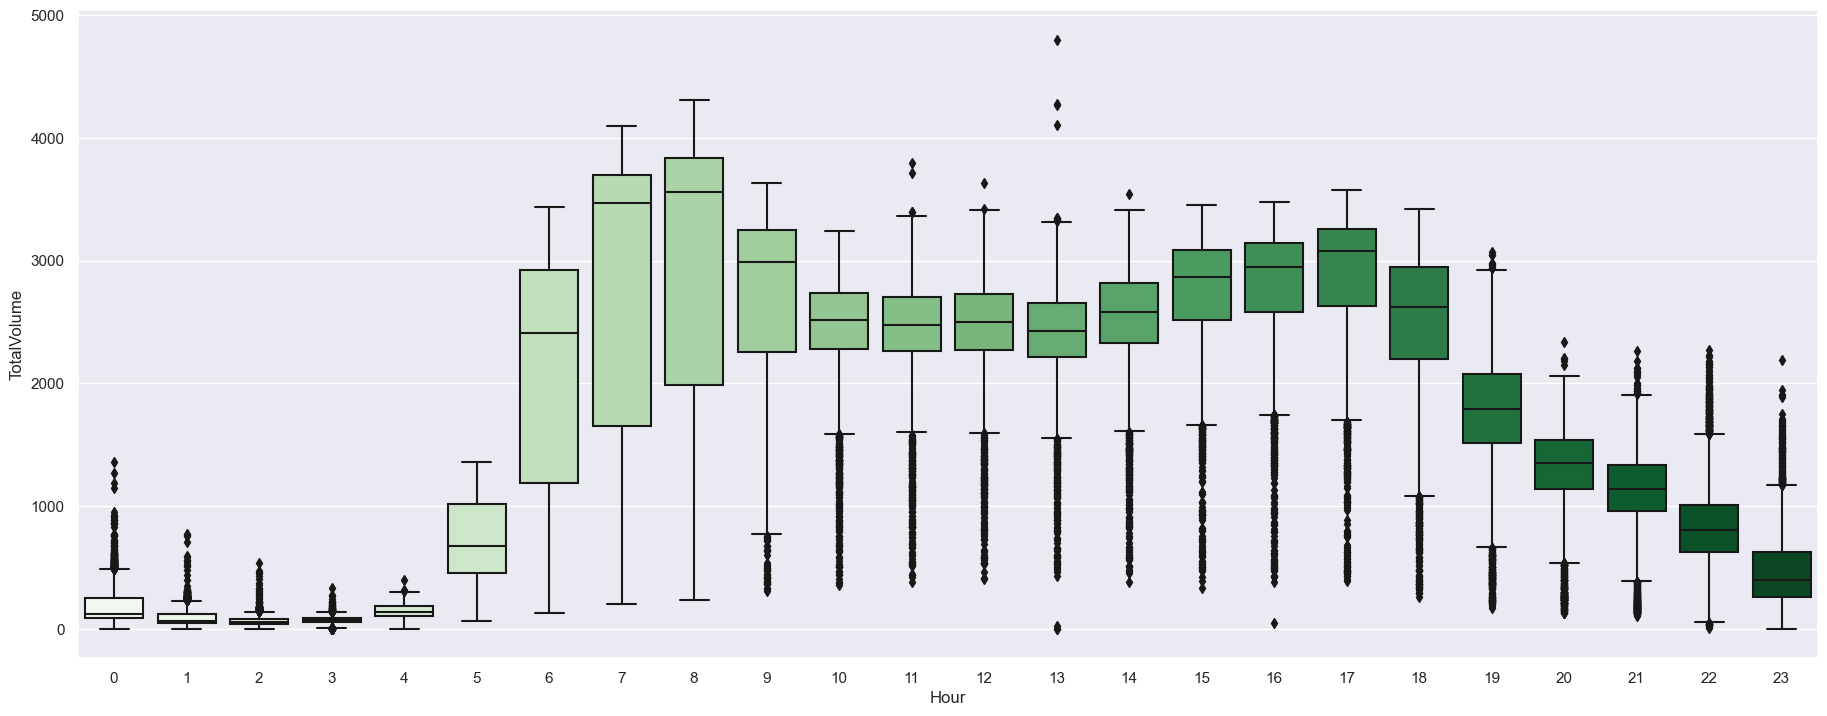

In [78]:
%%time
# Visualize hourly feature to target relationship
sns.boxplot(data=df, x='Hour', y='TotalVolume', palette='Greens')
ax.set_title('Hourly Traffic Volume')

<h2>Summary from hourly feature to target relationship:
<h3>
1. Peak hours in day-time: 6.00am - 10.00am and 3.00pm - 6.00pm<br>
2. Off-Peak hours in day-time: 10.00am - 3.00pm

Wall time: 138 ms


Text(0.5, 1.0, 'Monthly Traffic Volume')

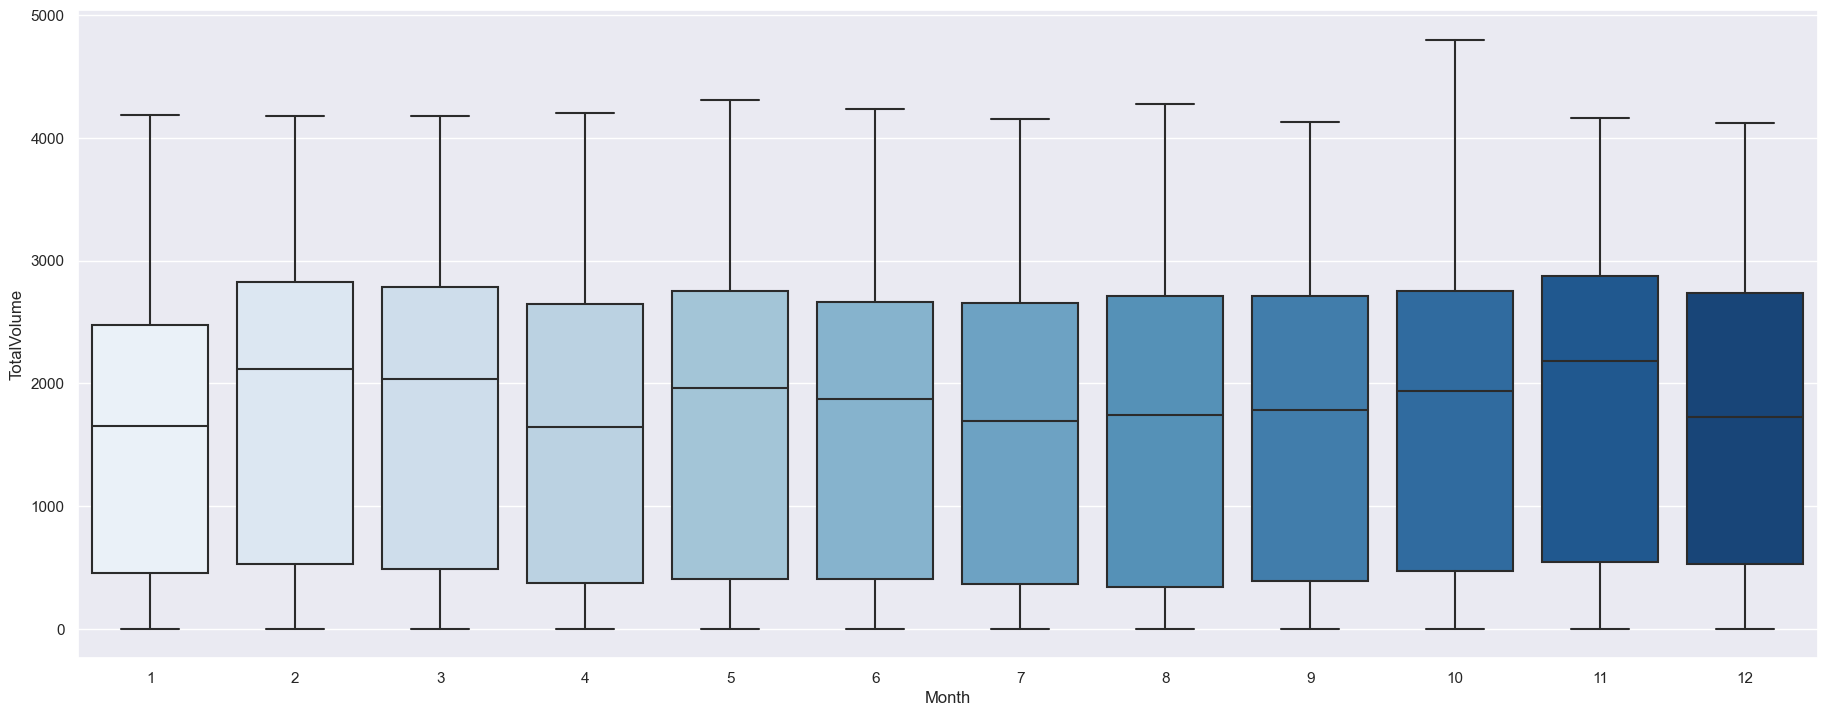

In [79]:
%%time
# Visualize monthly feature to target relationship
sns.boxplot(data=df, x='Month', y='TotalVolume', palette='Blues')
ax.set_title('Monthly Traffic Volume')

<h2>Summary from monthly feature to target relationship:
<h3>
Most of the monthly traffic lies between 250 - 3000

<font color='green'><center><h2><u>Add features to dataset</u></h2></center></font>

In [80]:
%%time
#Adding features to train and test dataset
training_df = feature_creation(training_df)
testing_df = feature_creation(testing_df)
COLUMN_FEATURES = ['Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
COLUMN_TARGET = ['TotalVolume']

Wall time: 84.5 ms


<font color='green'><center><h2><u>Define feature & target columns for train & test dataset</u></h2></center></font>

In [81]:
%%time
X_train = training_df[COLUMN_FEATURES]
y_train = training_df[COLUMN_TARGET]

X_test = testing_df[COLUMN_FEATURES]
y_test = testing_df[COLUMN_TARGET]

Wall time: 11.4 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [82]:
%%time
#Create the model
regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
#regressor = xgb.XGBRegressor(n_estimators=1000)

"""
regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=2000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 """
                                 
regressor.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100
       )

[0]	validation_0-rmse:1495.86917	validation_1-rmse:1358.31973
[56]	validation_0-rmse:155.34652	validation_1-rmse:541.20287
Wall time: 1.61 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<font color='green'><center><h2><u>Visualize Feature Importance</u></h2></center></font>

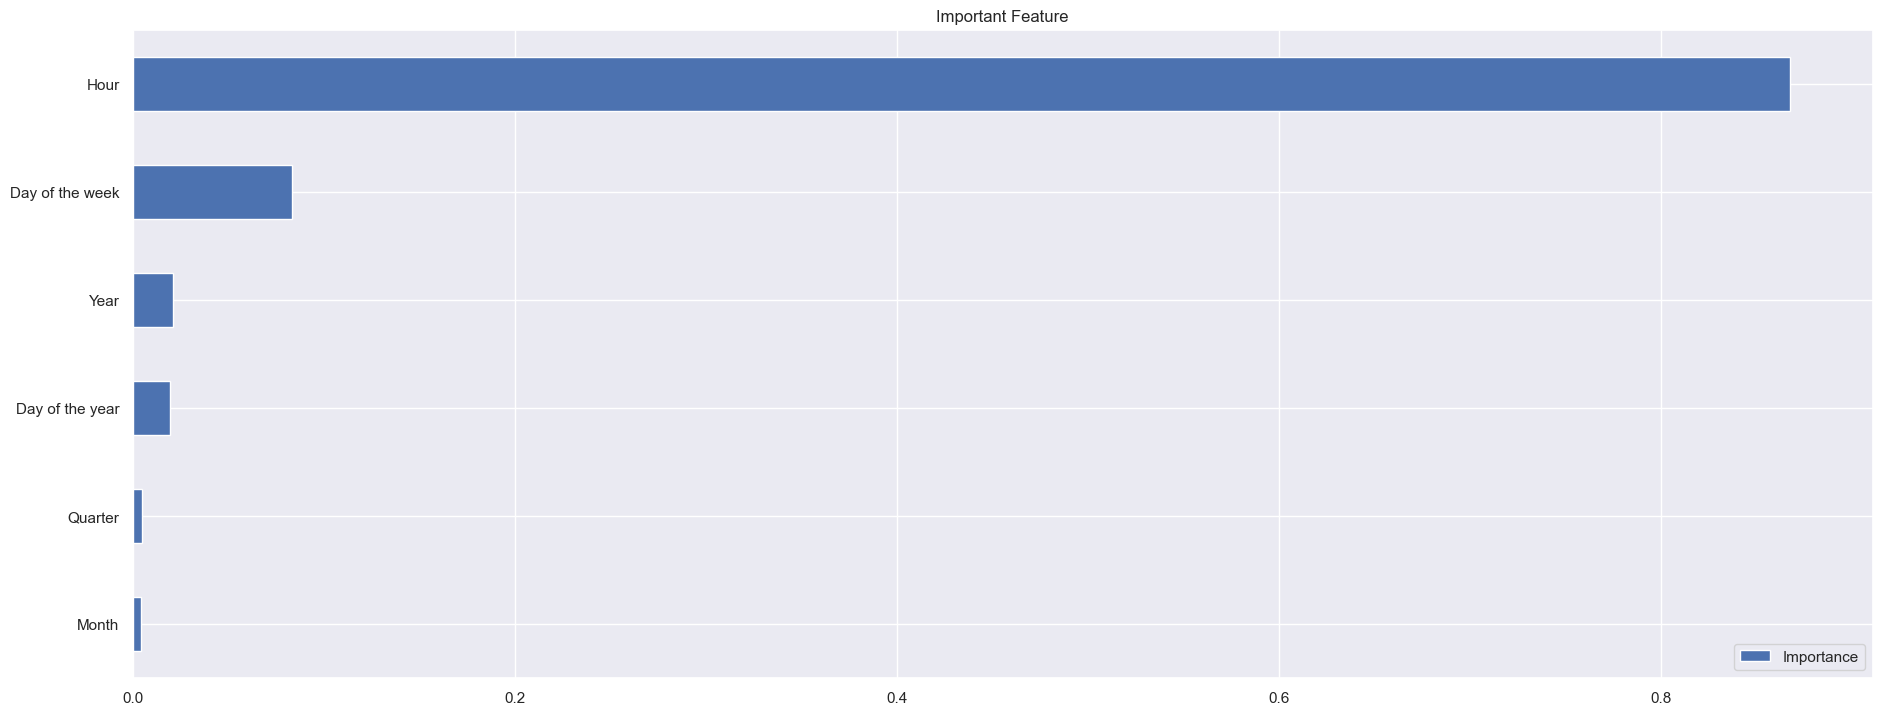

Wall time: 299 ms


In [83]:
%%time
fImportance = pd.DataFrame(data=regressor.feature_importances_,
                 index=regressor.feature_names_in_,
                 columns=['Importance'])
fImportance.sort_values('Importance').plot(kind='barh', title='Important Feature')
plt.show()

<h3>Conlusion: Hourly traffic volume has more importance than the other features

<font color='green'><center><h2><u>Predict test dataset</u></h2></center></font>

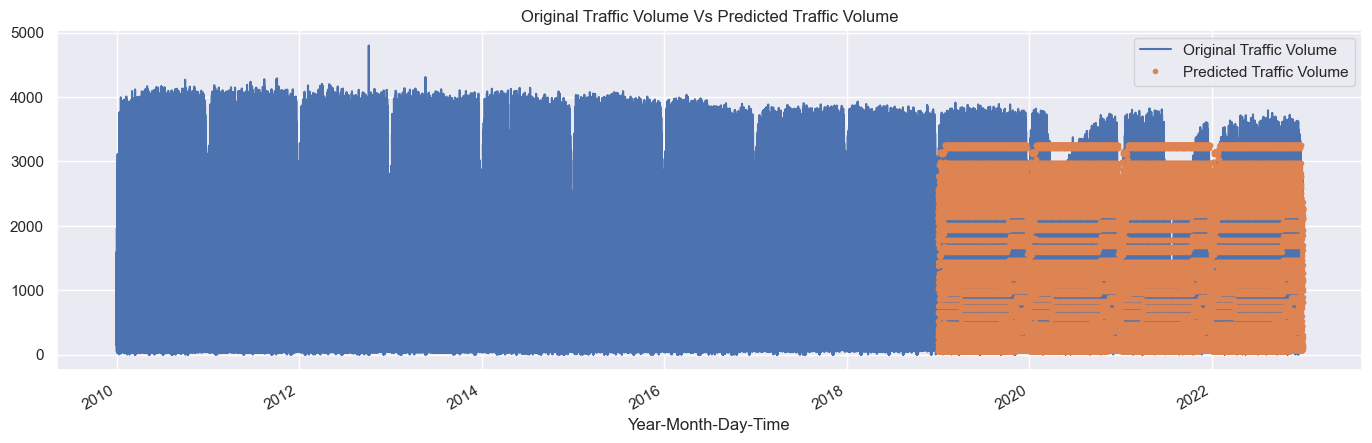

Wall time: 2.53 s


In [84]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedVolume'] = regressor.predict(X_test)
df = df.merge(testing_df['PredictedVolume'], how='left', left_index = True, right_index = True)
ax = df['TotalVolume'].plot(figsize=(15,5))
df['PredictedVolume'].plot(ax=ax, style='.')
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
ax.set_title('Original Traffic Volume Vs Predicted Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next Hour Traffic Volume of test dataset</u></h2></center></font>

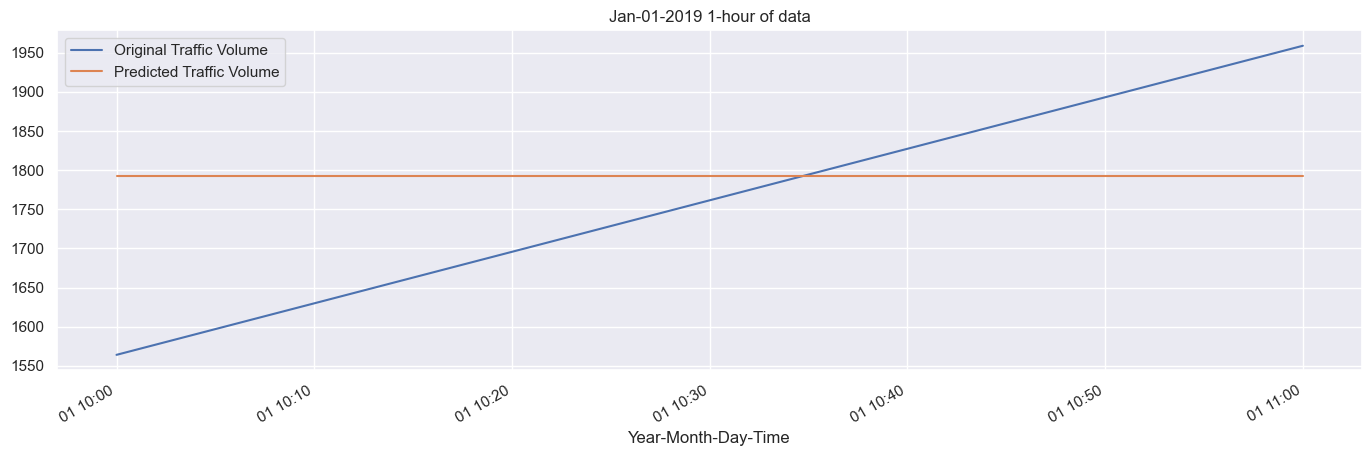

Wall time: 470 ms


In [85]:
%%time
#Hourly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan-01-2019 1-hour of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next one week Traffic Volume of test dataset for understanding</u></h2></center></font>

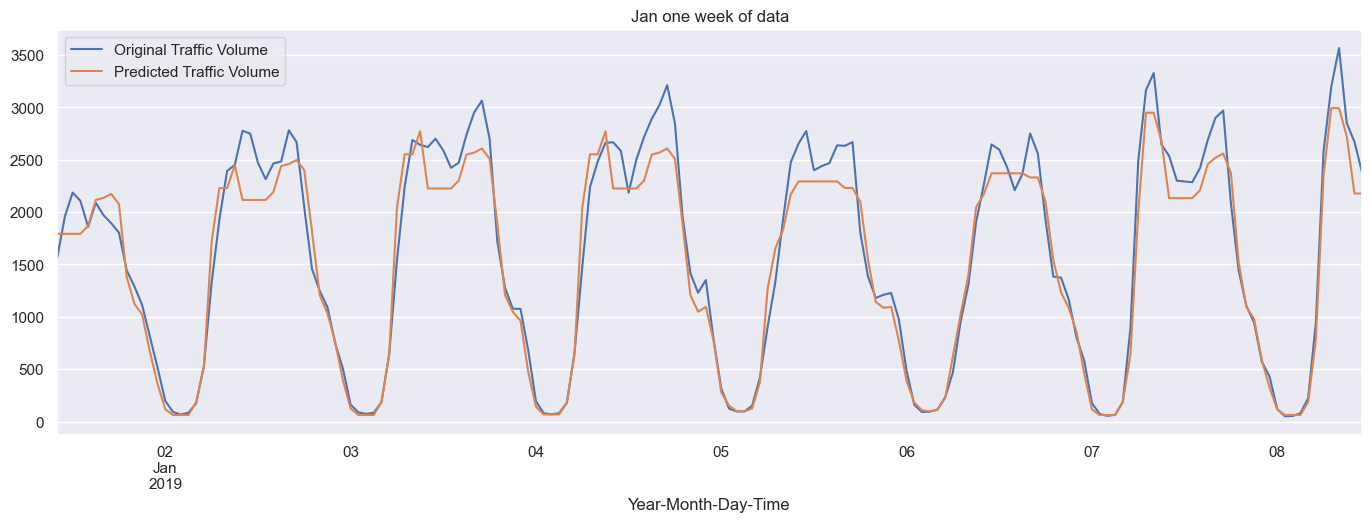

Wall time: 407 ms


In [86]:
%%time
#Weekly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan one week of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [87]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 305.44
Wall time: 1.33 ms


<font color='blue'><center><h2>Model 4: XGBoostRegressor - Part 2</h2></center></font>

<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [88]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as AB
df_xgboost_p2 = df_inp_data.copy()
df_xgboost_p2['Date'] = pd.to_datetime(df_xgboost_p2['Date'])
df_xgboost_p2['Year-Month-Day-Time'] = df_xgboost_p2['Date'].dt.strftime('%Y-%m-%d') + " " + df_xgboost_p2['IntervalStart'].str.slice(0, 2) + ":00"
df_xgboost_p2_2 = df_xgboost_p2[df_xgboost_p2['TollPointID'] == "AB"]

Wall time: 19.6 s


In [89]:
%%time
#Creating a dataframe with hour and its total volume
df_xgboost_p2_3 = df_xgboost_p2_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_xgboost_p2_4 = df_xgboost_p2_3.to_frame()
df_xgboost_p2_4.to_csv('boost_2.csv')
df_xgboost_p2_5 = pd.read_csv("C:/Users/USER/Documents/Toll/boost_2.csv")
df_xgboost_p2_5['Year-Month-Day-Time'] = pd.to_datetime(df_xgboost_p2_5['Year-Month-Day-Time'])
df_xgboost_p2_5 = df_xgboost_p2_5.set_index("Year-Month-Day-Time")

Wall time: 701 ms


<font color='green'><center><h2><u>Display Histogram</u></h2></center></font>

Wall time: 174 ms


<AxesSubplot:ylabel='Frequency'>

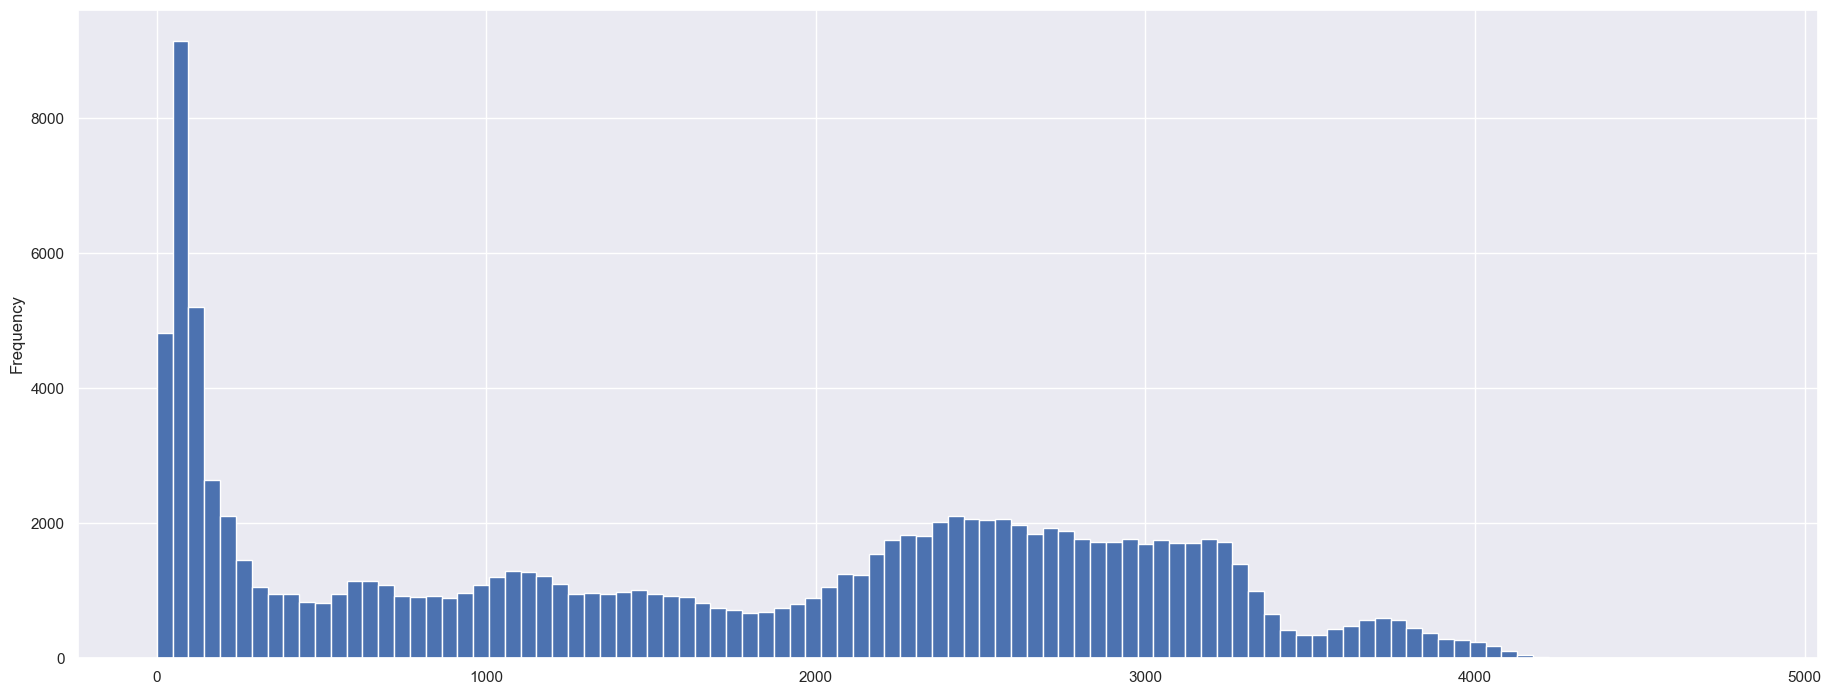

In [90]:
%%time
#Display Histogram of the Dataset
df_xgboost_p2_5['TotalVolume'].plot(kind='hist', bins=100)

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [92]:
%%time
#Below is the feature creation created as a function
def feature_creating(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    df['Day of the month'] = df.index.day
    df['Week of the year'] = df.index.isocalendar().week
    return df

Wall time: 0 ns


<font color='green'><center><h2><u>Create required lag features</u></h2></center></font>

In [94]:
%%time
#Creating Lag features like for same day last year etc.
def include_lags(df):    
    target_dict_map = df['TotalVolume'].to_dict()
    df['lag 1 year'] = (df.index - pd.Timedelta('364 days')).map(target_dict_map)
    df['lag 2 year'] = (df.index - pd.Timedelta('728 days')).map(target_dict_map)
    df['lag 3 year'] = (df.index - pd.Timedelta('1092 days')).map(target_dict_map)
    return(df)

Wall time: 0 ns


<font color='green'><center><h2><u>Training using cross validation: five fold cross validation.<br><br>Visualize 5-fold cross validation train & test dataset.</u></h2></center></font>

[0]	validation_0-rmse:1482.55687	validation_1-rmse:1567.12898
[100]	validation_0-rmse:138.89278	validation_1-rmse:167.29592
[126]	validation_0-rmse:132.99689	validation_1-rmse:167.23844
[0]	validation_0-rmse:1492.76343	validation_1-rmse:1556.40152
[100]	validation_0-rmse:138.31339	validation_1-rmse:188.42924
[176]	validation_0-rmse:124.00936	validation_1-rmse:187.81618
[0]	validation_0-rmse:1500.28023	validation_1-rmse:1173.06031
[52]	validation_0-rmse:153.85299	validation_1-rmse:619.71626
[0]	validation_0-rmse:1486.28731	validation_1-rmse:1287.44839
[56]	validation_0-rmse:156.24008	validation_1-rmse:616.46040
[0]	validation_0-rmse:1470.41562	validation_1-rmse:1622.14860
[60]	validation_0-rmse:163.40412	validation_1-rmse:811.03992
Wall time: 33.5 s


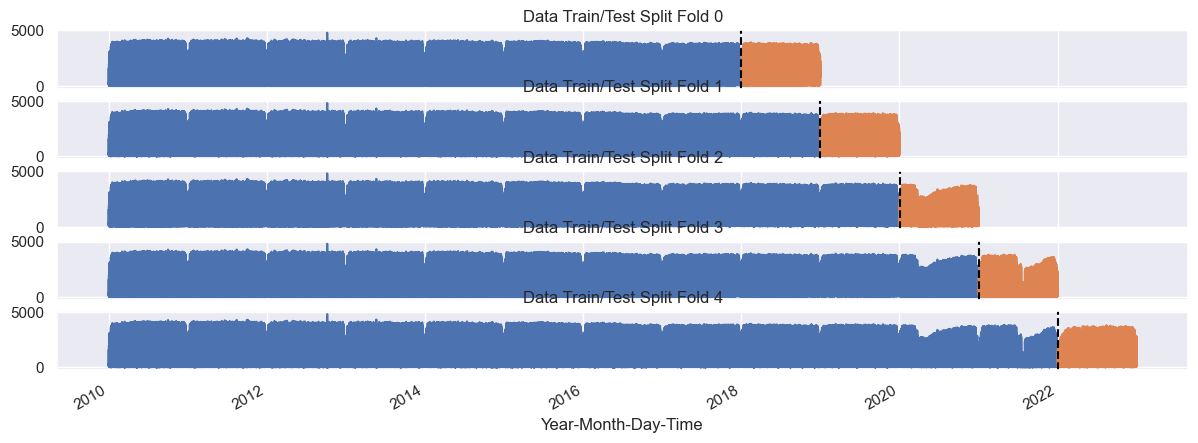

In [95]:
%%time
#Training using Cross Validation
TSsplit = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df_xgboost_p2_5.sort_index()
df = include_lags(df)

folding = 0
predicted_val = []
scores_val = []
mean_abs_err = []
fig, axs = plt.subplots(5, 1, figsize=(13, 5), sharex=True)
for training_idx, validation_idx in TSsplit.split(df):
    training = df.iloc[training_idx]
    testing = df.iloc[validation_idx]
    
    #Visualize 5-fold cross validation train & test dataset
    training['TotalVolume'].plot(ax=axs[folding], label='Training Set', title=f'Data Train/Test Split Fold {folding}')
    testing['TotalVolume'].plot(ax=axs[folding], label='Testing Set')
    axs[folding].axvline(testing.index.min(), color='black', ls='--')

    training = feature_creating(training)
    testing = feature_creating(testing)

    FEATURES = ['Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month',
                'lag 1 year','lag 2 year','lag 3 year']
    TARGET = 'TotalVolume'

    X_train = training[FEATURES]
    y_train = training[TARGET]

    X_test = testing[FEATURES]
    y_test = testing[TARGET]
    
    regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
    
    """
    regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=2000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 """
                              
    regressor.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_predicted = regressor.predict(X_test)
    predicted_val.append(y_predicted)
    score_val = np.sqrt(mean_squared_error(y_test, y_predicted))
    scores_val.append( round(score_val,2) )
    ErrVal = np.abs(y_test - y_predicted)
    mean_abs_err.append( round(ErrVal.mean(),2) )
    
    folding = folding + 1

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [96]:
%%time
print(f'Mean absolute error across folds for testing dataset: {np.mean(mean_abs_err):0.2f}')
print(f'Each fold mean absolute error for testing dataset: {mean_abs_err}')

Mean absolute error across folds for testing dataset: 289.97
Each fold mean absolute error for testing dataset: [107.36, 109.71, 310.79, 407.62, 514.35]
Wall time: 0 ns


<font color='green'><center><h2><u>Visualize Input Data Monthly Traffic Volume</u></h2></center></font>

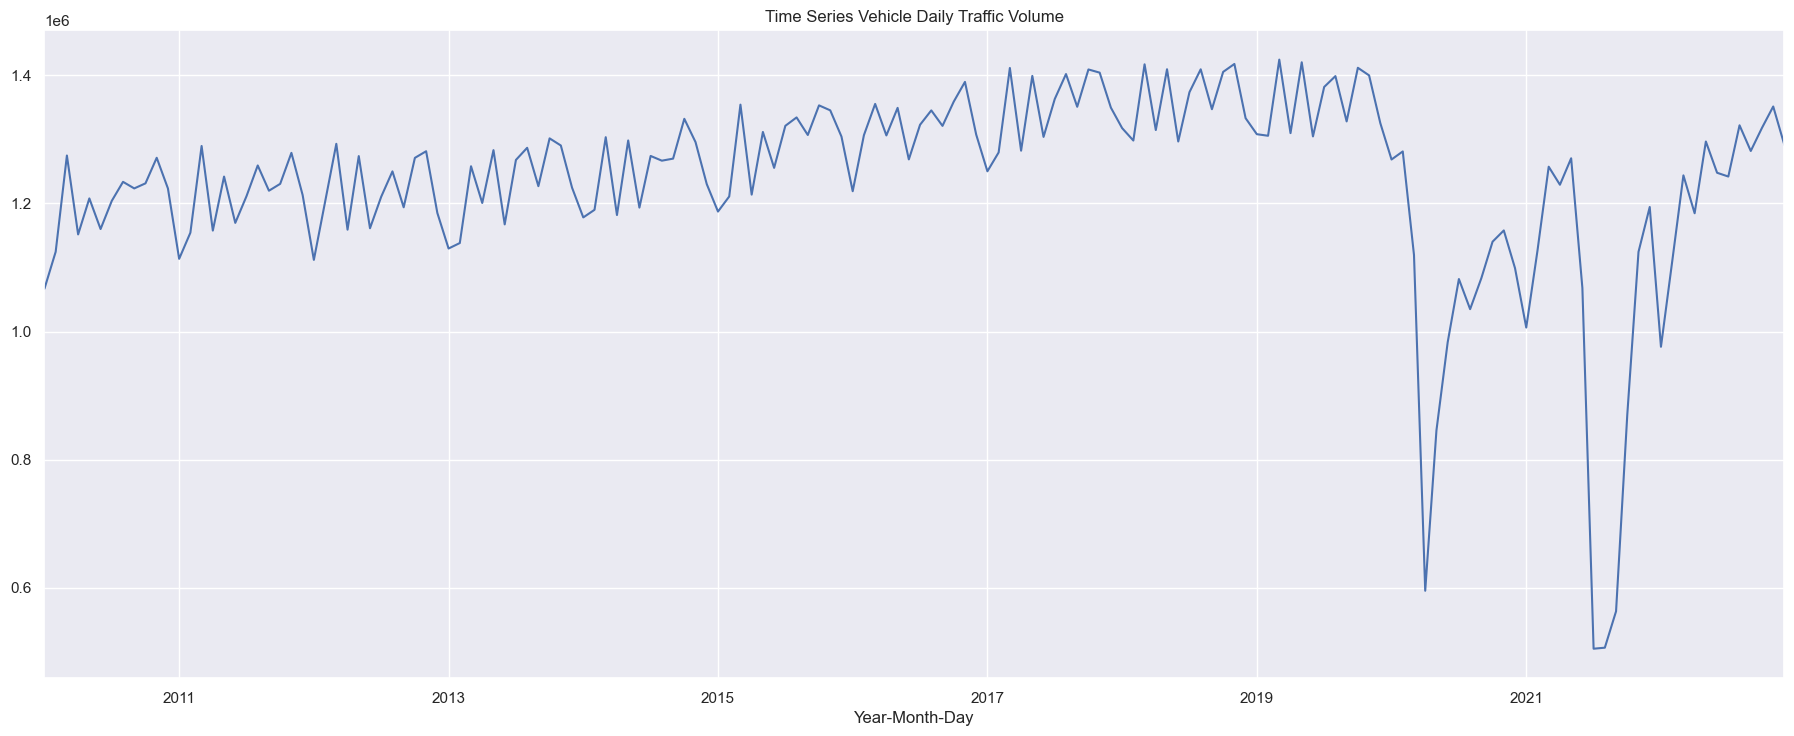

Wall time: 2.51 s


In [109]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as AB
df_monthly_vol = df_inp_data.copy()
df_monthly_vol['Year-Month-Day'] = df_monthly_vol['Date'].str.slice(0, 7) + "-01"
df_monthly_vol_1 = df_monthly_vol[df_monthly_vol['TollPointID'] == "AB"]

#Creating a dataframe with month and its total volume
df_monthly_vol_2 = df_monthly_vol_1.groupby(['Year-Month-Day'])['TotalVolume'].sum()
df_monthly_vol_3 = df_monthly_vol_2.to_frame()
df_monthly_vol_3.to_csv('monthly.csv')
df_monthly_vol_4 = pd.read_csv("C:/Users/USER/Documents/Toll/monthly.csv")

df_monthly_vol_4['Year-Month-Day'] = pd.to_datetime(df_monthly_vol_4['Year-Month-Day'])
df_monthly_vol_4 = df_monthly_vol_4.set_index("Year-Month-Day")

#Plot Monthly Traffic Volume
df_monthly_vol_4.TotalVolume.plot(figsize=(20,8), title="Time Series Vehicle Daily Traffic Volume")
plt.show()

<h2>Summary:
<h3>The mean absolute error is high in the years 2020, 2021, and 2022 due to a sharp fall in traffic volume due to COVID-19.

<font color='green'><center><h2><u>Future Traffic Volume Prediction</u></h2></center></font>

In [98]:
%%time
#Train all of the data before doing future prediction
df = feature_creating(df)

FEATURES = ['Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month', 'lag 1 year','lag 2 year','lag 3 year']
TARGET = 'TotalVolume'

X_all = df[FEATURES]
y_all = df[TARGET]

regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)

"""
regressor = xgb.XGBRegressor(base_score=0.5,
                             booster='gbtree', 
                             n_estimators=2000,
                             early_stopping_rounds=50,
                             objective='reg:linear',
                             max_depth=3,
                             learning_rate=0.01)
                             """
                   
regressor.fit(X_all, y_all,
              eval_set=[(X_all, y_all)],
              verbose=100)

[0]	validation_0-rmse:1469.38802
[100]	validation_0-rmse:150.96745
[200]	validation_0-rmse:131.61041
[300]	validation_0-rmse:119.59484
[400]	validation_0-rmse:111.05709
[500]	validation_0-rmse:103.79837
[600]	validation_0-rmse:98.26654
[700]	validation_0-rmse:92.93123
[800]	validation_0-rmse:88.31212
[900]	validation_0-rmse:84.31831
[999]	validation_0-rmse:80.94383
Wall time: 1min 7s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [99]:
%%time
#Find recent / latest data and time of the given dataset
df.index.max()

Wall time: 0 ns


Timestamp('2022-12-31 23:00:00')

In [100]:
%%time
#Create future dataframe
future = pd.date_range('2023-01-01', '2023-01-08', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
Past_and_future_df = pd.concat([df, future_df])

Wall time: 12.9 ms


In [101]:
%%time
Past_and_future_df

Wall time: 0 ns


TotalVolume  lag 1 year  lag 2 year  lag 3 year  Hour  \
2010-01-01 00:00:00        323.0         NaN         NaN         NaN   0.0   
2010-01-01 01:00:00        559.0         NaN         NaN         NaN   1.0   
2010-01-01 02:00:00        327.0         NaN         NaN         NaN   2.0   
2010-01-01 03:00:00        210.0         NaN         NaN         NaN   3.0   
2010-01-01 04:00:00        144.0         NaN         NaN         NaN   4.0   
...                          ...         ...         ...         ...   ...   
2023-01-07 20:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-07 21:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-07 22:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-07 23:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-08 00:00:00          NaN         NaN         NaN         NaN   NaN   

                     Day of the week  Quarter  Month    Year  Day of the year  \
2010-01-01 00:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 01:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 02:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 03:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 04:00:00              4.0      1.0    1.0  2010.0              1.0   
...                              ...      ...    ...     ...              ...   
2023-01-07 20:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-07 21:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-07 22:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-07 23:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-08 00:00:00              NaN      NaN    NaN     NaN              NaN   

                     Day of the month  Week of the year  isFuture  
2010-01-01 00:00:00               1.0                53     False  
2010-01-01 01:00:00               1.0                53     False  
2010-01-01 02:00:00               1.0                53     False  
2010-01-01 03:00:00               1.0                53     False  
2010-01-01 04:00:00               1.0                53     False  
...                               ...               ...       ...  
2023-01-07 20:00:00               NaN              <NA>      True  
2023-01-07 21:00:00               NaN              <NA>      True  
2023-01-07 22:00:00               NaN              <NA>      True  
2023-01-07 23:00:00               NaN              <NA>      True  
2023-01-08 00:00:00               NaN              <NA>      True  

[113997 rows x 13 columns]

In [102]:
%%time
#Pass past+future dataset to add features and lags
Past_and_future_df = feature_creating(Past_and_future_df)
Past_and_future_df = include_lags(Past_and_future_df)
Past_and_future_df

Wall time: 3.25 s


TotalVolume  lag 1 year  lag 2 year  lag 3 year  Hour  \
2010-01-01 00:00:00        323.0         NaN         NaN         NaN     0   
2010-01-01 01:00:00        559.0         NaN         NaN         NaN     1   
2010-01-01 02:00:00        327.0         NaN         NaN         NaN     2   
2010-01-01 03:00:00        210.0         NaN         NaN         NaN     3   
2010-01-01 04:00:00        144.0         NaN         NaN         NaN     4   
...                          ...         ...         ...         ...   ...   
2023-01-07 20:00:00          NaN       861.0       979.0      1087.0    20   
2023-01-07 21:00:00          NaN       686.0       865.0      1286.0    21   
2023-01-07 22:00:00          NaN       576.0       846.0      1124.0    22   
2023-01-07 23:00:00          NaN       448.0       557.0       707.0    23   
2023-01-08 00:00:00          NaN       218.0       380.0       467.0     0   

                     Day of the week  Quarter  Month  Year  Day of the year  \
2010-01-01 00:00:00                4        1      1  2010                1   
2010-01-01 01:00:00                4        1      1  2010                1   
2010-01-01 02:00:00                4        1      1  2010                1   
2010-01-01 03:00:00                4        1      1  2010                1   
2010-01-01 04:00:00                4        1      1  2010                1   
...                              ...      ...    ...   ...              ...   
2023-01-07 20:00:00                5        1      1  2023                7   
2023-01-07 21:00:00                5        1      1  2023                7   
2023-01-07 22:00:00                5        1      1  2023                7   
2023-01-07 23:00:00                5        1      1  2023                7   
2023-01-08 00:00:00                6        1      1  2023                8   

                     Day of the month  Week of the year  isFuture  
2010-01-01 00:00:00                 1                53     False  
2010-01-01 01:00:00                 1                53     False  
2010-01-01 02:00:00                 1                53     False  
2010-01-01 03:00:00                 1                53     False  
2010-01-01 04:00:00                 1                53     False  
...                               ...               ...       ...  
2023-01-07 20:00:00                 7                 1      True  
2023-01-07 21:00:00                 7                 1      True  
2023-01-07 22:00:00                 7                 1      True  
2023-01-07 23:00:00                 7                 1      True  
2023-01-08 00:00:00                 8                 1      True  

[113997 rows x 13 columns]

In [103]:
%%time
#Split and dislay only future dataset
future_with_features = Past_and_future_df.query('isFuture').copy()
future_with_features.tail()

Wall time: 12.9 ms


TotalVolume  lag 1 year  lag 2 year  lag 3 year  Hour  \
2023-01-07 20:00:00          NaN       861.0       979.0      1087.0    20   
2023-01-07 21:00:00          NaN       686.0       865.0      1286.0    21   
2023-01-07 22:00:00          NaN       576.0       846.0      1124.0    22   
2023-01-07 23:00:00          NaN       448.0       557.0       707.0    23   
2023-01-08 00:00:00          NaN       218.0       380.0       467.0     0   

                     Day of the week  Quarter  Month  Year  Day of the year  \
2023-01-07 20:00:00                5        1      1  2023                7   
2023-01-07 21:00:00                5        1      1  2023                7   
2023-01-07 22:00:00                5        1      1  2023                7   
2023-01-07 23:00:00                5        1      1  2023                7   
2023-01-08 00:00:00                6        1      1  2023                8   

                     Day of the month  Week of the year  isFuture  
2023-01-07 20:00:00                 7                 1      True  
2023-01-07 21:00:00                 7                 1      True  
2023-01-07 22:00:00                 7                 1      True  
2023-01-07 23:00:00                 7                 1      True  
2023-01-08 00:00:00                 8                 1      True

In [104]:
%%time
#Predict the future
future_with_features['PredictedVolume'] = regressor.predict(future_with_features[FEATURES])

Wall time: 6.25 ms


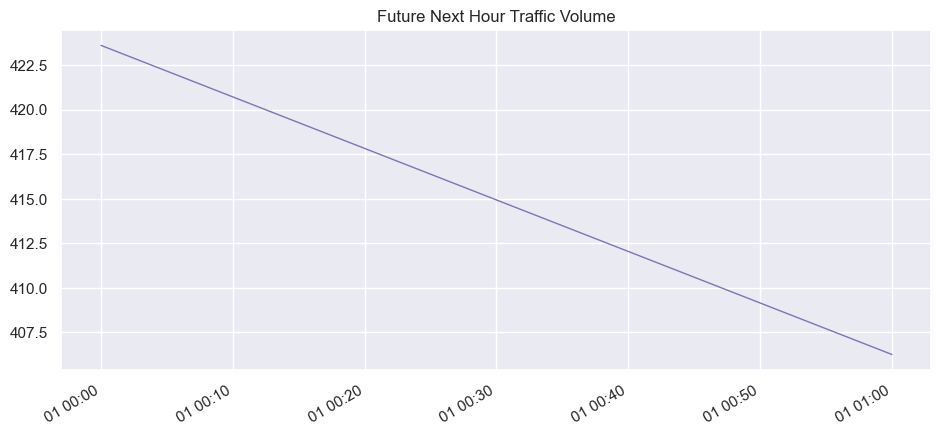

Wall time: 364 ms


In [105]:
%%time
#Plot the future: Next Hour
future_with_features['PredictedVolume'].iloc[0:2].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Hour Traffic Volume')
plt.show()

Next Hour Traffic Volume:
Wall time: 77.2 ms


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='TotalVolume'>

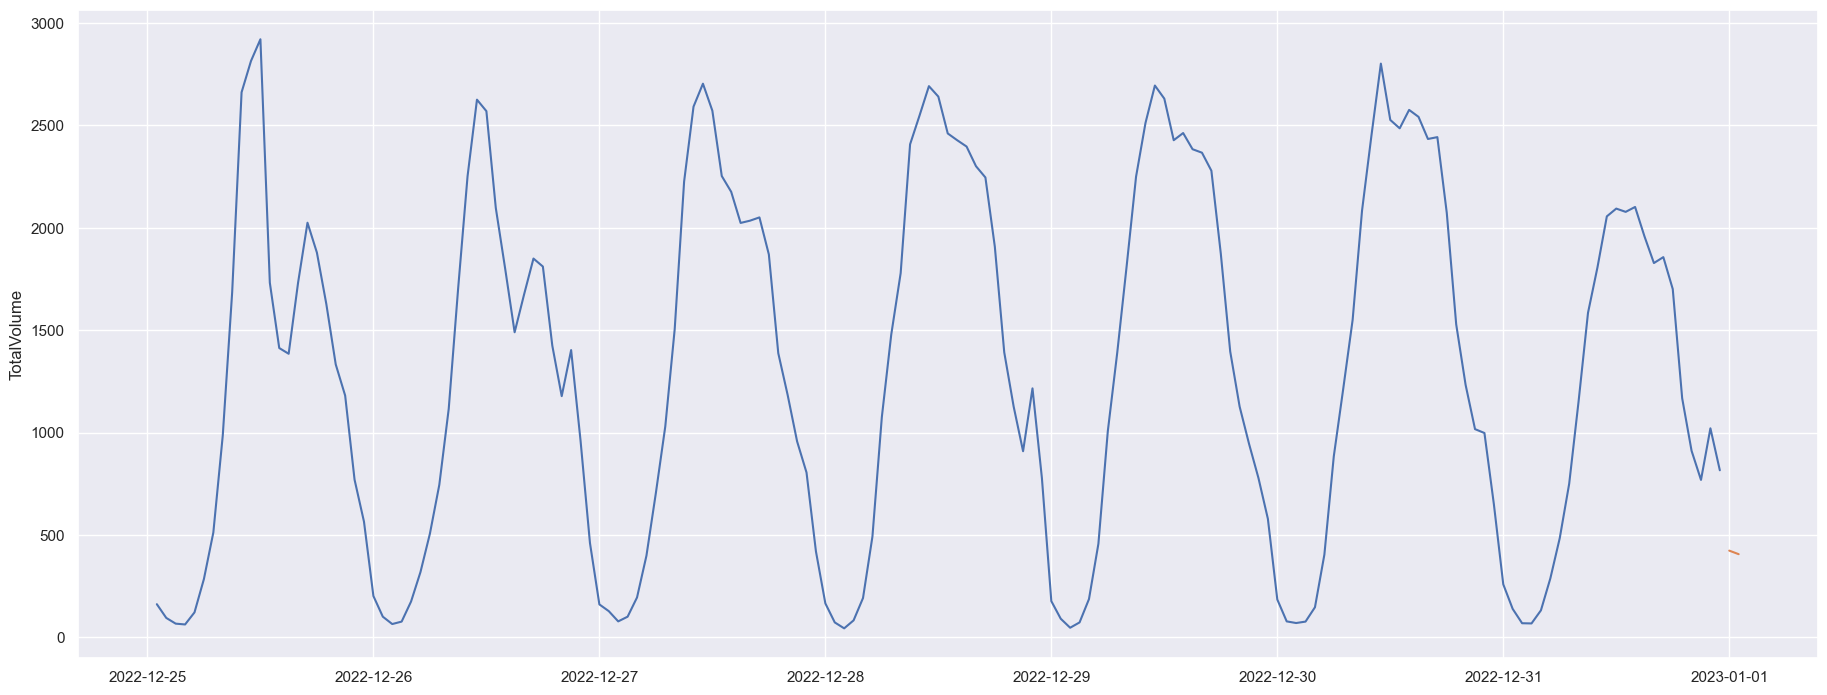

In [106]:
%%time
print("Next Hour Traffic Volume:")
plot1 = Past_and_future_df.loc[Past_and_future_df.index > '12-25-2022']
plot2 = future_with_features['PredictedVolume'].iloc[0:2]
sns.lineplot(plot1.index, plot1['TotalVolume'])
sns.lineplot(plot2.index, plot2)

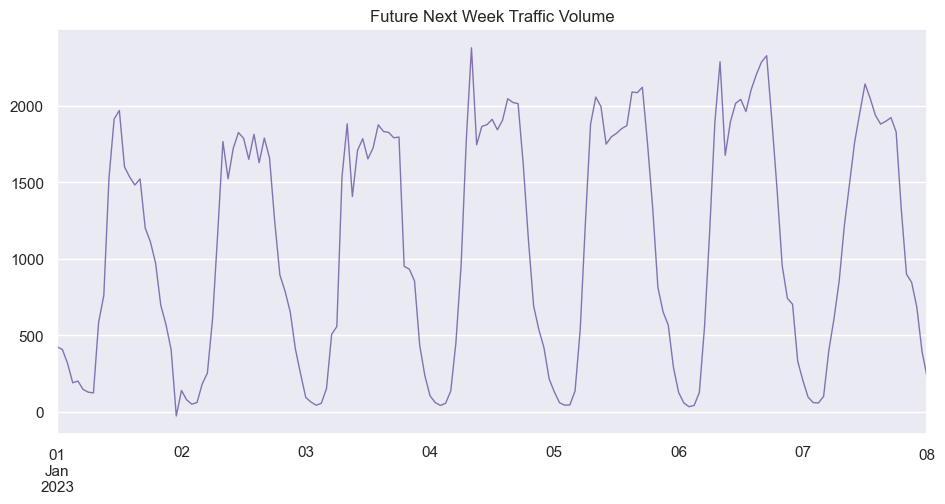

Wall time: 214 ms


In [107]:
%%time
#Plot the future: Next Week
future_with_features['PredictedVolume'].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Week Traffic Volume')
plt.show()

Next Week Traffic Volume:
Wall time: 75.2 ms


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='TotalVolume'>

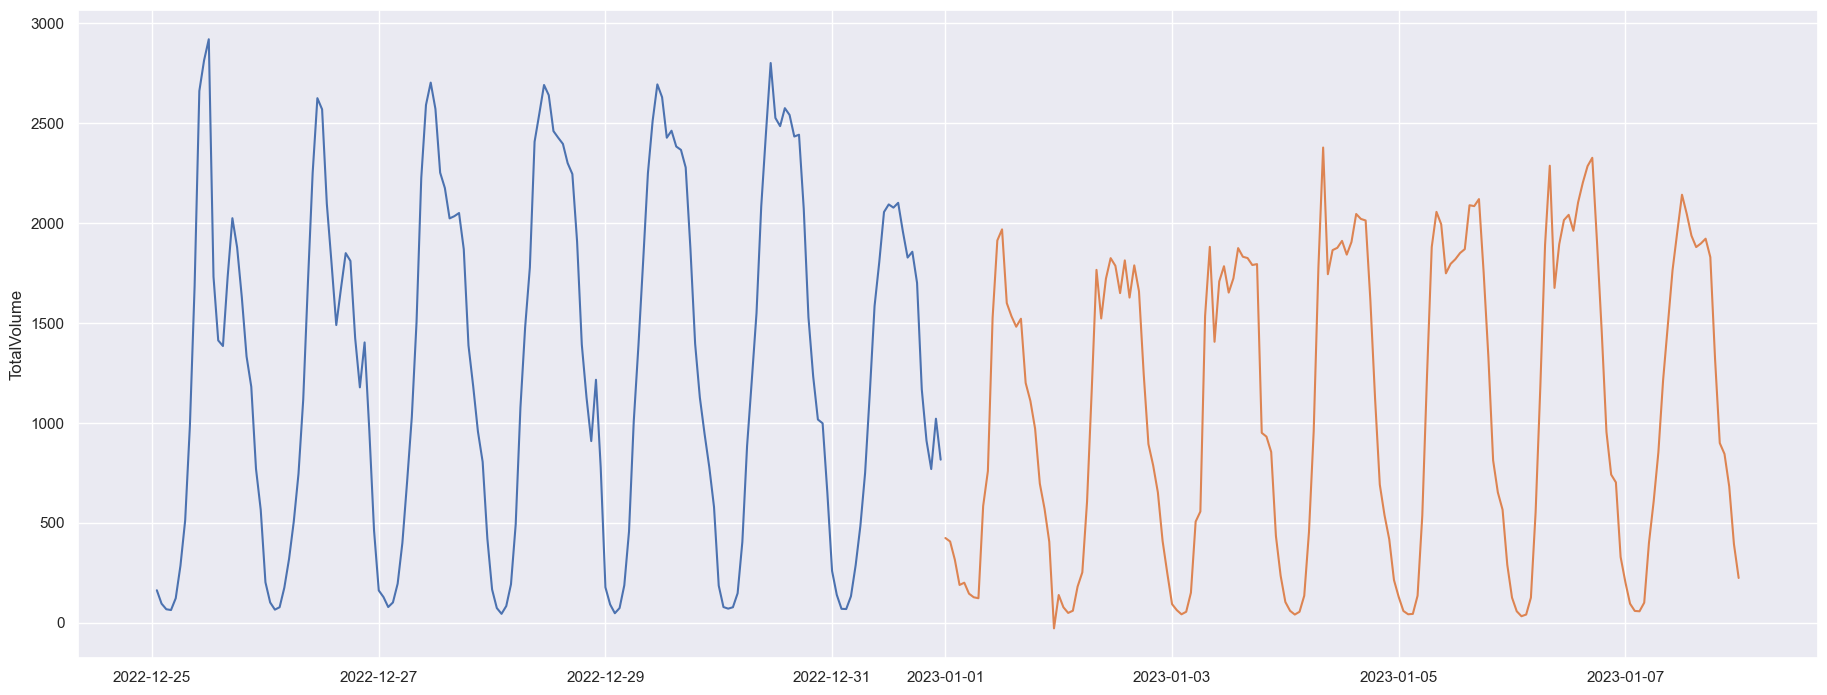

In [108]:
%%time
print("Next Week Traffic Volume:")
plot1 = Past_and_future_df.loc[Past_and_future_df.index > '12-25-2022']
plot2 = future_with_features['PredictedVolume']
sns.lineplot(plot1.index, plot1['TotalVolume'])
sns.lineplot(plot2.index, plot2)

<font color='blue'><center><h2>Model 5: RandomForestRegressor</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [145]:
%%time
#Import Libraries
from sklearn.ensemble import RandomForestRegressor

Wall time: 51.4 ms


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [146]:
%%time
#Input traffic data set
#Filter and store the dataset having TollPointID as AB
df_RMregressor = df_inp_data.copy()
df_RMregressor['Date'] = pd.to_datetime(df_RMregressor['Date'])
df_RMregressor['Year-Month-Day-Time'] = df_RMregressor['Date'].dt.strftime('%Y-%m-%d') + " " + df_RMregressor['IntervalStart'].str.slice(0, 2) + ":00"
df_RMregressor_1 = df_RMregressor[df_RMregressor['TollPointID'] == "AB"]

Wall time: 17.9 s


In [147]:
%%time
#Creating a dataframe with hour and its total volume
df_RMregressor_2 = df_RMregressor_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_RMregressor_3 = df_RMregressor_2.to_frame()
df_RMregressor_3.to_csv('rm.csv')
df_RMregressor_4 = pd.read_csv("C:/Users/USER/Documents/Toll/rm.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_RMregressor_4['Year-Month-Day-Time'] = pd.to_datetime(df_RMregressor_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_RMregressor_4 = df_RMregressor_4.set_index("Year-Month-Day-Time")

Wall time: 686 ms


In [148]:
#Display the dataframe with hour and its total volume
df_RMregressor_4

TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00          323
2010-01-01 01:00:00          559
2010-01-01 02:00:00          327
2010-01-01 03:00:00          210
2010-01-01 04:00:00          144
...                          ...
2022-12-31 19:00:00         1168
2022-12-31 20:00:00          911
2022-12-31 21:00:00          769
2022-12-31 22:00:00         1021
2022-12-31 23:00:00          816

[113828 rows x 1 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

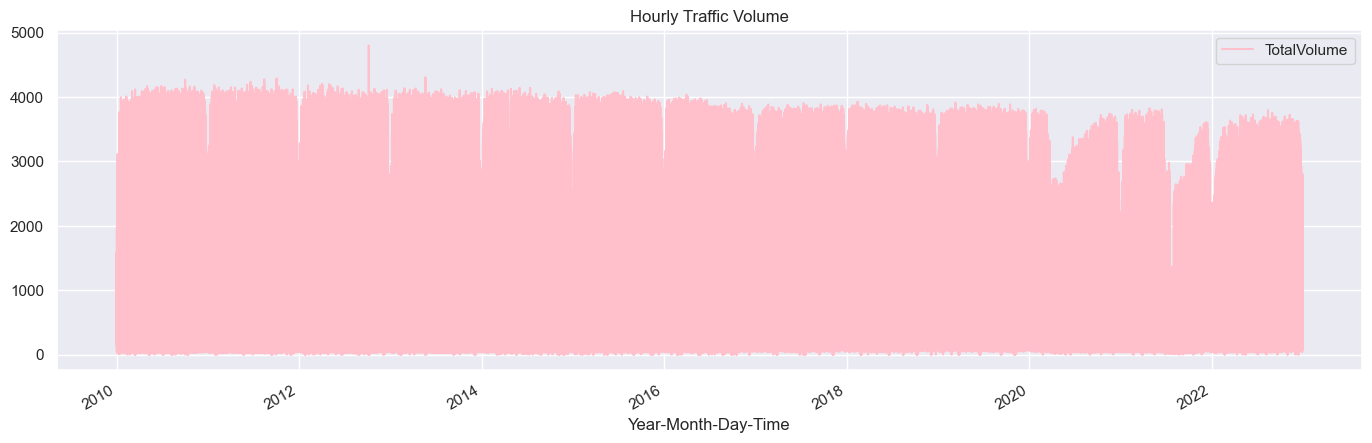

Wall time: 1.52 s


In [149]:
%%time
#Plot hourly traffic volume line graph for the given dataset
df_RMregressor_4.plot(style='-', figsize=(15,5), color='pink', title='Hourly Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [150]:
%%time
#Split train and test dataset for as a time series
training_df = df_RMregressor_4.loc[df_dtregressor_4.index < '01-01-2019']
testing_df = df_RMregressor_4.loc[ (df_dtregressor_4.index >= '01-01-2019') ]

Wall time: 6.8 ms


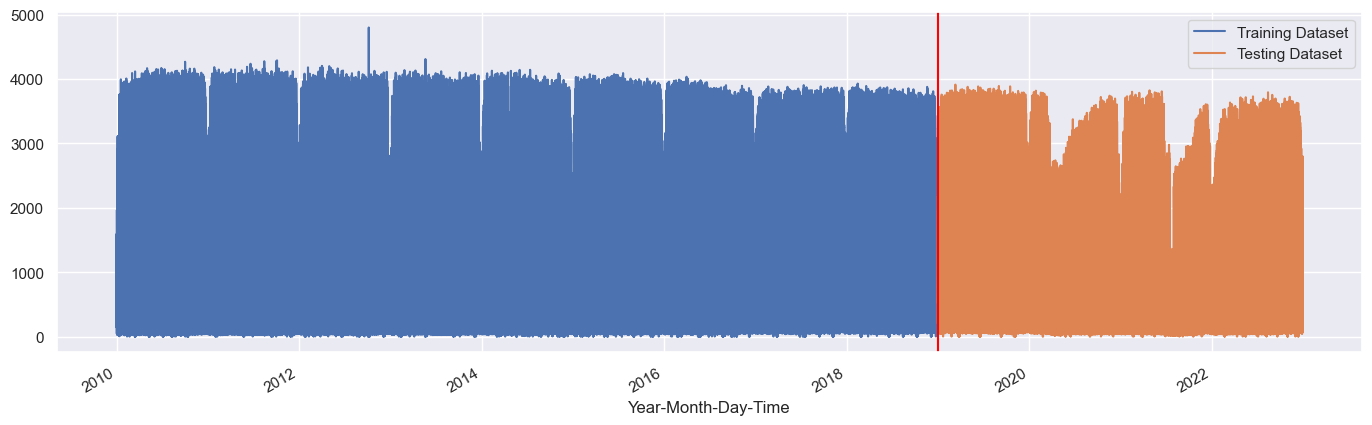

Wall time: 1.96 s


In [151]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2019', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [152]:
%%time
#Below is the feature creation created as a function
def rm_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [153]:
%%time
#Diplay features
df = rm_feature_creation(df_RMregressor_4)
df

Wall time: 79.4 ms


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2010-01-01 00:00:00          323     0                4        1      1  2010   
2010-01-01 01:00:00          559     1                4        1      1  2010   
2010-01-01 02:00:00          327     2                4        1      1  2010   
2010-01-01 03:00:00          210     3                4        1      1  2010   
2010-01-01 04:00:00          144     4                4        1      1  2010   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00         1168    19                5        4     12  2022   
2022-12-31 20:00:00          911    20                5        4     12  2022   
2022-12-31 21:00:00          769    21                5        4     12  2022   
2022-12-31 22:00:00         1021    22                5        4     12  2022   
2022-12-31 23:00:00          816    23                5        4     12  2022   

                     Day of the year  
Year-Month-Day-Time                   
2010-01-01 00:00:00                1  
2010-01-01 01:00:00                1  
2010-01-01 02:00:00                1  
2010-01-01 03:00:00                1  
2010-01-01 04:00:00                1  
...                              ...  
2022-12-31 19:00:00              365  
2022-12-31 20:00:00              365  
2022-12-31 21:00:00              365  
2022-12-31 22:00:00              365  
2022-12-31 23:00:00              365  

[113828 rows x 7 columns]

In [154]:
%%time
#Adding features to train and test dataset
training_df = rm_feature_creation(training_df)
testing_df = rm_feature_creation(testing_df)
COLUMN_FEATURES = ['Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
COLUMN_TARGET = ['TotalVolume']

Wall time: 77.5 ms


In [155]:
%%time
X_train = training_df[COLUMN_FEATURES]
y_train = training_df[COLUMN_TARGET]

X_test = testing_df[COLUMN_FEATURES]
y_test = testing_df[COLUMN_TARGET]

Wall time: 15.2 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [156]:
%%time
#Create the model
#rmRegressor = RandomForestRegressor(n_estimators=100)
rmRegressor = RandomForestRegressor(n_estimators=100,
                            max_depth=50)
rmRegressor.fit(X_train, y_train
       )

<timed exec>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Wall time: 33.3 s


RandomForestRegressor(max_depth=50)

<font color='green'><center><h2><u>Predict test dataset</u></h2></center></font>

In [157]:
%%time
testing_df['PredictedVolume'] = rmRegressor.predict(X_test)

Wall time: 1.8 s


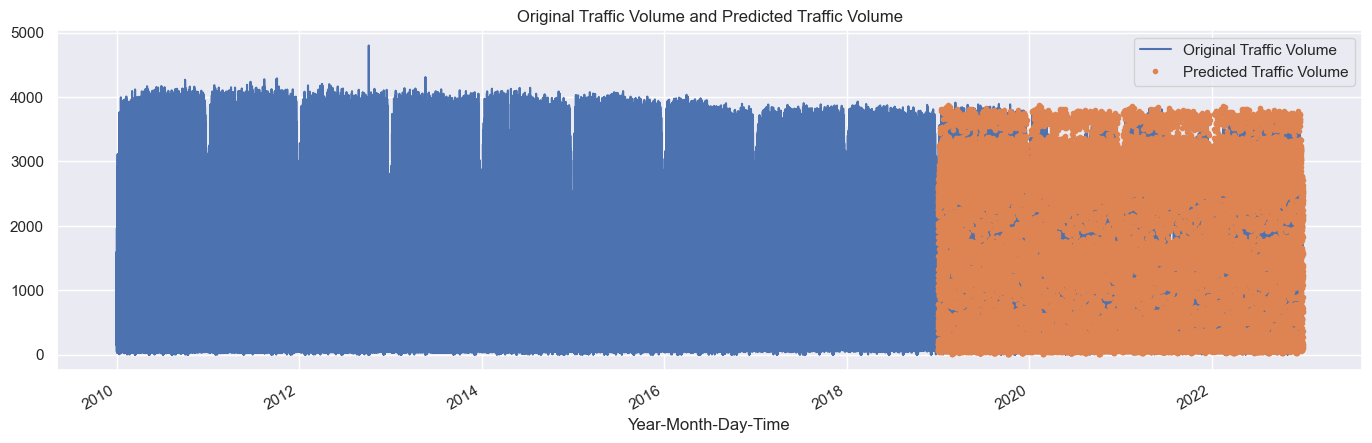

Wall time: 2.04 s


In [158]:
%%time
df = df.merge(testing_df['PredictedVolume'], how='left', left_index = True, right_index = True)
ax = df['TotalVolume'].plot(figsize=(15,5))
df['PredictedVolume'].plot(ax=ax, style='.')
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
ax.set_title('Original Traffic Volume and Predicted Traffic Volume')
plt.show()

In [159]:
%%time
#Display test data with predicted traffic volume
testing_df

Wall time: 0 ns


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2019-01-01 00:00:00          515     0                1        1      1  2019   
2019-01-01 01:00:00          754     1                1        1      1  2019   
2019-01-01 02:00:00          535     2                1        1      1  2019   
2019-01-01 03:00:00          335     3                1        1      1  2019   
2019-01-01 04:00:00          200     4                1        1      1  2019   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00         1168    19                5        4     12  2022   
2022-12-31 20:00:00          911    20                5        4     12  2022   
2022-12-31 21:00:00          769    21                5        4     12  2022   
2022-12-31 22:00:00         1021    22                5        4     12  2022   
2022-12-31 23:00:00          816    23                5        4     12  2022   

                     Day of the year  PredictedVolume  
Year-Month-Day-Time                                    
2019-01-01 00:00:00                1           417.55  
2019-01-01 01:00:00                1           668.48  
2019-01-01 02:00:00                1           405.65  
2019-01-01 03:00:00                1           231.19  
2019-01-01 04:00:00                1           190.38  
...                              ...              ...  
2022-12-31 19:00:00              365          1398.99  
2022-12-31 20:00:00              365          1234.89  
2022-12-31 21:00:00              365           894.88  
2022-12-31 22:00:00              365          1366.83  
2022-12-31 23:00:00              365           668.94  

[35040 rows x 8 columns]

<font color='green'><center><h2><u>Plot Predicted Next Hour Traffic Volume of test dataset</u></h2></center></font>

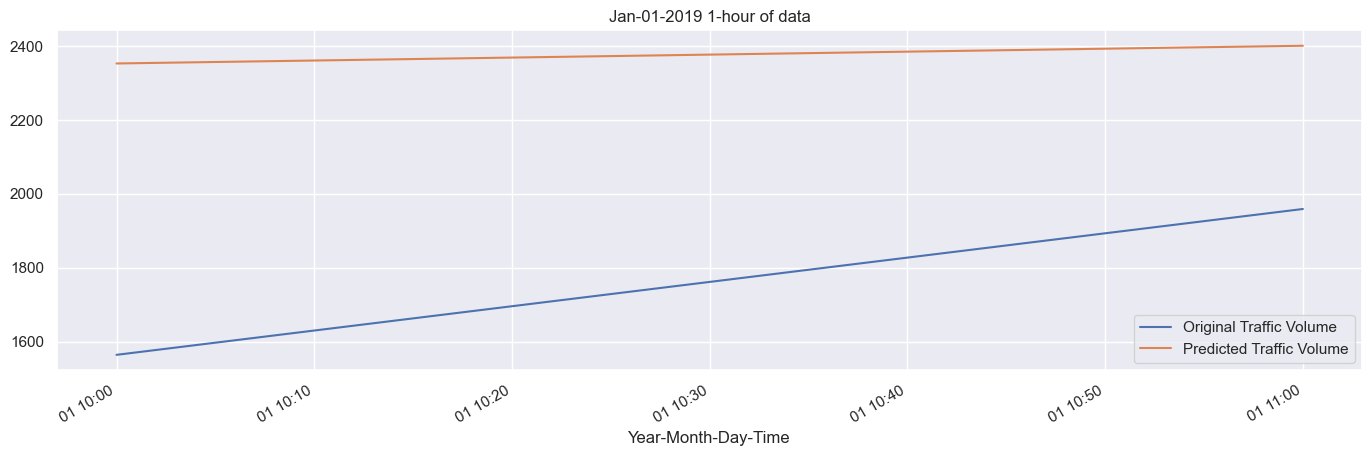

Wall time: 452 ms


In [160]:
%%time
#Hourly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan-01-2019 1-hour of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next one week Traffic Volume of test dataset for understanding</u></h2></center></font>

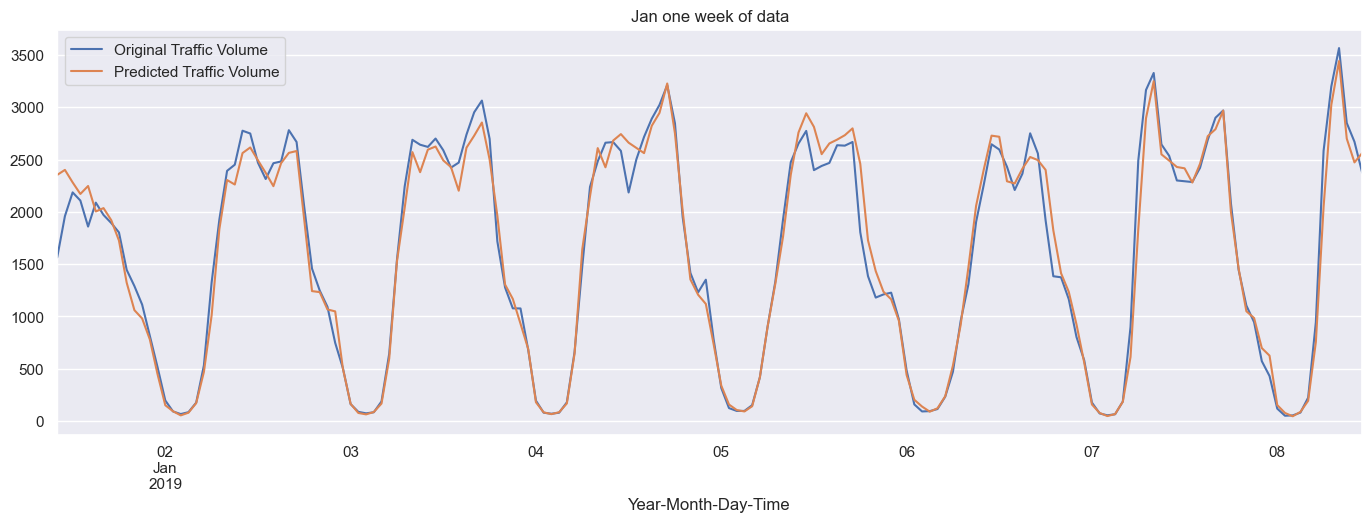

Wall time: 450 ms


In [161]:
%%time
#Weekly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan one week of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [162]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 324.41
Wall time: 3.4 ms


<font color='purple'><center><h1>End: Answering "Train and test the hourly traffic volume of cars and trucks in the historical data between 2010 & 2022 and will predict the next hour traffic volume as a short-range prediction"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Predict the future next day+ revenue from cars and trucks based on daily traffic volume"</h1></center></font>

<font color='blue'><center><h2>Model 1: ARIMA</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [153]:
%%time
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#Auto correlation - To know how many previous data we have to take. 
#p,d,q. p - AR Model Lags, d - Differencing / Integration, q - Moving Average Lags
#q is determined from ACF and p from PACF
#In ACF if band is increasing then the error part is increasing
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA is used when the dataset is non seasonal
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

Wall time: 256 ms


<font color='green'><center><h2><u>Cars: Read Data & Data Pre-Processing</u></h2></center></font>

In [154]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as AB
df_arima_charge = df_inp_data_charge4.copy()
df_arima_charge['Date'] = pd.to_datetime(df_arima_charge['Date'])
df_arima_charge_1 = df_arima_charge[ (df_arima_charge['TollPointID_x'] == "AB") & 
                                        (df_arima_charge['VehicleClass'] == "Car") ]

Wall time: 181 ms


In [155]:
%%time
#Group by TotalVolume & TotalCharges
df_arima_charge_2 = df_arima_charge_1.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_arima_charge_2 = df_arima_charge_2.drop(columns = ['TotalTollCharge'])
df_arima_charge_2

Wall time: 12 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume
Date                   
2019-07-01        41872
2019-07-02        43557
2019-07-03        44445
2019-07-04        45371
2019-07-05        45431
...                 ...
2022-12-27        31043
2022-12-28        33939
2022-12-29        33067
2022-12-30        33682
2022-12-31        26739

[1280 rows x 1 columns]

<font color='green'><center><h2><u>Cars: Input Data Visualization</u></h2></center></font>

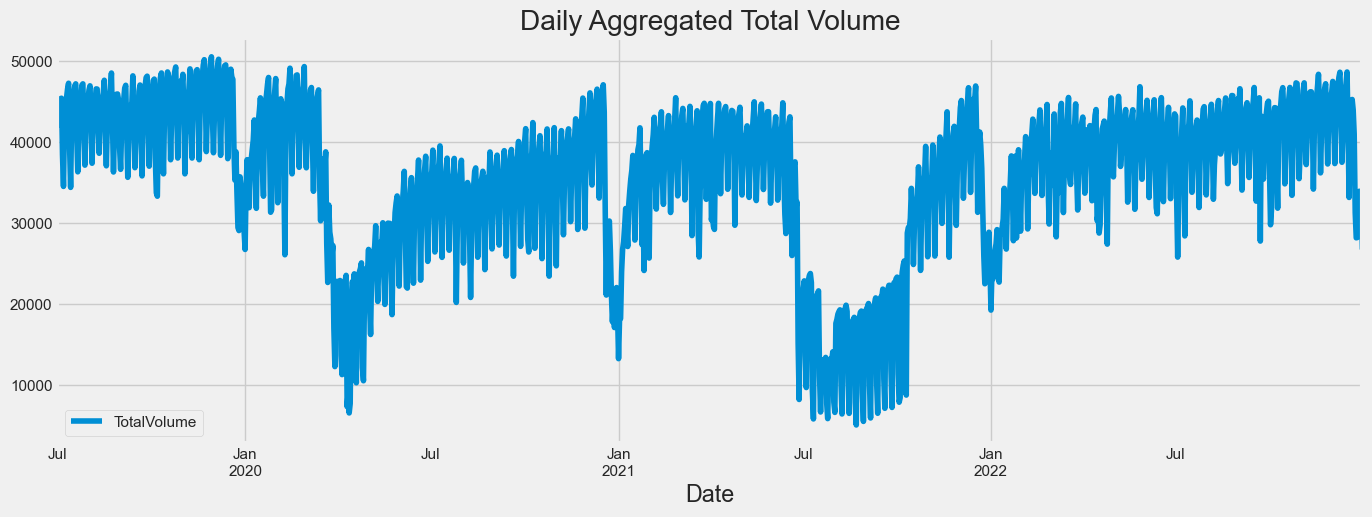

Wall time: 406 ms


In [156]:
%%time
#Plot daily aggregated traffic volume line graph for the given dataset
df_arima_charge_2.plot(figsize=(15,5), title='Daily Aggregated Total Volume')
plt.show()

Wall time: 81.2 ms


<AxesSubplot:xlabel='Date'>

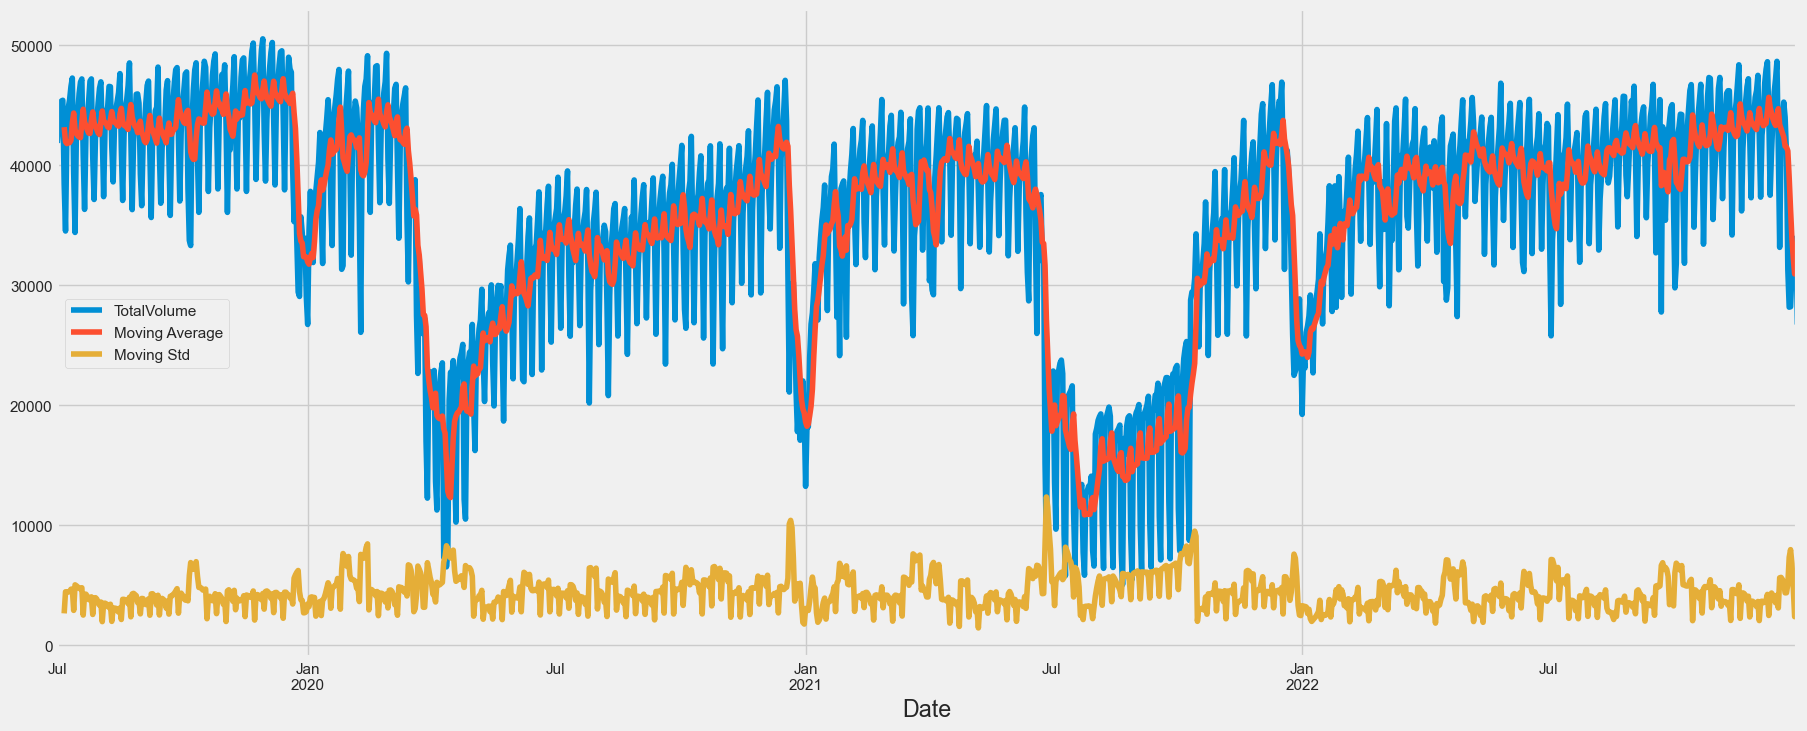

In [157]:
%%time
# Input Data Visualization, Moving average and Moving Standard Deviation
df_arima_charge_2['Moving Average'] = df_arima_charge_2['TotalVolume'].rolling(window=6).mean()
df_arima_charge_2['Moving Std'] = df_arima_charge_2['TotalVolume'].rolling(window=6).std()
df_arima_charge_2.plot.line(y=['TotalVolume','Moving Average','Moving Std'])

<font color='green'><center><h2><u>Cars: Stationarity Test: Augmented Dickey-Fuller Test</u></h2></center></font>

In [158]:
%%time
#Ho: It is not stationary
#H1: It is stationary
#This test is for hypothesis testing

def adfuller_test(volume):
    result = adfuller(volume)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    print("Critical values:")
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result[1] <= 0.05:
        print("p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("p-value: Weak evidence against the null hypothesis, time series has a unit root, indicating it is not stationary")
    
    if result[0] < result[4]["5%"]:
        print("t-value: Reject Ho - Time Series is Stationary")
    else:
        print("t-value: Failed to Reject Ho - Time Series is Non-Stationary")

Wall time: 0 ns


In [159]:
%%time
adfuller_test(df_arima_charge_2['TotalVolume'])

ADF Test Statistic : -3.082399470064589
p-value : 0.0278834234839797
#Lags Used : 21
Number of Observations Used : 1258
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 213 ms


<font color='green'><center><h2><u>Cars: Stationarity Test: Kwiatkowski–Phillips–Schmidt–Shin Test</u></h2></center></font>

In [160]:
%%time
stats, p, lags, critical_values = kpss(df_arima_charge_2['TotalVolume'], 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.5230756293886782
p-value : 0.01
#Lags Used : 20
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is not stationary
Wall time: 1.99 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Cars: Differencing to make data as stationary for future prediction</u></h2></center></font>

In [161]:
%%time
df_arima_charge_2['Volume First Difference'] = df_arima_charge_2['TotalVolume'] - df_arima_charge_2['TotalVolume'].shift(1)

Wall time: 998 µs


In [162]:
%%time
df_arima_charge_2.head(25)

Wall time: 0 ns


TotalVolume  Moving Average   Moving Std  Volume First Difference
Date                                                                         
2019-07-01        41872             NaN          NaN                      NaN
2019-07-02        43557             NaN          NaN                   1685.0
2019-07-03        44445             NaN          NaN                    888.0
2019-07-04        45371             NaN          NaN                    926.0
2019-07-05        45431             NaN          NaN                     60.0
2019-07-06        38462    43189.666667  2667.570555                  -6969.0
2019-07-07        34535    41966.833333  4467.096257                  -3927.0
2019-07-08        42675    41819.833333  4418.550913                   8140.0
2019-07-09        44799    41878.833333  4462.757193                   2124.0
2019-07-10        45477    41896.500000  4479.524785                    678.0
2019-07-11        46582    42088.333333  4681.263320                   1105.0
2019-07-12        47281    43558.166667  4699.407725                    699.0
2019-07-13        39374    44364.666667  2919.219941                  -7907.0
2019-07-14        34415    42988.000000  5047.352811                  -4959.0
2019-07-15        42806    42655.833333  4969.310754                   8391.0
2019-07-16        44356    42469.000000  4861.941834                   1550.0
2019-07-17        45993    42370.833333  4767.313265                   1637.0
2019-07-18        46943    42314.500000  4699.198006                    950.0
2019-07-19        47209    43620.333333  4806.052337                    266.0
2019-07-20        40796    44683.833333  2527.575868                  -6413.0
2019-07-21        36337    43605.666667  4268.768144                  -4459.0
2019-07-22        42538    43302.666667  4269.378534                   6201.0
2019-07-23        43909    42955.333333  4087.636709                   1371.0
2019-07-24        45377    42694.333333  3823.561882                   1468.0
2019-07-25        47034    42665.166667  3782.684624                   1657.0

In [163]:
%%time
#Again do adf test
adfuller_test( df_arima_charge_2['Volume First Difference'].dropna() )

ADF Test Statistic : -8.266966671774238
p-value : 4.908653215835323e-13
#Lags Used : 20
Number of Observations Used : 1258
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 156 ms


In [164]:
%%time
#Again do kpss test
stats, p, lags, critical_values = kpss(df_arima_charge_2['Volume First Difference'].dropna(), 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.040684572764243365
p-value : 0.1
#Lags Used : 80
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is stationary
Wall time: 1.99 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Cars: Visualize first order shifted dataset</u></h2></center></font>

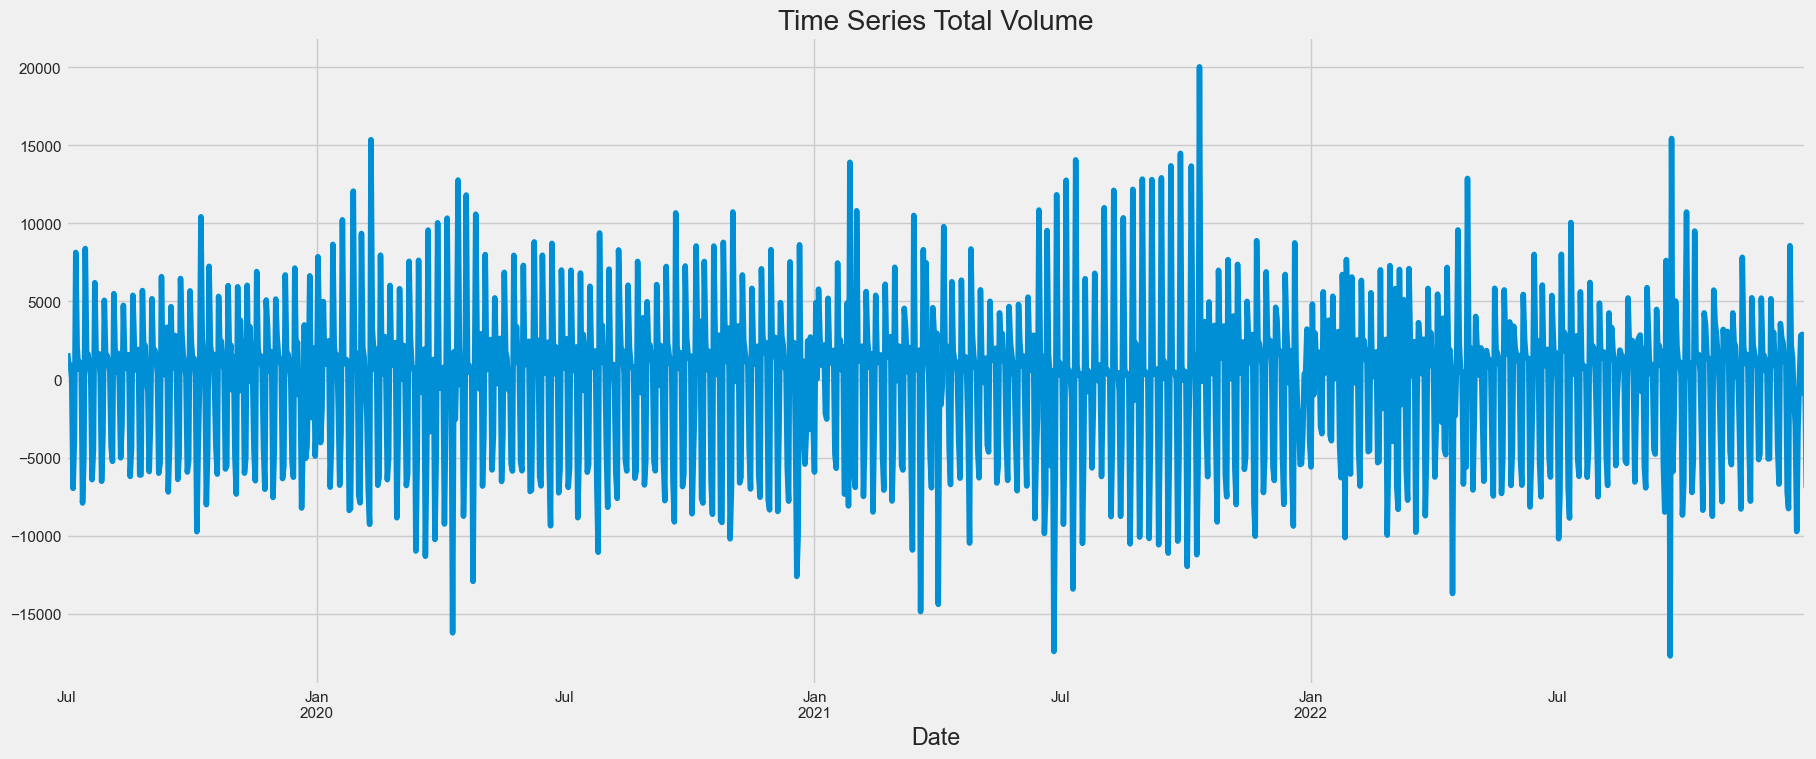

Wall time: 464 ms


In [165]:
%%time
df_arima_charge_2['Volume First Difference'].plot(figsize=(20,8), title="Time Series Total Volume")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

Wall time: 86.3 ms


<AxesSubplot:xlabel='Date'>

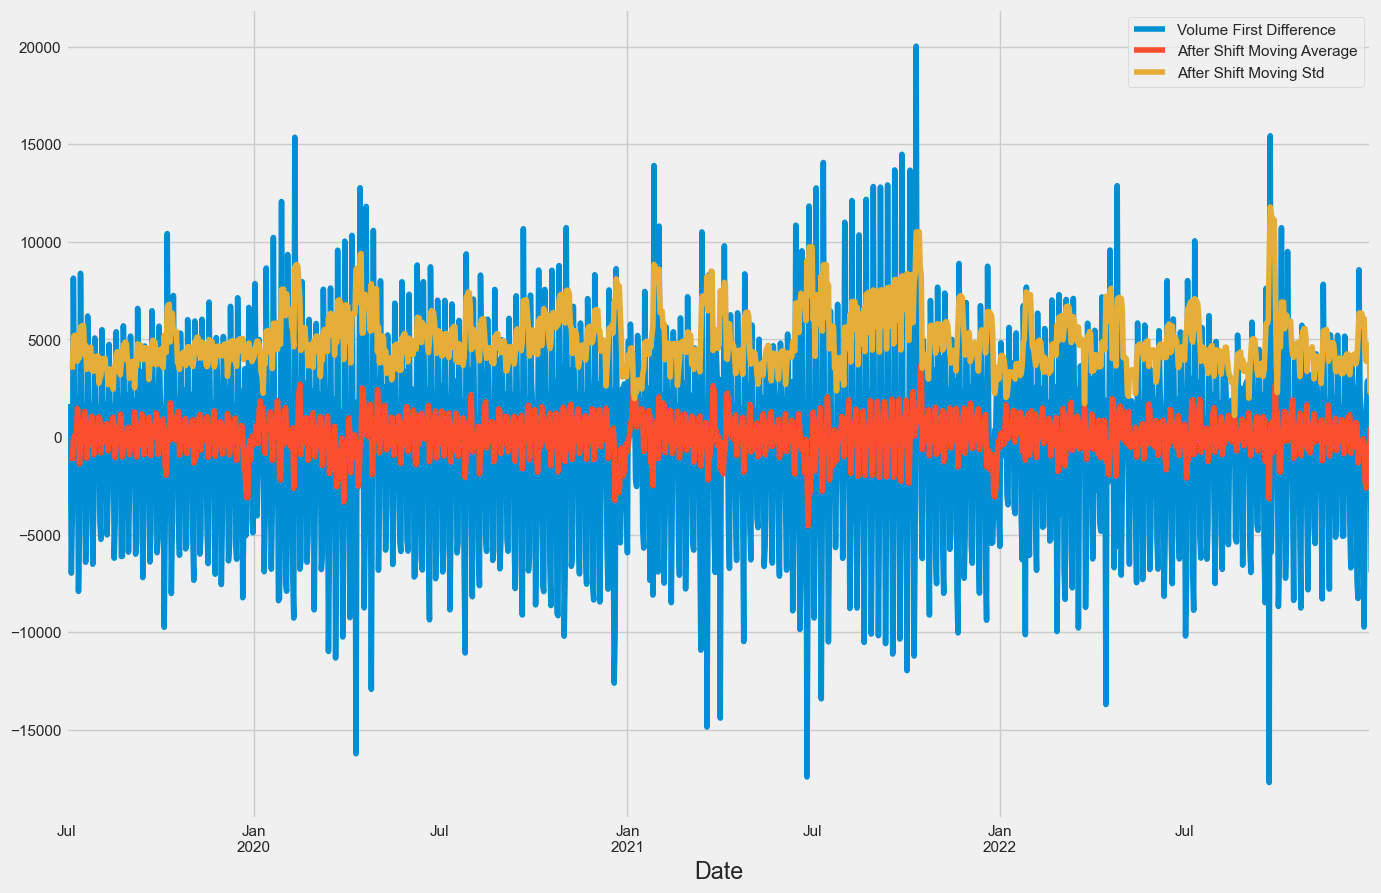

In [166]:
%%time
#Moving average and Moving standard deviation
df_arima_charge_2['After Shift Moving Average'] = df_arima_charge_2['Volume First Difference'].rolling(window=6).mean()
df_arima_charge_2['After Shift Moving Std'] = df_arima_charge_2['Volume First Difference'].rolling(window=6).std()
df_arima_charge_2.plot.line(y=['Volume First Difference','After Shift Moving Average','After Shift Moving Std'])

<font color='green'><center><h2><u>Cars: Plot Autocorrelation & Partial Autocorrelation</u></h2></center></font>

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Wall time: 47.9 ms


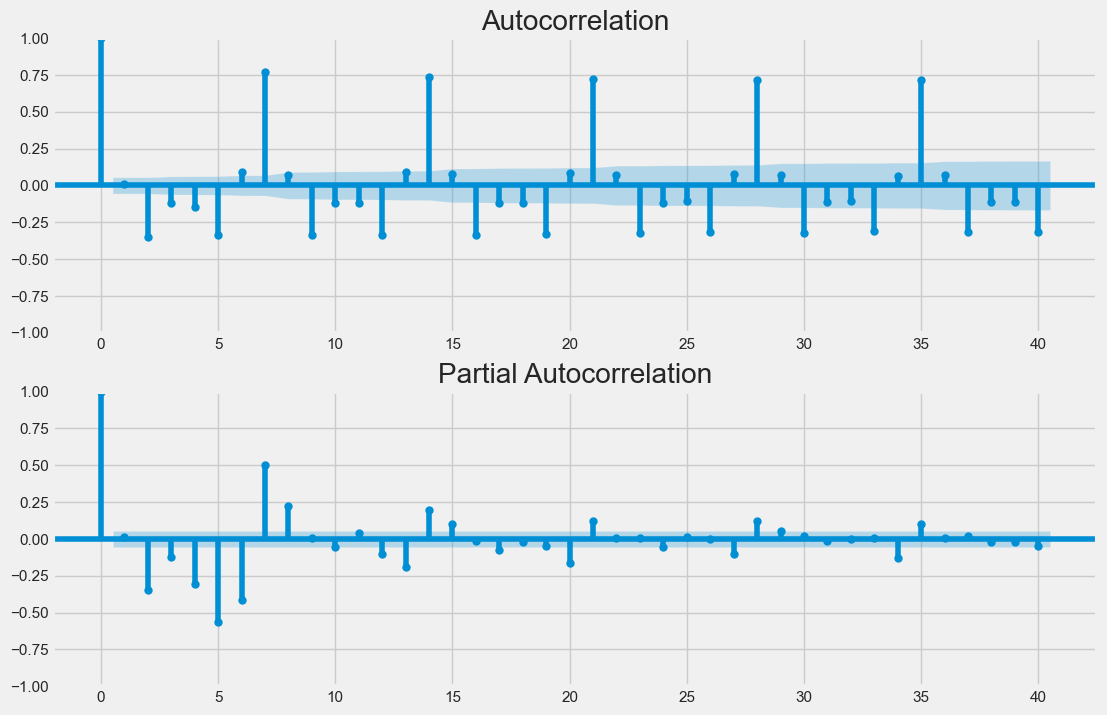

In [167]:
%%time
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima_charge_2['Volume First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima_charge_2['Volume First Difference'].iloc[2:],lags=40,ax=ax2)

<font color='green'><center><h2><u>Cars: Fit Model</u></h2></center></font>

In [168]:
%%time
model = sm.tsa.arima.ARIMA(df_arima_charge_2['TotalVolume'], order=(26,1,18))
results = model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to con

Wall time: 29.6 s


<font color='green'><center><h2><u>Cars: Forecast / Predict using ARIMA model</u></h2></center></font>

Wall time: 89.3 ms


<AxesSubplot:xlabel='Date'>

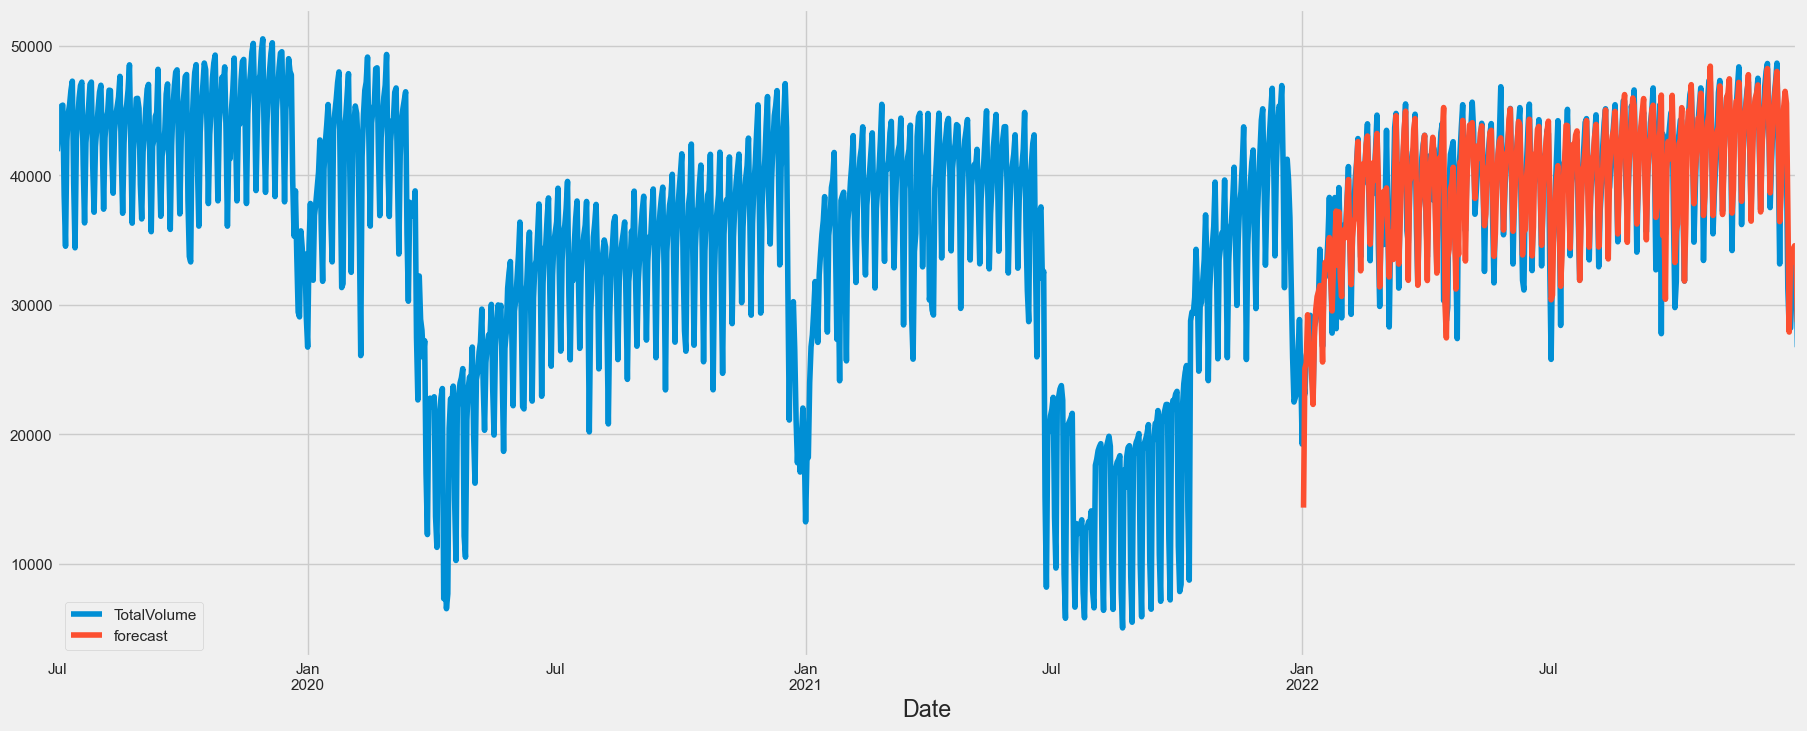

In [169]:
%%time
df_arima_charge_2['forecast'] = results.predict(start=916, end = 1280, dynamic= False)
df_arima_charge_2[['TotalVolume','forecast']].plot(figsize=(20,8))

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [170]:
%%time
ErrorValue = np.abs( df_arima_charge_2['TotalVolume'] - df_arima_charge_2['forecast'] )
print('Mean Abosolute Error Score of the predicted Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the predicted Dataset: 1545.78
Wall time: 1.03 ms


<font color='blue'><center><h2>Model 2: LSTM</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [128]:
%%time
#Import Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
from sklearn.metrics import mean_squared_error

Wall time: 0 ns


<font color='green'><center><h2><u>Cars: Read Data & Data Pre-Processing</u></h2></center></font>

In [129]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as AB
df_lstm_charge = df_inp_data_charge4.copy()
df_lstm_charge['Date'] = pd.to_datetime(df_lstm_charge['Date'])
df_lstm_charge_1 = df_lstm_charge[ (df_lstm_charge['TollPointID_x'] == "AB") & 
                                        (df_lstm_charge['VehicleClass'] == "Car") ]

Wall time: 181 ms


In [130]:
%%time
#Group by TotalVolume & TotalCharges
df_lstm_charge_2 = df_lstm_charge_1.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_lstm_charge_2.to_csv('lstm_charge.csv')
df_lstm_charge_3 = pd.read_csv("C:/Users/USER/Documents/Toll/lstm_charge.csv")
df_lstm_charge_3

Wall time: 26.9 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Date  TotalVolume  TotalTollCharge
0     2019-07-01        41872        321995.68
1     2019-07-02        43557        334953.33
2     2019-07-03        44445        341782.05
3     2019-07-04        45371        348902.99
4     2019-07-05        45431        349364.39
...          ...          ...              ...
1275  2022-12-27        31043        274420.12
1276  2022-12-28        33939        300020.76
1277  2022-12-29        33067        292312.28
1278  2022-12-30        33682        297748.88
1279  2022-12-31        26739        236372.76

[1280 rows x 3 columns]

In [131]:
%%time
#Convert total volume & charge to float
cols = list(df_lstm_charge_3)[1:3]
df_lstm_charge_4 = df_lstm_charge_3[cols].astype(float)

#Display Total Volume & Charge as float
df_lstm_charge_4

Wall time: 997 µs


TotalVolume  TotalTollCharge
0         41872.0        321995.68
1         43557.0        334953.33
2         44445.0        341782.05
3         45371.0        348902.99
4         45431.0        349364.39
...           ...              ...
1275      31043.0        274420.12
1276      33939.0        300020.76
1277      33067.0        292312.28
1278      33682.0        297748.88
1279      26739.0        236372.76

[1280 rows x 2 columns]

<font color='green'><center><h2><u>Cars: Data Normalization</u></h2></center></font>

In [132]:
%%time
#Normalize the dataset
scaler = StandardScaler()
df_lstm_charge_4_scaled = scaler.fit_transform(df_lstm_charge_4)

Wall time: 2.99 ms


In [133]:
%%time
#Check the shape of scaled data
df_lstm_charge_4_scaled.shape

Wall time: 0 ns


(1280, 2)

In [134]:
%%time
#Display scaled data
df_lstm_charge_4_scaled

Wall time: 0 ns


array([[ 0.65214592,  0.34776054],
       [ 0.83234203,  0.51388661],
       [ 0.92730592,  0.60143555],
       ...,
       [-0.28947234, -0.03280125],
       [-0.22370343,  0.03689973],
       [-0.96619697, -0.74998474]])

<font color='green'><center><h2><u>Cars: Training & Testing Dataset</u></h2></center></font>

In [135]:
%%time
trainX = []
trainY = []
n_future = 1 #No of days to predict in future
n_past = 14 #No of past days want to predict future

Wall time: 0 ns


In [136]:
%%time
for i in range(n_past, len(df_lstm_charge_4_scaled) - n_future + 1):
    trainX.append(df_lstm_charge_4_scaled[i - n_past:i, 0:df_lstm_charge_4_scaled.shape[1]])
    trainY.append(df_lstm_charge_4_scaled[i + n_future - 1:i + n_future, 0])

Wall time: 2 ms


In [137]:
%%time
trainX, trainY = np.array(trainX), np.array(trainY)

Wall time: 2.01 ms


In [138]:
%%time
print('trainX:', format(trainX.shape))
print('trainY:', format(trainY.shape))

trainX: (1266, 14, 2)
trainY: (1266, 1)
Wall time: 998 µs


<font color='green'><center><h2><u>Cars: Model Creation</u></h2></center></font>

In [139]:
%%time
#Create model
model = Sequential()
model.add(LSTM(64, activation = 'relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation = 'relu', return_sequences=False))
model.add(Dense(trainY.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17152     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________
Wall time: 242 ms


In [140]:
%%time
#fit the model
history = model.fit(trainX, trainY, batch_size=16, validation_split=0.1, verbose=2, epochs=10)

Epoch 1/10
72/72 - 3s - loss: 0.4425 - mse: 0.4425 - val_loss: 0.3890 - val_mse: 0.3890 - 3s/epoch - 46ms/step
Epoch 2/10
72/72 - 1s - loss: 0.3247 - mse: 0.3247 - val_loss: 0.2521 - val_mse: 0.2521 - 632ms/epoch - 9ms/step
Epoch 3/10
72/72 - 1s - loss: 0.3080 - mse: 0.3080 - val_loss: 0.2294 - val_mse: 0.2294 - 593ms/epoch - 8ms/step
Epoch 4/10
72/72 - 1s - loss: 0.2853 - mse: 0.2853 - val_loss: 0.3611 - val_mse: 0.3611 - 604ms/epoch - 8ms/step
Epoch 5/10
72/72 - 1s - loss: 0.2900 - mse: 0.2900 - val_loss: 0.2468 - val_mse: 0.2468 - 577ms/epoch - 8ms/step
Epoch 6/10
72/72 - 1s - loss: 0.2461 - mse: 0.2461 - val_loss: 0.2065 - val_mse: 0.2065 - 612ms/epoch - 9ms/step
Epoch 7/10
72/72 - 1s - loss: 0.2203 - mse: 0.2203 - val_loss: 0.1670 - val_mse: 0.1670 - 598ms/epoch - 8ms/step
Epoch 8/10
72/72 - 1s - loss: 0.1840 - mse: 0.1840 - val_loss: 0.1403 - val_mse: 0.1403 - 600ms/epoch - 8ms/step
Epoch 9/10
72/72 - 1s - loss: 0.1721 - mse: 0.1721 - val_loss: 0.1311 - val_mse: 0.1311 - 627ms/ep

Wall time: 21.2 ms


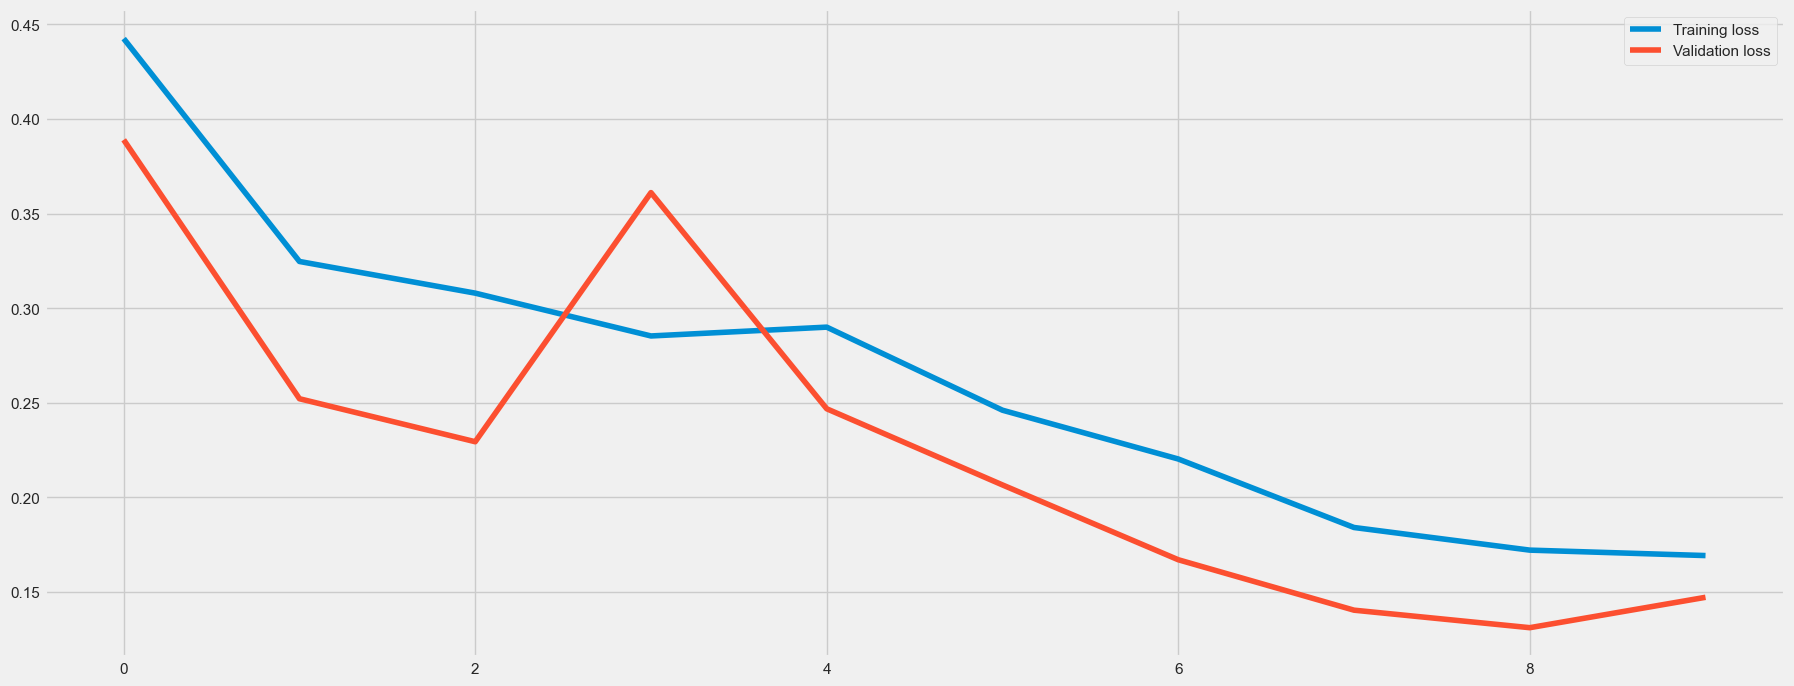

In [141]:
%%time
#Plot the model loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

<font color='green'><center><h2><u>Cars: Predict train & test dataset</u></h2></center></font>

In [142]:
%%time
n_past_days = 16
n_days_for_prediction = 15  #let us predict past 15 days

#Separate dates for future plotting
training_dates = pd.to_datetime(df_lstm_charge_3['Date'])
print(training_dates.tail(15)) #Check last few dates. 

predict_period_dates = pd.date_range(list(training_dates)[-n_past_days], periods=n_days_for_prediction, freq='1d').tolist()
print(predict_period_dates)

1265   2022-12-17
1266   2022-12-18
1267   2022-12-19
1268   2022-12-20
1269   2022-12-21
1270   2022-12-22
1271   2022-12-23
1272   2022-12-24
1273   2022-12-25
1274   2022-12-26
1275   2022-12-27
1276   2022-12-28
1277   2022-12-29
1278   2022-12-30
1279   2022-12-31
Name: Date, dtype: datetime64[ns]
[Timestamp('2022-12-16 00:00:00', freq='D'), Timestamp('2022-12-17 00:00:00', freq='D'), Timestamp('2022-12-18 00:00:00', freq='D'), Timestamp('2022-12-19 00:00:00', freq='D'), Timestamp('2022-12-20 00:00:00', freq='D'), Timestamp('2022-12-21 00:00:00', freq='D'), Timestamp('2022-12-22 00:00:00', freq='D'), Timestamp('2022-12-23 00:00:00', freq='D'), Timestamp('2022-12-24 00:00:00', freq='D'), Timestamp('2022-12-25 00:00:00', freq='D'), Timestamp('2022-12-26 00:00:00', freq='D'), Timestamp('2022-12-27 00:00:00', freq='D'), Timestamp('2022-12-28 00:00:00', freq='D'), Timestamp('2022-12-29 00:00:00', freq='D'), Timestamp('2022-12-30 00:00:00', freq='D')]
Wall time: 3.99 ms


In [143]:
%%time
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

1/1 [==============================] - 0s 321ms/step
Wall time: 371 ms


In [144]:
%%time
prediction_copies = np.repeat(prediction, df_lstm_charge_4.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

Wall time: 0 ns


In [145]:
%%time
#Predicted values
y_pred_future

Wall time: 0 ns


array([41709.387, 38683.348, 36188.457, 42713.844, 40394.605, 42937.15 ,
       42855.973, 41120.637, 33962.79 , 31730.137, 28185.393, 29174.992,
       29571.963, 28984.756, 31477.402], dtype=float32)

In [146]:
%%time
# Convert predicted date timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

Wall time: 0 ns


In [147]:
%%time
#Predicted date and total volume
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'TotalVolume':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

Wall time: 2 ms


In [148]:
%%time
#Original data
original = df_lstm_charge_3[['Date', 'TotalVolume']]
original['Date']=pd.to_datetime(original['Date'])
original_filtered = original.loc[ (original['Date'] <= '2022-12-16') ]

Wall time: 2.99 ms


<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 82.8 ms


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='TotalVolume'>

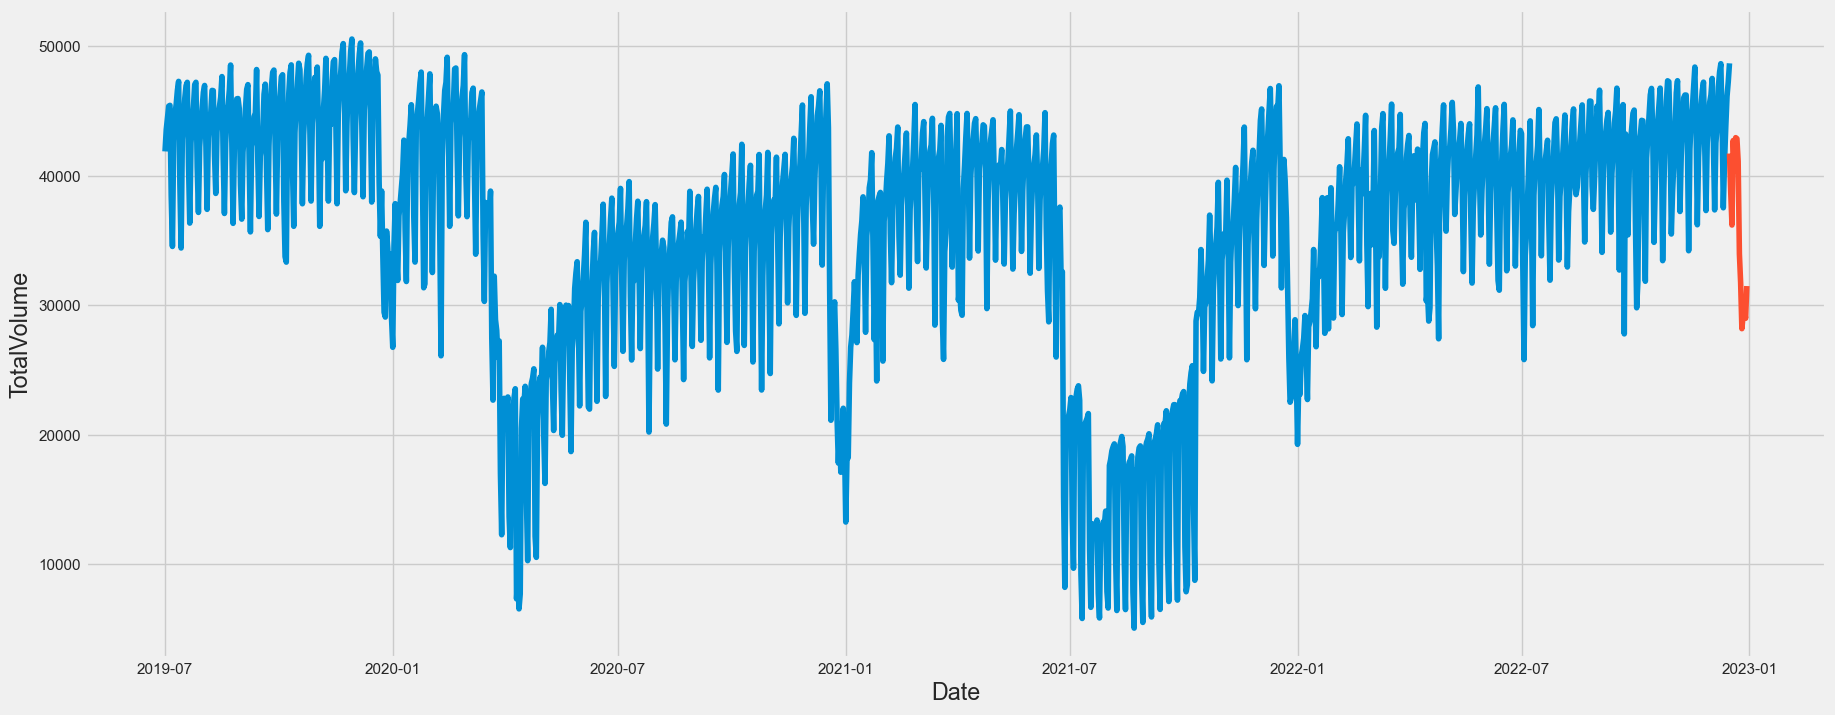

In [149]:
%%time
#Plot Original and Forcasted total volume
sns.lineplot(original_filtered['Date'], original_filtered['TotalVolume'])
sns.lineplot(df_forecast['Date'], df_forecast['TotalVolume'])

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [150]:
%%time
original_subset = original.loc[ (original['Date'] >= '2022-12-16') & (original['Date'] <= '2022-12-31') ]

Wall time: 1.96 ms


In [151]:
%%time
merged = pd.merge(original_subset, df_forecast, on="Date", how="left")
merged

Wall time: 2 ms


Date  TotalVolume_x  TotalVolume_y
0  2022-12-16          48674   41709.386719
1  2022-12-17          41437   38683.347656
2  2022-12-18          33170   36188.457031
3  2022-12-19          41741   42713.843750
4  2022-12-20          43937   40394.605469
5  2022-12-21          45276   42937.148438
6  2022-12-22          44012   42855.972656
7  2022-12-23          41008   41120.636719
8  2022-12-24          31276   33962.789062
9  2022-12-25          28186   31730.136719
10 2022-12-26          28221   28185.392578
11 2022-12-27          31043   29174.992188
12 2022-12-28          33939   29571.962891
13 2022-12-29          33067   28984.755859
14 2022-12-30          33682   31477.402344
15 2022-12-31          26739            NaN

In [152]:
%%time
ErrorValue = np.abs( merged['TotalVolume_x'] - merged['TotalVolume_y']  )
print('Mean Abosolute Error Score of the Forcasted Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the Forcasted Dataset: 2643.19
Wall time: 998 µs


<font color='blue'><center><h2>Model 3: XGBoostRegressor</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [66]:
%%time
#Importing Libraries Required
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
colour_palette = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import TimeSeriesSplit

Wall time: 0 ns


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [67]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as AB
df_xgboost_charge = df_inp_data_charge4.copy()
df_xgboost_charge['Date'] = pd.to_datetime(df_xgboost_charge['Date'])
df_xgboost_charge_1_Car = df_xgboost_charge[ (df_xgboost_charge['TollPointID_x'] == "AB") & 
                                        (df_xgboost_charge['VehicleClass'] == "Car") ]
df_xgboost_charge_1_Truck = df_xgboost_charge[ (df_xgboost_charge['TollPointID_x'] == "AB") &
                                       (df_xgboost_charge['VehicleClass'] == "Truck") ]

Wall time: 272 ms


In [68]:
%%time
#Group by TotalVolume & TotalCharges
df_xgboost_charge_2_Car = df_xgboost_charge_1_Car.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_xgboost_charge_2_Car

Wall time: 11 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume  TotalTollCharge
Date                                    
2019-07-01        41872        321995.68
2019-07-02        43557        334953.33
2019-07-03        44445        341782.05
2019-07-04        45371        348902.99
2019-07-05        45431        349364.39
...                 ...              ...
2022-12-27        31043        274420.12
2022-12-28        33939        300020.76
2022-12-29        33067        292312.28
2022-12-30        33682        297748.88
2022-12-31        26739        236372.76

[1280 rows x 2 columns]

In [69]:
%%time
#Group by TotalVolume & TotalCharges
df_xgboost_charge_2_Truck = df_xgboost_charge_1_Truck.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_xgboost_charge_2_Truck

Wall time: 8.98 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume  TotalTollCharge
Date                                    
2019-07-01         1857         28542.09
2019-07-02         1973         30325.01
2019-07-03         2046         31447.02
2019-07-04         1989         30570.93
2019-07-05         1902         29233.74
...                 ...              ...
2022-12-27          515          9110.35
2022-12-28          897         15867.93
2022-12-29          883         15620.27
2022-12-30          772         13656.68
2022-12-31          354          6262.26

[1280 rows x 2 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

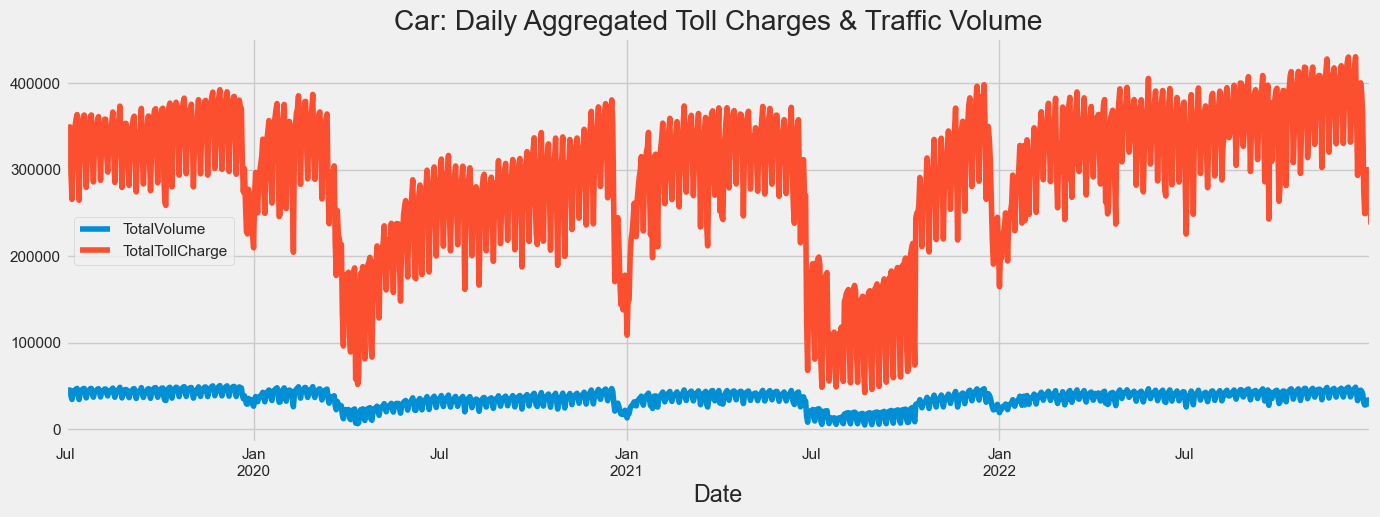

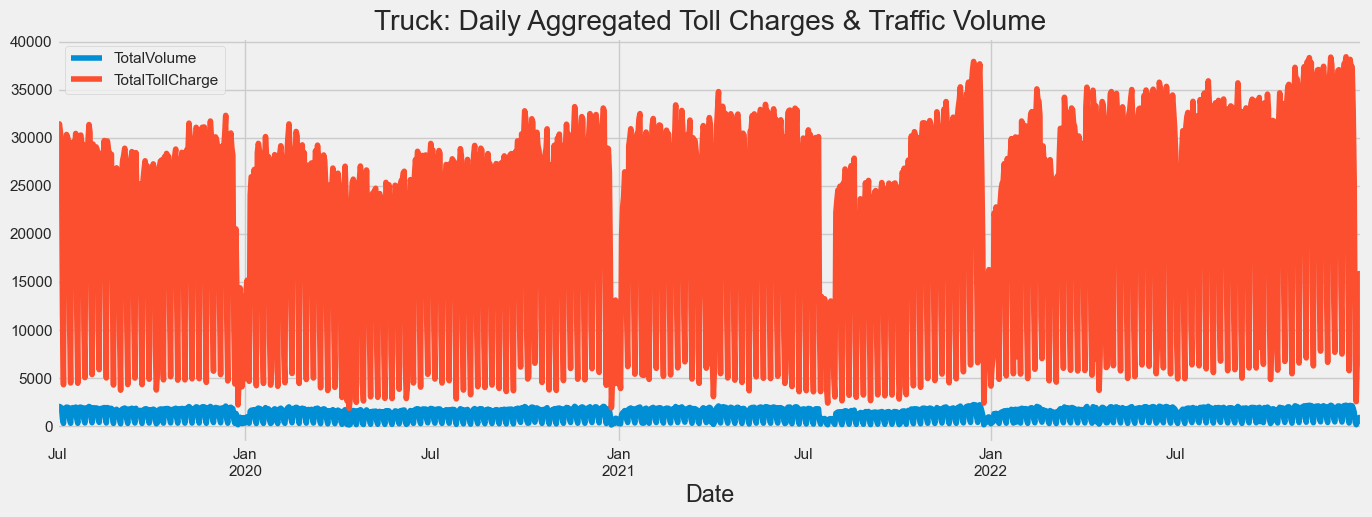

Wall time: 868 ms


In [70]:
%%time
#Plot daily aggregated toll charges and traffic volume line graph for the given dataset
df_xgboost_charge_2_Car.plot(figsize=(15,5), title='Car: Daily Aggregated Toll Charges & Traffic Volume')
plt.show()

df_xgboost_charge_2_Truck.plot(figsize=(15,5), title='Truck: Daily Aggregated Toll Charges & Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [71]:
%%time
#Below is the feature creation created as a function
def xgb_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [72]:
%%time
#Car: Diplay features
df_xgboost_charge_3_Car = xgb_feature_creation(df_xgboost_charge_2_Car)
df_xgboost_charge_3_Car

Wall time: 5.02 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
Date                                                                       
2019-07-01        41872        321995.68     0                0        3   
2019-07-02        43557        334953.33     0                1        3   
2019-07-03        44445        341782.05     0                2        3   
2019-07-04        45371        348902.99     0                3        3   
2019-07-05        45431        349364.39     0                4        3   
...                 ...              ...   ...              ...      ...   
2022-12-27        31043        274420.12     0                1        4   
2022-12-28        33939        300020.76     0                2        4   
2022-12-29        33067        292312.28     0                3        4   
2022-12-30        33682        297748.88     0                4        4   
2022-12-31        26739        236372.76     0                5        4   

            Month  Year  Day of the year  
Date                                      
2019-07-01      7  2019              182  
2019-07-02      7  2019              183  
2019-07-03      7  2019              184  
2019-07-04      7  2019              185  
2019-07-05      7  2019              186  
...           ...   ...              ...  
2022-12-27     12  2022              361  
2022-12-28     12  2022              362  
2022-12-29     12  2022              363  
2022-12-30     12  2022              364  
2022-12-31     12  2022              365  

[1280 rows x 8 columns]

In [73]:
%%time
#Truck Diplay features
df_xgboost_charge_3_Truck = xgb_feature_creation(df_xgboost_charge_2_Truck)
df_xgboost_charge_3_Truck

Wall time: 0 ns


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
Date                                                                       
2019-07-01         1857         28542.09     0                0        3   
2019-07-02         1973         30325.01     0                1        3   
2019-07-03         2046         31447.02     0                2        3   
2019-07-04         1989         30570.93     0                3        3   
2019-07-05         1902         29233.74     0                4        3   
...                 ...              ...   ...              ...      ...   
2022-12-27          515          9110.35     0                1        4   
2022-12-28          897         15867.93     0                2        4   
2022-12-29          883         15620.27     0                3        4   
2022-12-30          772         13656.68     0                4        4   
2022-12-31          354          6262.26     0                5        4   

            Month  Year  Day of the year  
Date                                      
2019-07-01      7  2019              182  
2019-07-02      7  2019              183  
2019-07-03      7  2019              184  
2019-07-04      7  2019              185  
2019-07-05      7  2019              186  
...           ...   ...              ...  
2022-12-27     12  2022              361  
2022-12-28     12  2022              362  
2022-12-29     12  2022              363  
2022-12-30     12  2022              364  
2022-12-31     12  2022              365  

[1280 rows x 8 columns]

Wall time: 62.8 ms


Text(0.5, 1.0, 'Car: Daily Aggregated Total Volume')

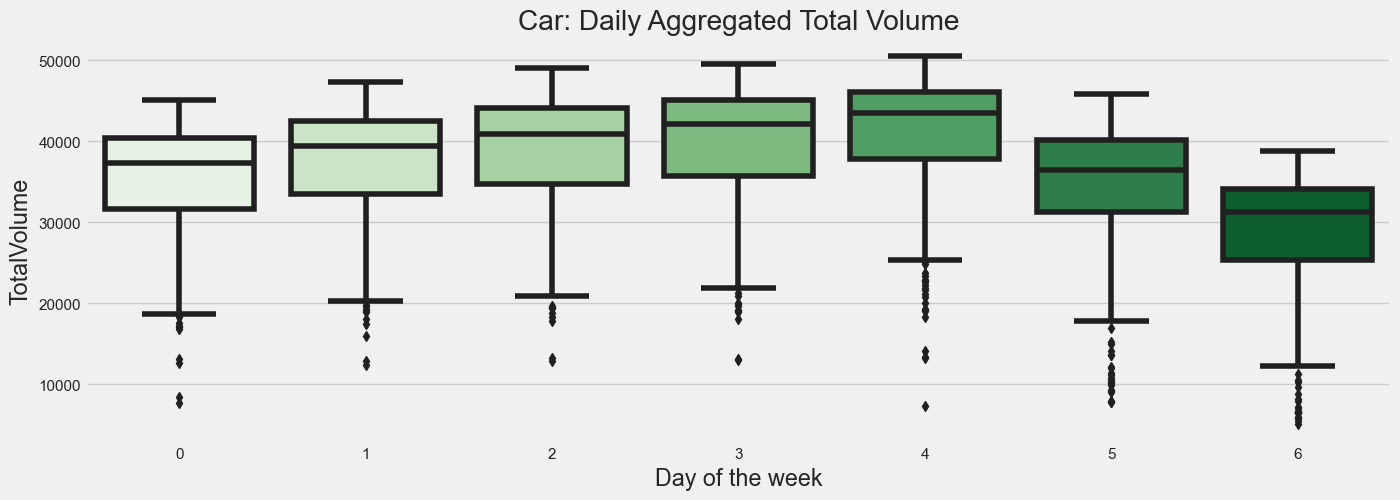

In [74]:
%%time
# Visualize hourly feature to target relationship
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df_xgboost_charge_3_Car, x='Day of the week', y='TotalVolume', palette='Greens')
ax.set_title('Car: Daily Aggregated Total Volume')

Wall time: 56.9 ms


Text(0.5, 1.0, 'Truck: Daily Aggregated Total Volume')

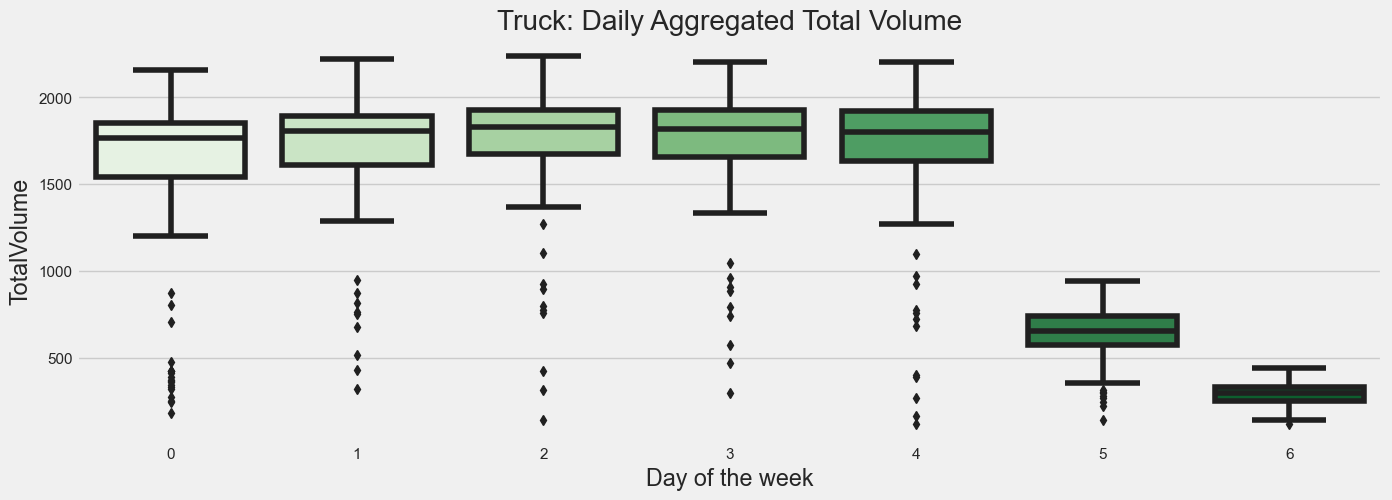

In [75]:
%%time
# Visualize hourly feature to target relationship
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df_xgboost_charge_3_Truck, x='Day of the week', y='TotalVolume', palette='Greens')
ax.set_title('Truck: Daily Aggregated Total Volume')

<h2>Summary from Day of the week feature to target relationship:
<h3>
Wednesday, Thursday and Friday of the week shows more traffic volume than the other days of the week.

Wall time: 89.8 ms


Text(0.5, 1.0, 'Car: Monthly Aggregated Total Volume')

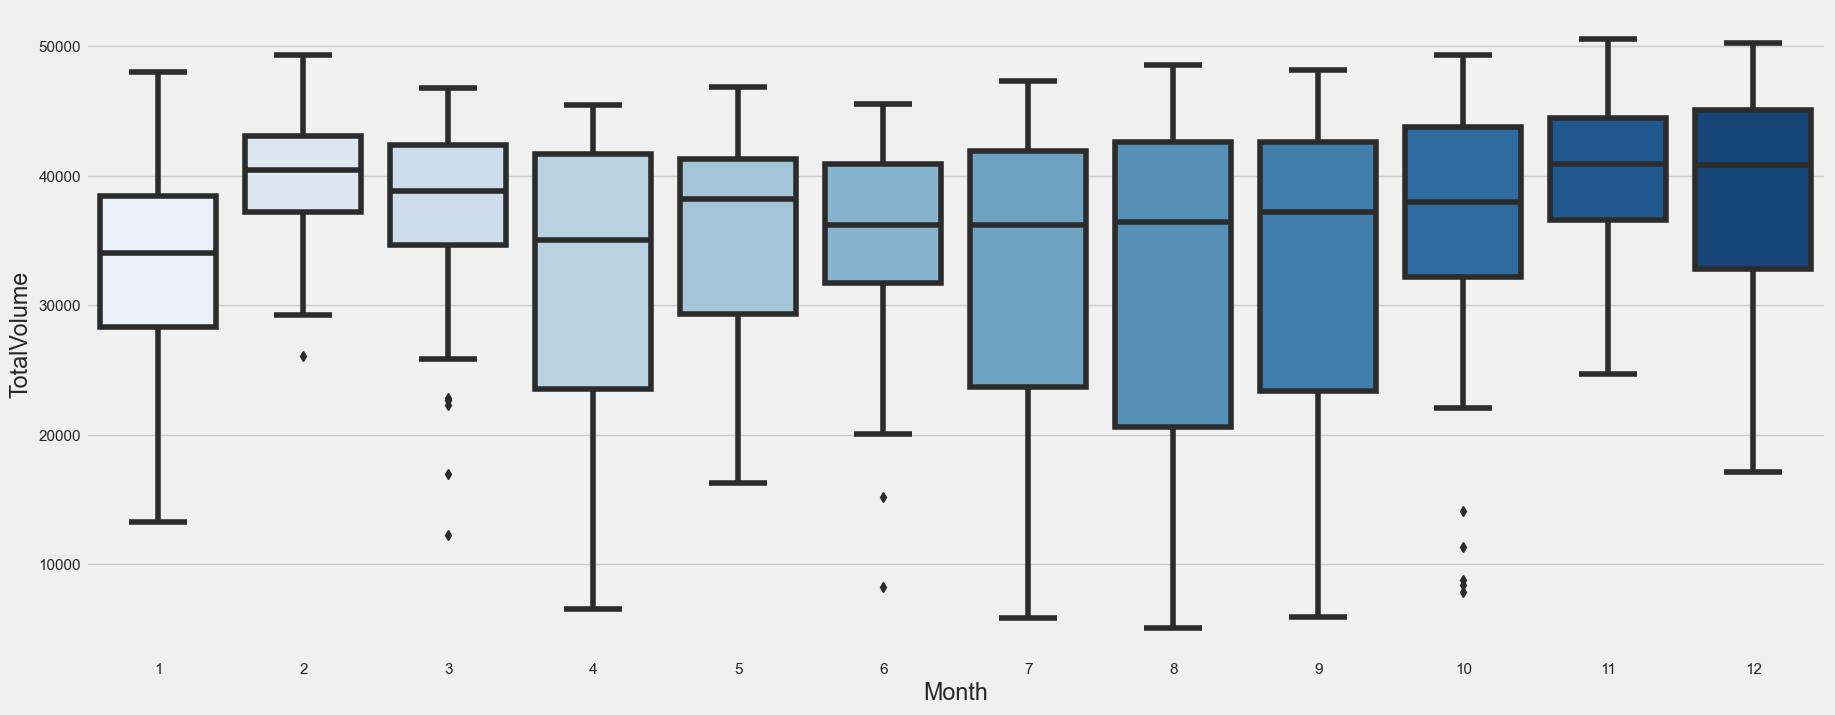

In [76]:
%%time
# Visualize monthly feature to target relationship
sns.boxplot(data=df_xgboost_charge_3_Car, x='Month', y='TotalVolume', palette='Blues')
ax.set_title('Car: Monthly Aggregated Total Volume')

Wall time: 91.8 ms


Text(0.5, 1.0, 'Truck: Monthly Aggregated Total Volume')

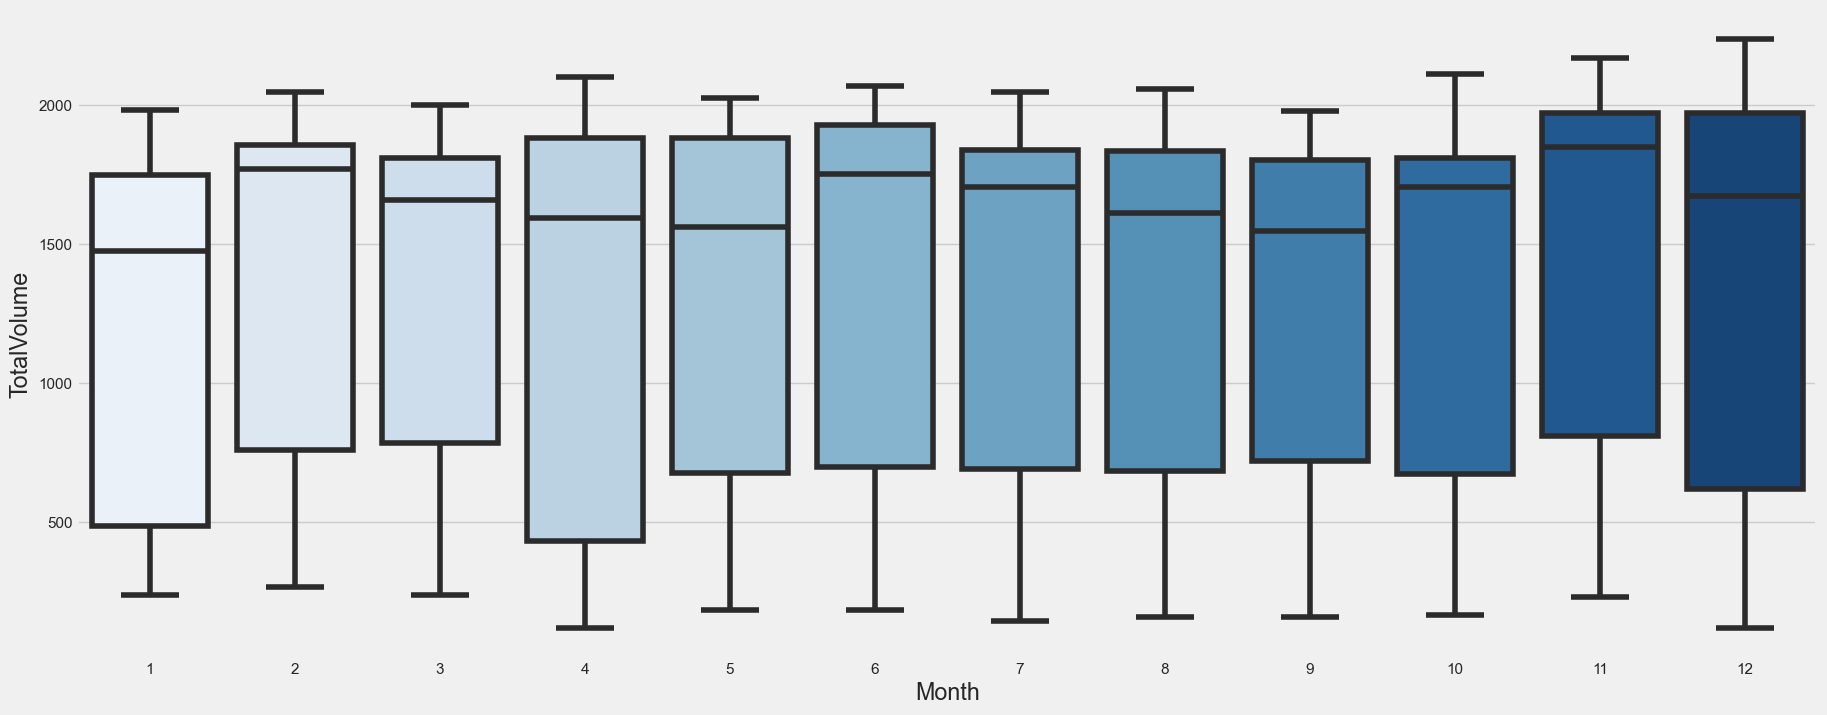

In [77]:
%%time
# Visualize monthly feature to target relationship
sns.boxplot(data=df_xgboost_charge_3_Truck, x='Month', y='TotalVolume', palette='Blues')
ax.set_title('Truck: Monthly Aggregated Total Volume')

<font color='green'><center><h2><u>Cars: Training & Testing Dataset</u></h2></center></font>

In [78]:
%%time
#Split train and test dataset for as a time series
training_df = df_xgboost_charge_3_Car.loc[df_xgboost_charge_3_Car.index < '01-01-2022']
testing_df = df_xgboost_charge_3_Car.loc[df_xgboost_charge_3_Car.index >= '01-01-2022']

Wall time: 1.99 ms


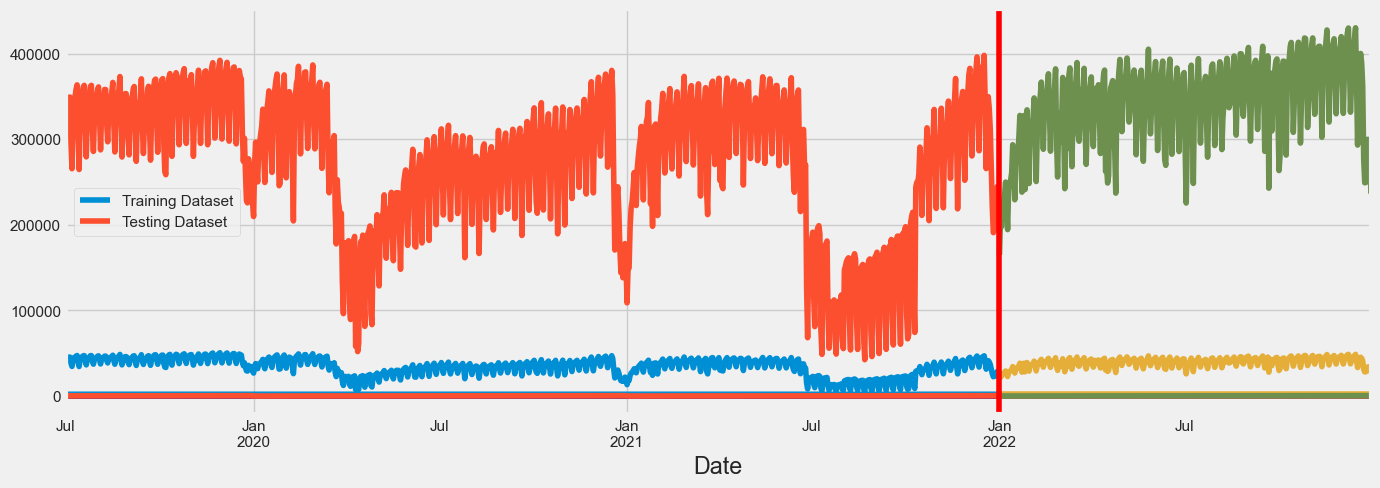

Wall time: 531 ms


In [79]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2022', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Cars: Add features to dataset</u></h2></center></font>

In [80]:
%%time
#Adding features to train and test dataset
training_df = xgb_feature_creation(training_df)
testing_df = xgb_feature_creation(testing_df)
XGB_COLUMN_FEATURES = ['TotalTollCharge','Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
XGB_COLUMN_TARGET = ['TotalVolume']

Wall time: 4.99 ms


<font color='green'><center><h2><u>Cars: Define feature & target columns for train & test dataset</u></h2></center></font>

In [81]:
%%time
X_train = training_df[XGB_COLUMN_FEATURES]
y_train = training_df[XGB_COLUMN_TARGET]

X_test = testing_df[XGB_COLUMN_FEATURES]
y_test = testing_df[XGB_COLUMN_TARGET]

Wall time: 3.99 ms


<font color='green'><center><h2><u>Cars: Model Creation</u></h2></center></font>

In [82]:
%%time
#Create the model
#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100
       )

[15:54:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:35482.42189	validation_1-rmse:39273.19757
[100]	validation_0-rmse:13132.58373	validation_1-rmse:13375.59136
[200]	validation_0-rmse:4901.19163	validation_1-rmse:4224.15449
[300]	validation_0-rmse:1863.38218	validation_1-rmse:1367.88397
[392]	validation_0-rmse:800.51659	validation_1-rmse:1207.12251
Wall time: 278 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

<font color='green'><center><h2><u>Cars: Visualize Feature Importance</u></h2></center></font>

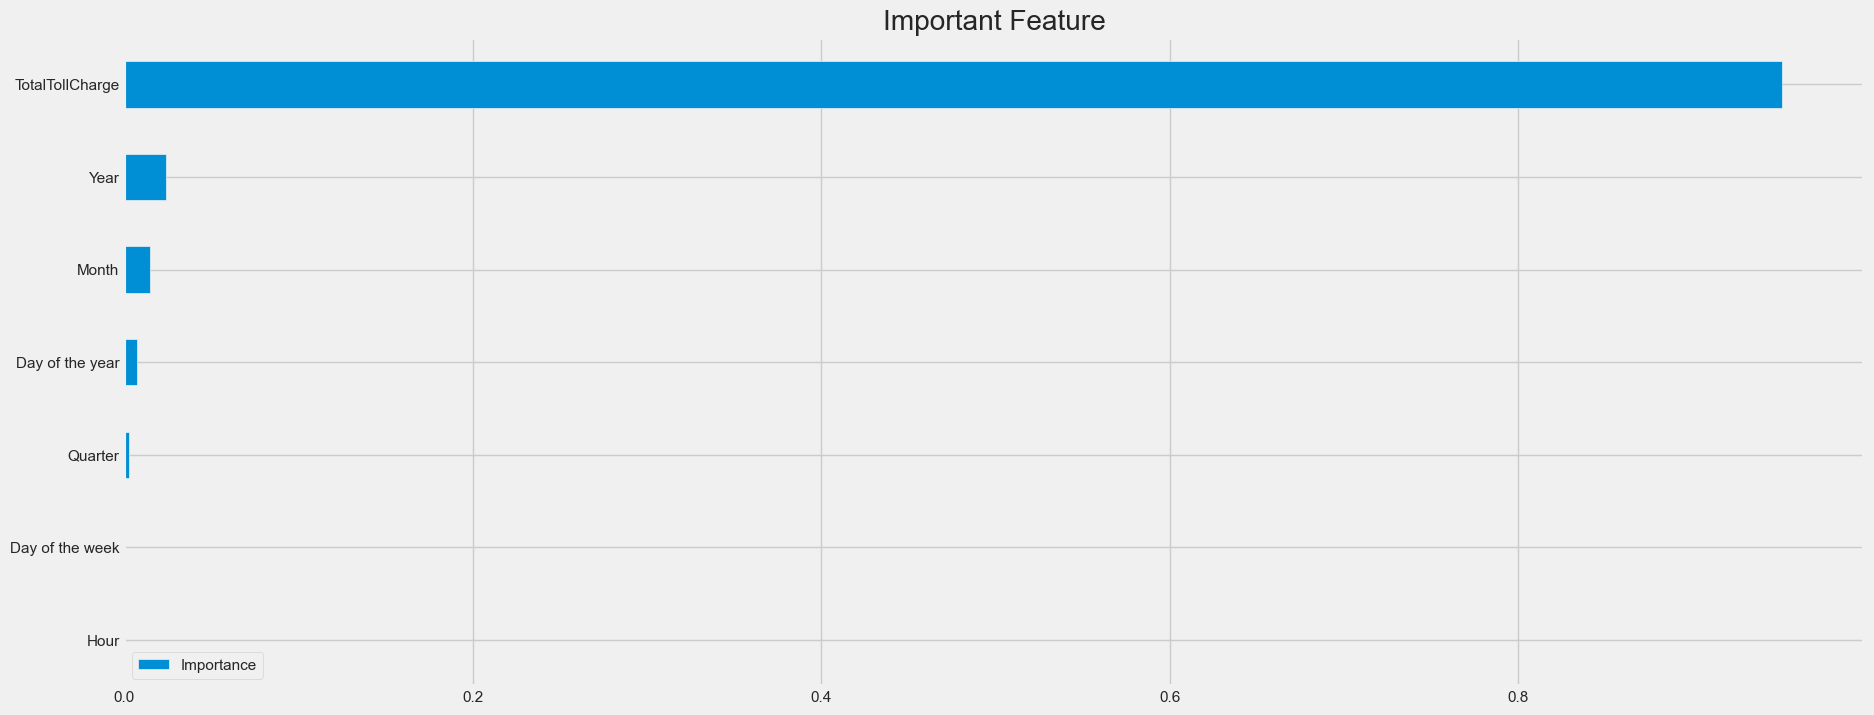

Wall time: 211 ms


In [83]:
%%time
fImportance = pd.DataFrame(data=regressor.feature_importances_,
                 index=regressor.feature_names_in_,
                 columns=['Importance'])
fImportance.sort_values('Importance').plot(kind='barh', title='Important Feature')
plt.show()

<font color='green'><center><h2><u>Cars: Predict test dataset</u></h2></center></font>

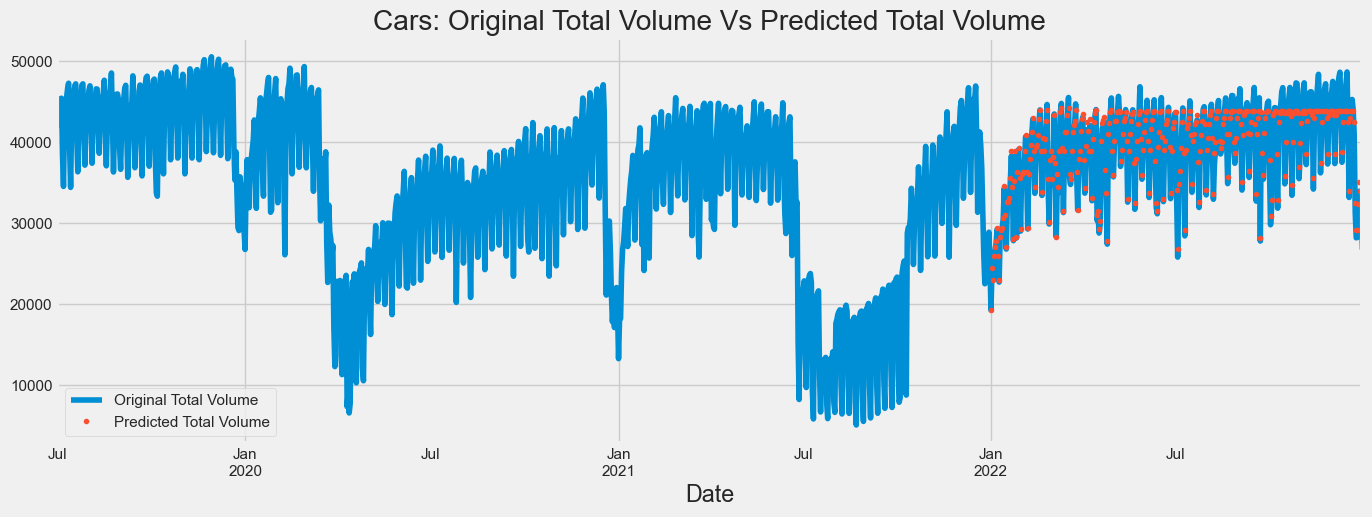

Wall time: 387 ms


In [84]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedTotalVolume'] = regressor.predict(X_test)
df_xgboost_charge_3_Car = df_xgboost_charge_3_Car.merge(testing_df['PredictedTotalVolume'], how='left', left_index = True, right_index = True)
ax = df_xgboost_charge_3_Car['TotalVolume'].plot(figsize=(15,5))
df_xgboost_charge_3_Car['PredictedTotalVolume'].plot(ax=ax, style='.')
plt.legend(['Original Total Volume', 'Predicted Total Volume'])
ax.set_title('Cars: Original Total Volume Vs Predicted Total Volume')
plt.show()

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [86]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedTotalVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 823.67
Wall time: 997 µs


<font color='green'><center><h2><u>Cars: Future Toll Revenue Prediction</u></h2></center></font>

<font color='green'><center><h2><u>Cars: Create required features</u></h2></center></font>

In [87]:
%%time
#Below is the feature creation created as a function
def xgb_feature_creation_2(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    df['Day of the month'] = df.index.day
    df['Week of the year'] = df.index.isocalendar().week
    return df

Wall time: 0 ns


<font color='green'><center><h2><u>Cars: Create required lag features</u></h2></center></font>

In [88]:
%%time
#Creating Lag features like for same day last year etc.
def xgb_include_lags(df):    
    target_dict_map = df['TotalVolume'].to_dict()
    df['lag 1 year'] = (df.index - pd.Timedelta('364 days')).map(target_dict_map)
    df['lag 2 year'] = (df.index - pd.Timedelta('728 days')).map(target_dict_map)
    df['lag 3 year'] = (df.index - pd.Timedelta('1092 days')).map(target_dict_map)
    return(df)

Wall time: 0 ns


In [89]:
%%time
#Train all of the data before doing future prediction
df_xgboost_charge_3_Car = xgb_feature_creation_2(df_xgboost_charge_3_Car)
df_xgboost_charge_3_Car = xgb_include_lags(df_xgboost_charge_3_Car)

XGB_FEATURES = ['TotalTollCharge', 'Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month', 'lag 1 year','lag 2 year','lag 3 year']
XGB_TARGET = ['TotalVolume']

X_all = df_xgboost_charge_3_Car[XGB_FEATURES]
y_all = df_xgboost_charge_3_Car[XGB_TARGET]

#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_all, y_all,
              eval_set=[(X_all, y_all)],
              verbose=100)

[15:54:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:36608.27119
[100]	validation_0-rmse:13538.49652
[200]	validation_0-rmse:5046.53540
[300]	validation_0-rmse:1920.07968
[400]	validation_0-rmse:783.51150
[500]	validation_0-rmse:396.77834
[600]	validation_0-rmse:274.81503
[700]	validation_0-rmse:236.42737
[800]	validation_0-rmse:221.16113
[900]	validation_0-rmse:211.94500
[1000]	validation_0-rmse:204.08553
[1100]	validation_0-rmse:196.69434
[1200]	validation_0-rmse:190.95761
[1300]	validation_0-rmse:186.00397
[1400]	validation_0-rmse:181.33170
[1500]	validation_0-rmse:176.73844
[1600]	validation_0-rmse:172.65736
[1700]	validation_0-rmse:168.90551
[1800]	validation_0-rmse:165.38252
[1900]	validation_0-rmse:161.43683
[2000]	validation_0-rmse:157.96012
[2100]	validation_0-rmse:154.73956
[2200

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [90]:
%%time
#Find recent / latest data and time of the given dataset
df_xgboost_charge_3_Car.index.max()

Wall time: 998 µs


Timestamp('2022-12-31 00:00:00')

In [91]:
%%time
#Create future dataframe
future = pd.date_range('2023-01-01', '2023-01-08')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df_xgboost_charge_3_Car['isFuture'] = False
Past_and_future_df = pd.concat([df_xgboost_charge_3_Car, future_df])
Past_and_future_df

Wall time: 2.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01      41872.0        321995.68   0.0              0.0      3.0   
2019-07-02      43557.0        334953.33   0.0              1.0      3.0   
2019-07-03      44445.0        341782.05   0.0              2.0      3.0   
2019-07-04      45371.0        348902.99   0.0              3.0      3.0   
2019-07-05      45431.0        349364.39   0.0              4.0      3.0   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN   NaN              NaN      NaN   
2023-01-05          NaN              NaN   NaN              NaN      NaN   
2023-01-06          NaN              NaN   NaN              NaN      NaN   
2023-01-07          NaN              NaN   NaN              NaN      NaN   
2023-01-08          NaN              NaN   NaN              NaN      NaN   

            Month    Year  Day of the year  PredictedTotalVolume  \
2019-07-01    7.0  2019.0            182.0                   NaN   
2019-07-02    7.0  2019.0            183.0                   NaN   
2019-07-03    7.0  2019.0            184.0                   NaN   
2019-07-04    7.0  2019.0            185.0                   NaN   
2019-07-05    7.0  2019.0            186.0                   NaN   
...           ...     ...              ...                   ...   
2023-01-04    NaN     NaN              NaN                   NaN   
2023-01-05    NaN     NaN              NaN                   NaN   
2023-01-06    NaN     NaN              NaN                   NaN   
2023-01-07    NaN     NaN              NaN                   NaN   
2023-01-08    NaN     NaN              NaN                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01               1.0                27         NaN         NaN   
2019-07-02               2.0                27         NaN         NaN   
2019-07-03               3.0                27         NaN         NaN   
2019-07-04               4.0                27         NaN         NaN   
2019-07-05               5.0                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04               NaN              <NA>         NaN         NaN   
2023-01-05               NaN              <NA>         NaN         NaN   
2023-01-06               NaN              <NA>         NaN         NaN   
2023-01-07               NaN              <NA>         NaN         NaN   
2023-01-08               NaN              <NA>         NaN         NaN   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04         NaN      True  
2023-01-05         NaN      True  
2023-01-06         NaN      True  
2023-01-07         NaN      True  
2023-01-08         NaN      True  

[1288 rows x 15 columns]

In [92]:
%%time
#Pass past+future dataset to add features and lags
Past_and_future_df = xgb_feature_creation_2(Past_and_future_df)
Past_and_future_df = xgb_include_lags(Past_and_future_df)
Past_and_future_df

Wall time: 41.7 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01      41872.0        321995.68     0                0        3   
2019-07-02      43557.0        334953.33     0                1        3   
2019-07-03      44445.0        341782.05     0                2        3   
2019-07-04      45371.0        348902.99     0                3        3   
2019-07-05      45431.0        349364.39     0                4        3   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   
2023-01-06          NaN              NaN     0                4        1   
2023-01-07          NaN              NaN     0                5        1   
2023-01-08          NaN              NaN     0                6        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2019-07-01      7  2019              182                   NaN   
2019-07-02      7  2019              183                   NaN   
2019-07-03      7  2019              184                   NaN   
2019-07-04      7  2019              185                   NaN   
2019-07-05      7  2019              186                   NaN   
...           ...   ...              ...                   ...   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   
2023-01-06      1  2023                6                   NaN   
2023-01-07      1  2023                7                   NaN   
2023-01-08      1  2023                8                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01                 1                27         NaN         NaN   
2019-07-02                 2                27         NaN         NaN   
2019-07-03                 3                27         NaN         NaN   
2019-07-04                 4                27         NaN         NaN   
2019-07-05                 5                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04                 4                 1     26639.0     27700.0   
2023-01-05                 5                 1     27452.0     29596.0   
2023-01-06                 6                 1     29199.0     31808.0   
2023-01-07                 7                 1     26182.0     29647.0   
2023-01-08                 8                 1     22713.0     27112.0   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04     39119.0      True  
2023-01-05     40262.0      True  
2023-01-06     42742.0      True  
2023-01-07     35848.0      True  
2023-01-08     31827.0      True  

[1288 rows x 15 columns]

In [93]:
%%time
#Split and dislay only future dataset
future_with_features = Past_and_future_df.query('isFuture').copy()
future_with_features.head()

Wall time: 2.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1                   NaN   
2023-01-02      1  2023                2                   NaN   
2023-01-03      1  2023                3                   NaN   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52     24085.0     18216.0   
2023-01-02                 2                 1     23109.0     24001.0   
2023-01-03                 3                 1     26080.0     26768.0   
2023-01-04                 4                 1     26639.0     27700.0   
2023-01-05                 5                 1     27452.0     29596.0   

            lag 3 year  isFuture  
2023-01-01     31909.0      True  
2023-01-02     36903.0      True  
2023-01-03     37881.0      True  
2023-01-04     39119.0      True  
2023-01-05     40262.0      True

In [94]:
%%time
#Predict the future
future_with_features['PredictedTotalVolume'] = regressor.predict(future_with_features[XGB_FEATURES])

Wall time: 4.99 ms


In [95]:
%%time
future_with_features.head()

Wall time: 0 ns


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1           5269.821777   
2023-01-02      1  2023                2           5337.640137   
2023-01-03      1  2023                3           5393.481934   
2023-01-04      1  2023                4           5416.759766   
2023-01-05      1  2023                5           5323.492188   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52     24085.0     18216.0   
2023-01-02                 2                 1     23109.0     24001.0   
2023-01-03                 3                 1     26080.0     26768.0   
2023-01-04                 4                 1     26639.0     27700.0   
2023-01-05                 5                 1     27452.0     29596.0   

            lag 3 year  isFuture  
2023-01-01     31909.0      True  
2023-01-02     36903.0      True  
2023-01-03     37881.0      True  
2023-01-04     39119.0      True  
2023-01-05     40262.0      True

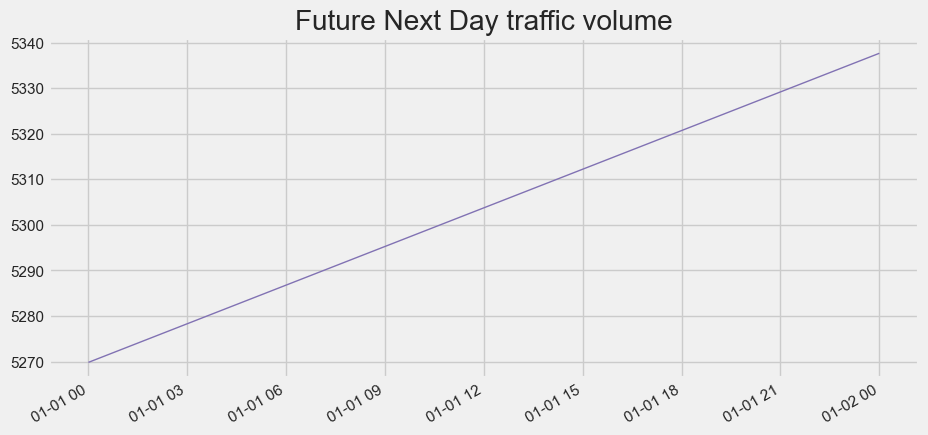

Wall time: 295 ms


In [96]:
%%time
#Plot the future: Next Day
future_with_features['PredictedTotalVolume'].iloc[0:2].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Day traffic volume')
plt.show()

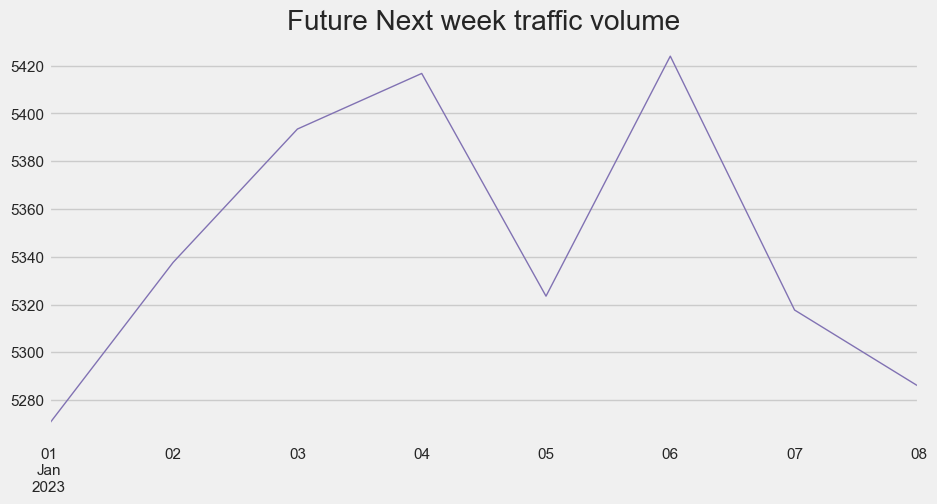

Wall time: 189 ms


In [97]:
%%time
#Plot the future: Next week
future_with_features['PredictedTotalVolume'].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next week traffic volume')
plt.show()

In [99]:
%%time
future_with_features['PredictedTotalVolume']

Wall time: 0 ns


2023-01-01    5269.821777
2023-01-02    5337.640137
2023-01-03    5393.481934
2023-01-04    5416.759766
2023-01-05    5323.492188
2023-01-06    5424.001465
2023-01-07    5317.692871
2023-01-08    5285.648438
Name: PredictedTotalVolume, dtype: float32

In [100]:
%%time
car_toll_charge = df_charge.copy()
car_toll_charge_1 = car_toll_charge[ (car_toll_charge["TollPointID"] == "AB") & (car_toll_charge["Month"] == 1) 
                & (car_toll_charge["Year"] == 2023) ]
print("Future toll revenue of car:")
future_with_features['PredictedTotalVolume'] * float( car_toll_charge_1["Cars Charge"].str.slice(1, 5) )

Future toll revenue of car:
Wall time: 1.99 ms


2023-01-01    47112.203125
2023-01-02    47718.500000
2023-01-03    48217.726562
2023-01-04    48425.828125
2023-01-05    47592.019531
2023-01-06    48490.570312
2023-01-07    47540.171875
2023-01-08    47253.695312
Name: PredictedTotalVolume, dtype: float32

<font color='green'><center><h2><u>Trucks: Training & Testing Dataset</u></h2></center></font>

In [101]:
%%time
#Split train and test dataset for as a time series
training_df = df_xgboost_charge_3_Truck.loc[df_xgboost_charge_3_Truck.index < '01-01-2022']
testing_df = df_xgboost_charge_3_Truck.loc[df_xgboost_charge_3_Truck.index >= '01-01-2022']

Wall time: 1.99 ms


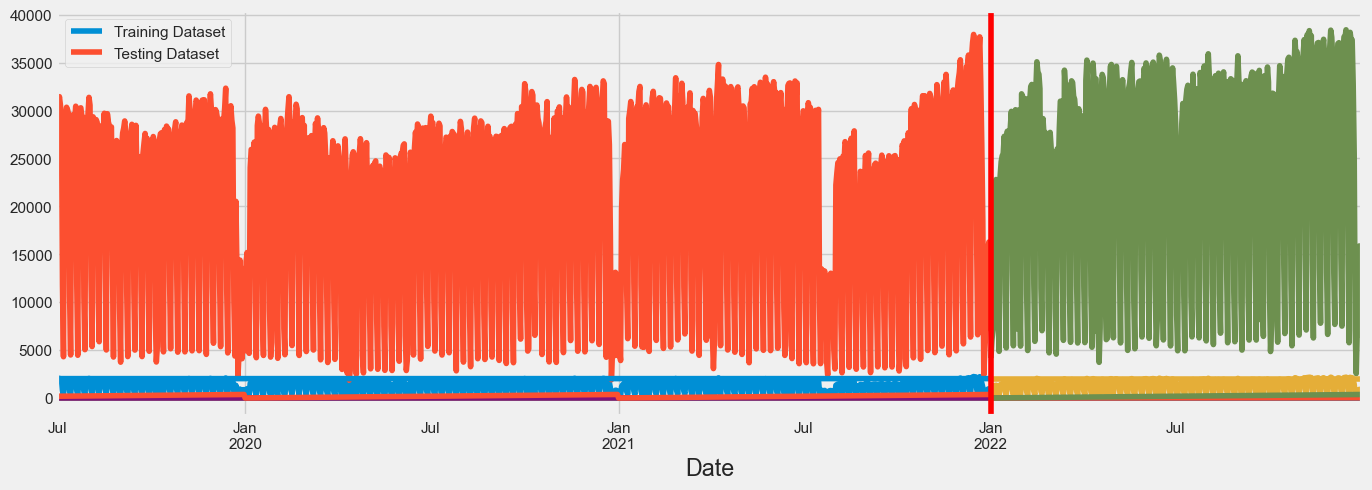

Wall time: 538 ms


In [102]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2022', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Trucks: Add features to dataset</u></h2></center></font>

In [103]:
%%time
#Adding features to train and test dataset
training_df = xgb_feature_creation(training_df)
testing_df = xgb_feature_creation(testing_df)
XGB_COLUMN_FEATURES = ['TotalTollCharge','Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
XGB_COLUMN_TARGET = ['TotalVolume']

Wall time: 5.02 ms


<font color='green'><center><h2><u>Trucks: Define feature & target columns for train & test dataset</u></h2></center></font>

In [104]:
%%time
X_train = training_df[XGB_COLUMN_FEATURES]
y_train = training_df[XGB_COLUMN_TARGET]

X_test = testing_df[XGB_COLUMN_FEATURES]
y_test = testing_df[XGB_COLUMN_TARGET]

Wall time: 3.03 ms


<font color='green'><center><h2><u>Trucks: Model Creation</u></h2></center></font>

In [105]:
%%time
#Create the model
#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100
       )

[15:55:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1456.03533	validation_1-rmse:1545.70284
[100]	validation_0-rmse:538.86440	validation_1-rmse:564.78399
[200]	validation_0-rmse:202.10443	validation_1-rmse:184.78286
[300]	validation_0-rmse:78.45431	validation_1-rmse:52.23713
[400]	validation_0-rmse:34.22067	validation_1-rmse:39.34589
[410]	validation_0-rmse:31.80372	validation_1-rmse:40.69256
Wall time: 289 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

<font color='green'><center><h2><u>Trucks: Visualize Feature Importance</u></h2></center></font>

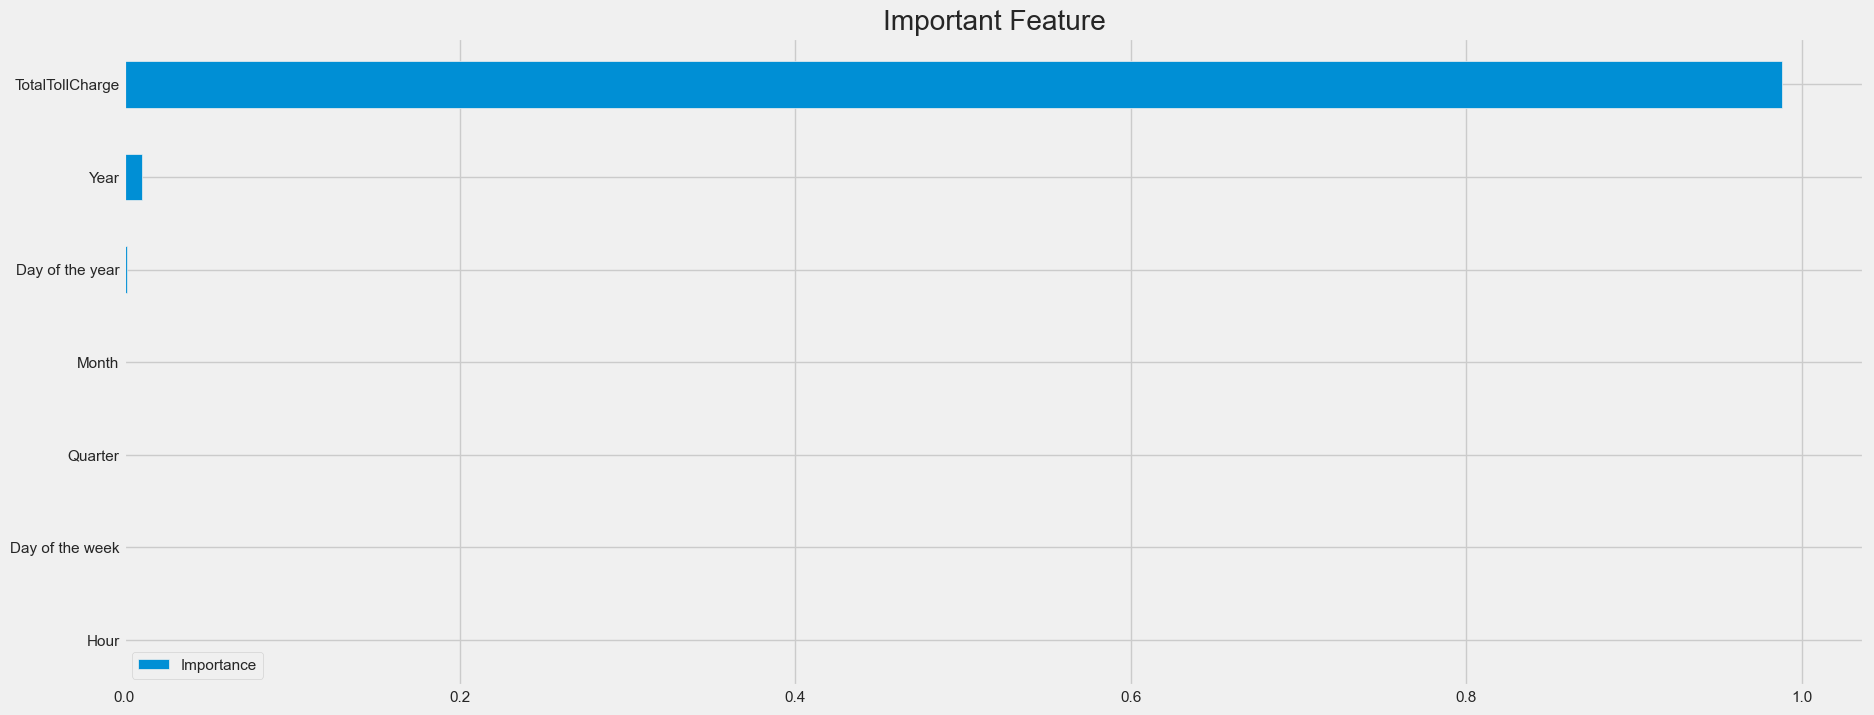

Wall time: 208 ms


In [106]:
%%time
fImportance = pd.DataFrame(data=regressor.feature_importances_,
                 index=regressor.feature_names_in_,
                 columns=['Importance'])
fImportance.sort_values('Importance').plot(kind='barh', title='Important Feature')
plt.show()

<font color='green'><center><h2><u>Trucks: Predict test dataset</u></h2></center></font>

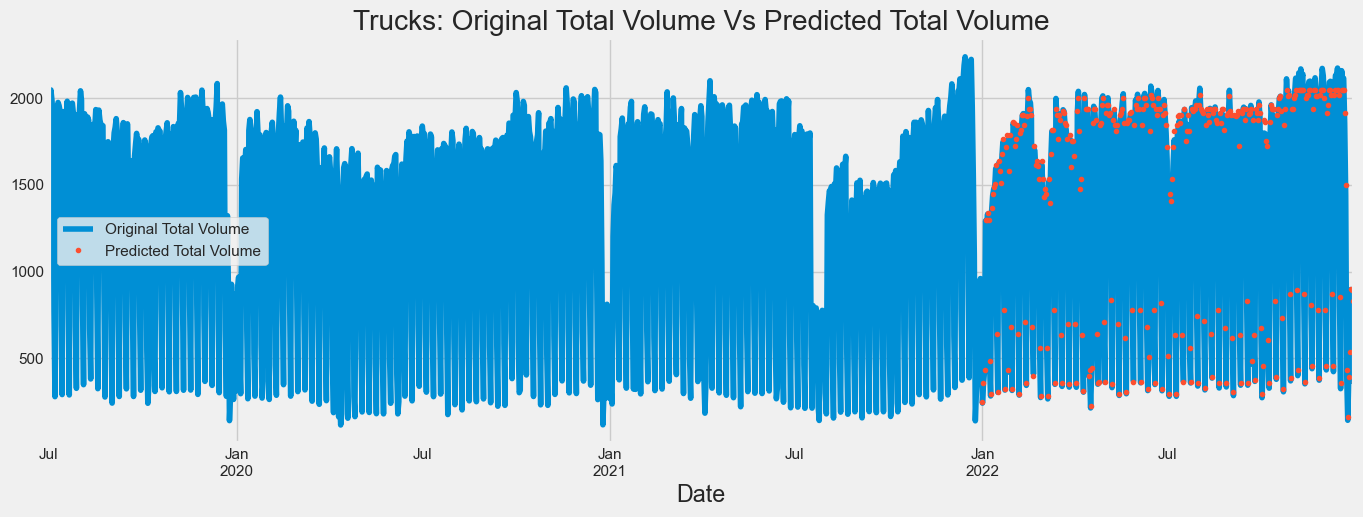

Wall time: 411 ms


In [107]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedTotalVolume'] = regressor.predict(X_test)
df_xgboost_charge_3_Truck = df_xgboost_charge_3_Truck.merge(testing_df['PredictedTotalVolume'], how='left', left_index = True, right_index = True)
ax = df_xgboost_charge_3_Truck['TotalVolume'].plot(figsize=(15,5))
df_xgboost_charge_3_Truck['PredictedTotalVolume'].plot(ax=ax, style='.')
plt.legend(['Original Total Volume', 'Predicted Total Volume'])
ax.set_title('Trucks: Original Total Volume Vs Predicted Total Volume')
plt.show()

<font color='green'><center><h2><u>Trucks: Evaluation Metrics</u></h2></center></font>

In [110]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedTotalVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 28.31
Wall time: 992 µs


<font color='green'><center><h2><u>Trucks: Future Toll Revenue Prediction</u></h2></center></font>

In [111]:
%%time
#Train all of the data before doing future prediction
df_xgboost_charge_3_Truck = xgb_feature_creation_2(df_xgboost_charge_3_Truck)
df_xgboost_charge_3_Truck = xgb_include_lags(df_xgboost_charge_3_Truck)

XGB_FEATURES = ['TotalTollCharge', 'Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month', 'lag 1 year','lag 2 year','lag 3 year']
XGB_TARGET = ['TotalVolume']

X_all = df_xgboost_charge_3_Truck[XGB_FEATURES]
y_all = df_xgboost_charge_3_Truck[XGB_TARGET]

#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_all, y_all,
              eval_set=[(X_all, y_all)],
              verbose=100)

[15:56:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1482.04802
[100]	validation_0-rmse:547.95508
[200]	validation_0-rmse:205.58675
[300]	validation_0-rmse:80.30436
[400]	validation_0-rmse:35.37274
[500]	validation_0-rmse:19.25651
[600]	validation_0-rmse:13.40603
[700]	validation_0-rmse:11.08035
[800]	validation_0-rmse:9.87266
[900]	validation_0-rmse:9.08983
[1000]	validation_0-rmse:8.53170
[1100]	validation_0-rmse:8.15414
[1200]	validation_0-rmse:7.83584
[1300]	validation_0-rmse:7.57935
[1400]	validation_0-rmse:7.32002
[1500]	validation_0-rmse:7.07839
[1600]	validation_0-rmse:6.88302
[1700]	validation_0-rmse:6.70614
[1800]	validation_0-rmse:6.51982
[1900]	validation_0-rmse:6.34961
[2000]	validation_0-rmse:6.16866
[2100]	validation_0-rmse:5.99994
[2200]	validation_0-rmse:5.82734
[2300]	val

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [112]:
%%time
#Create future dataframe
future = pd.date_range('2023-01-01', '2023-01-08')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df_xgboost_charge_3_Car['isFuture'] = False
Past_and_future_df = pd.concat([df_xgboost_charge_3_Car, future_df])
Past_and_future_df

Wall time: 2.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01      41872.0        321995.68   0.0              0.0      3.0   
2019-07-02      43557.0        334953.33   0.0              1.0      3.0   
2019-07-03      44445.0        341782.05   0.0              2.0      3.0   
2019-07-04      45371.0        348902.99   0.0              3.0      3.0   
2019-07-05      45431.0        349364.39   0.0              4.0      3.0   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN   NaN              NaN      NaN   
2023-01-05          NaN              NaN   NaN              NaN      NaN   
2023-01-06          NaN              NaN   NaN              NaN      NaN   
2023-01-07          NaN              NaN   NaN              NaN      NaN   
2023-01-08          NaN              NaN   NaN              NaN      NaN   

            Month    Year  Day of the year  PredictedTotalVolume  \
2019-07-01    7.0  2019.0            182.0                   NaN   
2019-07-02    7.0  2019.0            183.0                   NaN   
2019-07-03    7.0  2019.0            184.0                   NaN   
2019-07-04    7.0  2019.0            185.0                   NaN   
2019-07-05    7.0  2019.0            186.0                   NaN   
...           ...     ...              ...                   ...   
2023-01-04    NaN     NaN              NaN                   NaN   
2023-01-05    NaN     NaN              NaN                   NaN   
2023-01-06    NaN     NaN              NaN                   NaN   
2023-01-07    NaN     NaN              NaN                   NaN   
2023-01-08    NaN     NaN              NaN                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01               1.0                27         NaN         NaN   
2019-07-02               2.0                27         NaN         NaN   
2019-07-03               3.0                27         NaN         NaN   
2019-07-04               4.0                27         NaN         NaN   
2019-07-05               5.0                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04               NaN              <NA>         NaN         NaN   
2023-01-05               NaN              <NA>         NaN         NaN   
2023-01-06               NaN              <NA>         NaN         NaN   
2023-01-07               NaN              <NA>         NaN         NaN   
2023-01-08               NaN              <NA>         NaN         NaN   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04         NaN      True  
2023-01-05         NaN      True  
2023-01-06         NaN      True  
2023-01-07         NaN      True  
2023-01-08         NaN      True  

[1288 rows x 15 columns]

In [113]:
%%time
#Pass past+future dataset to add features and lags
Past_and_future_df = xgb_feature_creation_2(Past_and_future_df)
Past_and_future_df = xgb_include_lags(Past_and_future_df)
Past_and_future_df

Wall time: 27.9 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01      41872.0        321995.68     0                0        3   
2019-07-02      43557.0        334953.33     0                1        3   
2019-07-03      44445.0        341782.05     0                2        3   
2019-07-04      45371.0        348902.99     0                3        3   
2019-07-05      45431.0        349364.39     0                4        3   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   
2023-01-06          NaN              NaN     0                4        1   
2023-01-07          NaN              NaN     0                5        1   
2023-01-08          NaN              NaN     0                6        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2019-07-01      7  2019              182                   NaN   
2019-07-02      7  2019              183                   NaN   
2019-07-03      7  2019              184                   NaN   
2019-07-04      7  2019              185                   NaN   
2019-07-05      7  2019              186                   NaN   
...           ...   ...              ...                   ...   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   
2023-01-06      1  2023                6                   NaN   
2023-01-07      1  2023                7                   NaN   
2023-01-08      1  2023                8                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01                 1                27         NaN         NaN   
2019-07-02                 2                27         NaN         NaN   
2019-07-03                 3                27         NaN         NaN   
2019-07-04                 4                27         NaN         NaN   
2019-07-05                 5                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04                 4                 1     26639.0     27700.0   
2023-01-05                 5                 1     27452.0     29596.0   
2023-01-06                 6                 1     29199.0     31808.0   
2023-01-07                 7                 1     26182.0     29647.0   
2023-01-08                 8                 1     22713.0     27112.0   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04     39119.0      True  
2023-01-05     40262.0      True  
2023-01-06     42742.0      True  
2023-01-07     35848.0      True  
2023-01-08     31827.0      True  

[1288 rows x 15 columns]

In [114]:
%%time
#Split and dislay only future dataset
future_with_features = Past_and_future_df.query('isFuture').copy()
future_with_features.head()

Wall time: 3.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1                   NaN   
2023-01-02      1  2023                2                   NaN   
2023-01-03      1  2023                3                   NaN   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52     24085.0     18216.0   
2023-01-02                 2                 1     23109.0     24001.0   
2023-01-03                 3                 1     26080.0     26768.0   
2023-01-04                 4                 1     26639.0     27700.0   
2023-01-05                 5                 1     27452.0     29596.0   

            lag 3 year  isFuture  
2023-01-01     31909.0      True  
2023-01-02     36903.0      True  
2023-01-03     37881.0      True  
2023-01-04     39119.0      True  
2023-01-05     40262.0      True

In [115]:
%%time
#Predict the future
future_with_features['PredictedTotalVolume'] = regressor.predict(future_with_features[XGB_FEATURES])

Wall time: 5.98 ms


In [116]:
%%time
future_with_features.head()

Wall time: 0 ns


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1             98.279434   
2023-01-02      1  2023                2            108.850563   
2023-01-03      1  2023                3            107.063667   
2023-01-04      1  2023                4            102.279755   
2023-01-05      1  2023                5            102.239983   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52     24085.0     18216.0   
2023-01-02                 2                 1     23109.0     24001.0   
2023-01-03                 3                 1     26080.0     26768.0   
2023-01-04                 4                 1     26639.0     27700.0   
2023-01-05                 5                 1     27452.0     29596.0   

            lag 3 year  isFuture  
2023-01-01     31909.0      True  
2023-01-02     36903.0      True  
2023-01-03     37881.0      True  
2023-01-04     39119.0      True  
2023-01-05     40262.0      True

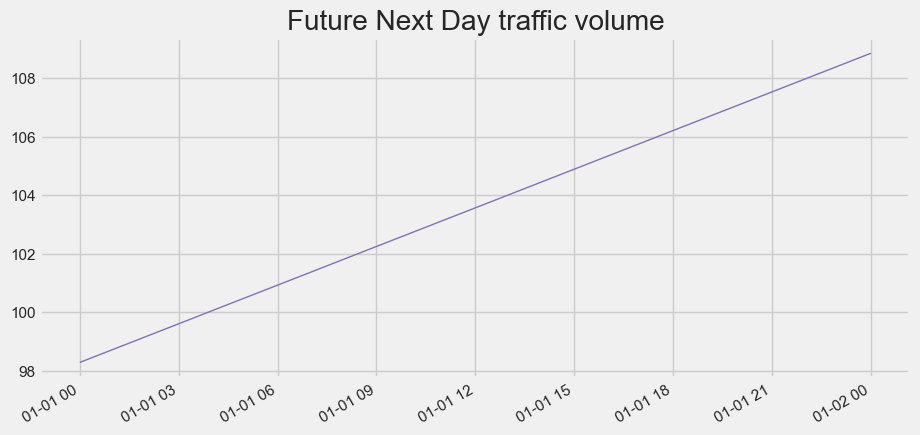

Wall time: 254 ms


In [117]:
%%time
#Plot the future: Next Day
future_with_features['PredictedTotalVolume'].iloc[0:2].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Day traffic volume')
plt.show()

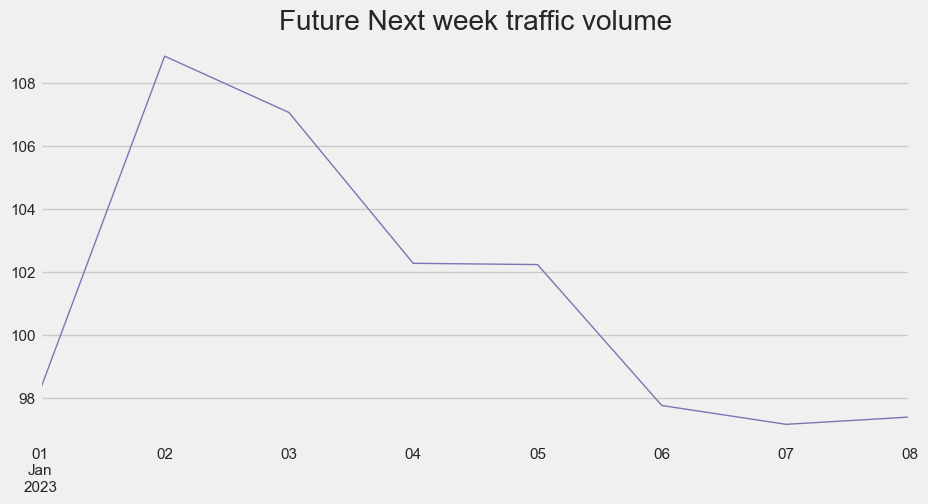

Wall time: 171 ms


In [118]:
%%time
#Plot the future: Next week
future_with_features['PredictedTotalVolume'].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next week traffic volume')
plt.show()

In [119]:
%%time
future_with_features['PredictedTotalVolume']

Wall time: 0 ns


2023-01-01     98.279434
2023-01-02    108.850563
2023-01-03    107.063667
2023-01-04    102.279755
2023-01-05    102.239983
2023-01-06     97.769295
2023-01-07     97.172600
2023-01-08     97.405037
Name: PredictedTotalVolume, dtype: float32

In [120]:
%%time
truck_toll_charge = df_charge.copy()
truck_toll_charge_1 = truck_toll_charge[ (truck_toll_charge["TollPointID"] == "AB") & (truck_toll_charge["Month"] == 1) 
                & (truck_toll_charge["Year"] == 2023) ]
print("Future toll revenue of truck:")
future_with_features['PredictedTotalVolume'] * float( car_toll_charge_1["Trucks Charge"].str.slice(1, 5) )

Future toll revenue of truck:
Wall time: 1.99 ms


2023-01-01    1749.373901
2023-01-02    1937.539917
2023-01-03    1905.733154
2023-01-04    1820.579590
2023-01-05    1819.871582
2023-01-06    1740.293335
2023-01-07    1729.672241
2023-01-08    1733.809570
Name: PredictedTotalVolume, dtype: float32

<font color='blue'><center><h2>Model 4: Linear Regression</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [171]:
%%time
#Importing Libraries Required
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
colour_palette = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import TimeSeriesSplit

Wall time: 25 ms


<font color='green'><center><h2><u>Cars: Read Data & Data Pre-Processing</u></h2></center></font>

In [172]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as SJY
df_lreg_charge = df_inp_data_charge4.copy()
df_lreg_charge['Date'] = pd.to_datetime(df_lreg_charge['Date'])
df_lreg_charge_1_Car = df_lreg_charge[ (df_lreg_charge['TollPointID_x'] == "AB") & 
                                       (df_lreg_charge['VehicleClass'] == "Car") ]

Wall time: 200 ms


In [173]:
%%time
#Group by TotalVolume & TotalCharges
df_lreg_charge_2_Car = df_lreg_charge_1_Car.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_lreg_charge_2_Car

Wall time: 11 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume  TotalTollCharge
Date                                    
2019-07-01        41872        321995.68
2019-07-02        43557        334953.33
2019-07-03        44445        341782.05
2019-07-04        45371        348902.99
2019-07-05        45431        349364.39
...                 ...              ...
2022-12-27        31043        274420.12
2022-12-28        33939        300020.76
2022-12-29        33067        292312.28
2022-12-30        33682        297748.88
2022-12-31        26739        236372.76

[1280 rows x 2 columns]

<font color='green'><center><h2><u>Cars: Input Data Visualization</u></h2></center></font>

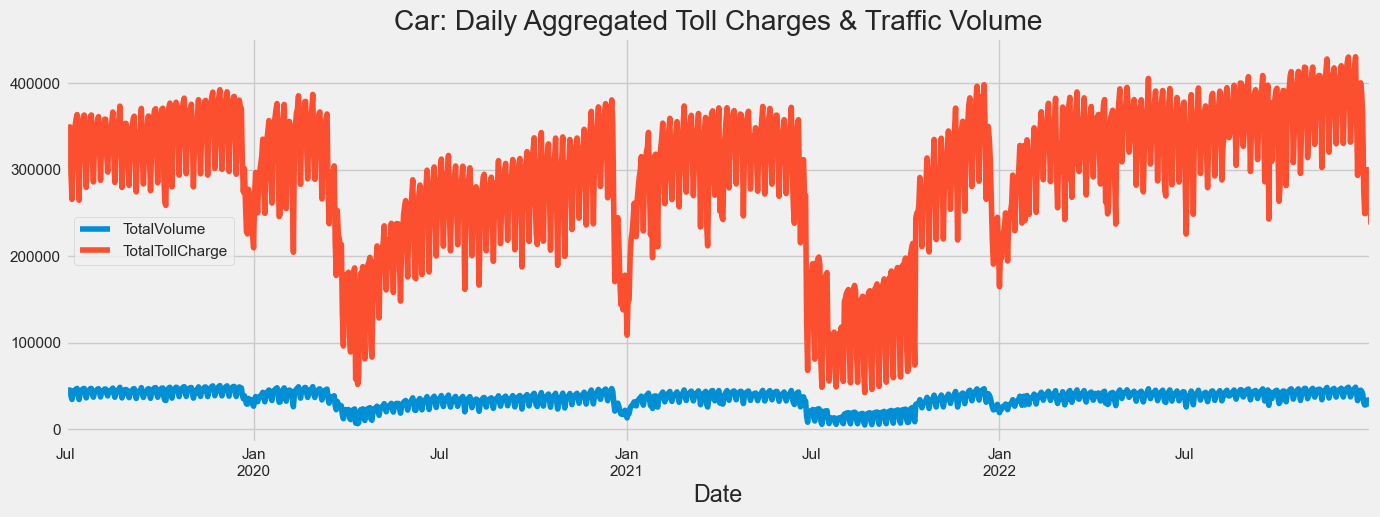

Wall time: 422 ms


In [174]:
%%time
#Plot daily aggregated toll charges and traffic volume line graph for the given dataset
df_lreg_charge_2_Car.plot(figsize=(15,5), title='Car: Daily Aggregated Toll Charges & Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Cars: Create required features</u></h2></center></font>

In [175]:
%%time
#Below is the feature creation created as a function
def lreg_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [176]:
%%time
#Diplay features
df_lreg_charge_3_Car = lreg_feature_creation(df_lreg_charge_2_Car)
df_lreg_charge_3_Car

Wall time: 4.02 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
Date                                                                       
2019-07-01        41872        321995.68     0                0        3   
2019-07-02        43557        334953.33     0                1        3   
2019-07-03        44445        341782.05     0                2        3   
2019-07-04        45371        348902.99     0                3        3   
2019-07-05        45431        349364.39     0                4        3   
...                 ...              ...   ...              ...      ...   
2022-12-27        31043        274420.12     0                1        4   
2022-12-28        33939        300020.76     0                2        4   
2022-12-29        33067        292312.28     0                3        4   
2022-12-30        33682        297748.88     0                4        4   
2022-12-31        26739        236372.76     0                5        4   

            Month  Year  Day of the year  
Date                                      
2019-07-01      7  2019              182  
2019-07-02      7  2019              183  
2019-07-03      7  2019              184  
2019-07-04      7  2019              185  
2019-07-05      7  2019              186  
...           ...   ...              ...  
2022-12-27     12  2022              361  
2022-12-28     12  2022              362  
2022-12-29     12  2022              363  
2022-12-30     12  2022              364  
2022-12-31     12  2022              365  

[1280 rows x 8 columns]

<font color='green'><center><h2><u>Cars: Training & Testing Dataset</u></h2></center></font>

In [177]:
%%time
#Split train and test dataset for as a time series
training_df = df_lreg_charge_3_Car.loc[df_lreg_charge_3_Car.index < '01-01-2022']
testing_df = df_lreg_charge_3_Car.loc[df_lreg_charge_3_Car.index >= '01-01-2022']

Wall time: 2 ms


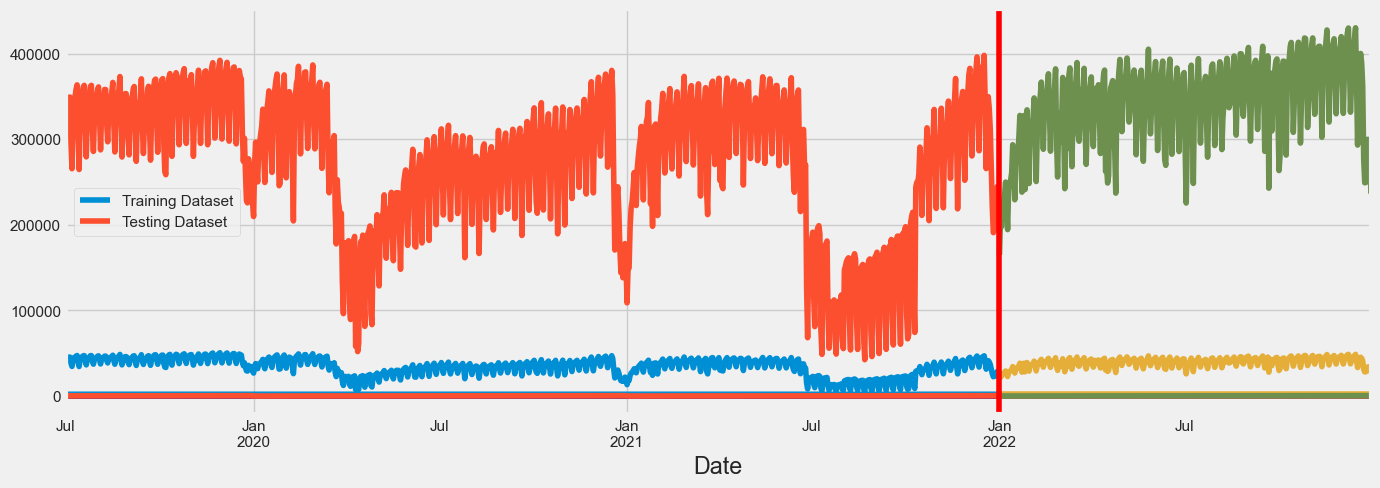

Wall time: 658 ms


In [178]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2022', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Cars: Add features to dataset</u></h2></center></font>

In [179]:
%%time
#Adding features to train and test dataset
training_df = lreg_feature_creation(training_df)
testing_df = lreg_feature_creation(testing_df)
LREG_COLUMN_FEATURES = ['TotalTollCharge','Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
LREG_COLUMN_TARGET = ['TotalVolume']

Wall time: 2.99 ms


<font color='green'><center><h2><u>Cars: Define feature & target columns for train & test dataset</u></h2></center></font>

In [180]:
%%time
X_train = training_df[LREG_COLUMN_FEATURES]
y_train = training_df[LREG_COLUMN_TARGET]

X_test = testing_df[LREG_COLUMN_FEATURES]
y_test = testing_df[LREG_COLUMN_TARGET]

Wall time: 2.99 ms


<font color='green'><center><h2><u>Cars: Model Creation</u></h2></center></font>

In [181]:
%%time
#Create the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

Wall time: 4.97 ms


LinearRegression()

<font color='green'><center><h2><u>Cars: Predict test dataset</u></h2></center></font>

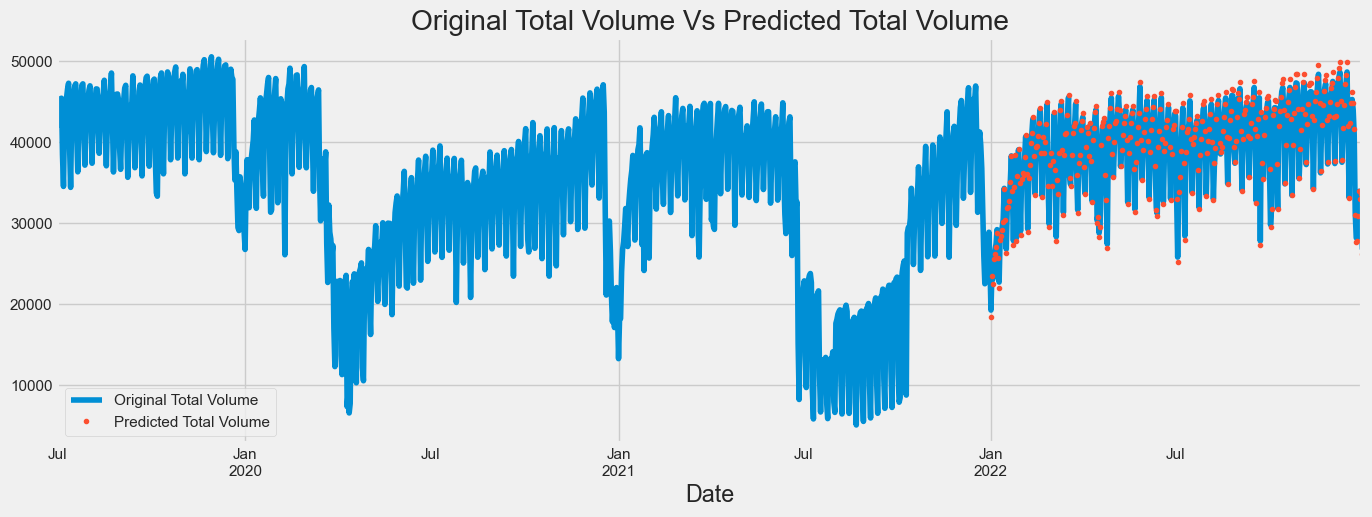

Wall time: 418 ms


In [182]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedTotalVolume'] = regressor.predict(X_test)
df_lreg_charge_3_Car = df_lreg_charge_3_Car.merge(testing_df['PredictedTotalVolume'], how='left', left_index = True, right_index = True)
ax = df_lreg_charge_3_Car['TotalVolume'].plot(figsize=(15,5))
df_lreg_charge_3_Car['PredictedTotalVolume'].plot(ax=ax, style='.')
plt.legend(['Original Total Volume', 'Predicted Total Volume'])
ax.set_title('Original Total Volume Vs Predicted Total Volume')
plt.show()

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [183]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedTotalVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 420.65
Wall time: 997 µs


<font color='purple'><center><h1>End: Answering "Predict the future next day+ revenue from cars and trucks based on daily traffic volume</h1></center></font>